In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools")
import plotTools as ptools

In [2]:
f_sig = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/outputs/sig/signal_2018_aEM_SR_studies.coffea"
f_qcd = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/outputs/bkg/bkg_2018_QCD_TuneCP5_PSWeights_SR_studies.coffea"
sig = util.load(f_sig)[0]
qcd = util.load(f_qcd)[0]

In [3]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in sig.keys() if k not in cutflows]
sig_samples = list(sig['cutflow'].keys())
qcd_samples = list(qcd['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
cuts = list(sig['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
deltas = sorted(list(set(si.delta)))
ctaus = sorted(list(set(si.ctau)))

In [4]:
cut = "cut11" # last cut of base set

In [52]:
print("\n".join(histos))

sel_e1_pt
sel_e1_trkIso
sel_e1_trkRelIso
sel_e1_PFRelIso3
sel_e1_PFRelIso4
sel_e1_PFRelIso8
sel_e1_PFIso3
sel_e1_PFIso4
sel_e1_PFIso8
sel_e1_trkChi2
sel_e1_trkProb
sel_e1_dxy
sel_e1_dxySignif
sel_e1_angRes
sel_e2_pt
sel_e2_trkIso
sel_e2_trkRelIso
sel_e2_PFRelIso3
sel_e2_PFRelIso4
sel_e2_PFRelIso8
sel_e2_PFIso3
sel_e2_PFIso4
sel_e2_PFIso8
sel_e2_trkChi2
sel_e2_trkProb
sel_e2_dxy
sel_e2_dxySignif
sel_e2_angRes
sel_e1_pt_vs_trkIso
sel_e1_pt_vs_trkRelIso
sel_e1_pt_vs_chi2
sel_e1_chi2_vs_dxy
sel_e1_numHits_vs_trkChi2
sel_e1_numHits_vs_trkProb
sel_e2_pt_vs_trkIso
sel_e2_pt_vs_trkRelIso
sel_e2_pt_vs_chi2
sel_e2_chi2_vs_dxy
sel_e2_numHits_vs_trkChi2
sel_e2_numHits_vs_trkProb
sel_vtx_type
sel_vtx_sign
sel_vtx_dR
sel_vtx_dR_over_pT
sel_vtx_dR_over_m
sel_vtx_dR_over_pTm
sel_vtx_dR_over_mpT
sel_vtx_chi2
sel_vtx_prob
sel_vtx_vxy
sel_vtx_vxy_zoom
sel_vtx_vxy_zoomzoom
sel_vtx_vxySignif
sel_vtx_mass
sel_vtx_minDxy
sel_vtx_pt
sel_vtx_eta
sel_vtx_phi
sel_vtx_PFRelIso3
sel_vtx_PFRelIso3M
sel_vtx_PFRelIso

In [42]:
def plot(hname,xlim,rebin=1j,logy=False,scaley=5,xlabel=None):
    hb = qcd[hname][sum,cut,::rebin]
    varAx = hb.axes[-1]
    for delta in deltas:
        plt.figure(figsize=(16,4))
        m1s = sorted(list(set(si[si.delta==delta].m1)))
        for i,ct in enumerate(ctaus):
            plt.subplot(1,4,i+1)
            plt.title(r"$c\tau = {0}$ mm".format(ct))
            hb.plot1d(label="QCD",yerr=False,density=False,histtype='fill',color='lightgrey')
            for m1 in m1s:
                point = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                hs = sig[hname][point,cut,::rebin]
                hs.plot1d(label=r"$M_1 = {0}$".format(m1),yerr=False,density=False)
            
            if logy:
                plt.yscale('log')
            plt.xlim(xlim)
            ylo,yhi = plt.gca().get_ylim()
            plt.ylim([ylo,scaley*yhi])
            if xlabel:
                plt.xlabel(xlabel)
            
            ncol = min((len(m1s)+1) // 2 + (len(m1s)+1)%2,3)
            if i==0:
                plt.gca().legend(loc='upper center',bbox_to_anchor=(0.5,1),fontsize=7,ncol=ncol)
        
        plt.suptitle(r"$\Delta = {0:.1f}$".format(delta))
        plt.savefig(f"plots/histos/{hname}_delta{delta:.1f}.pdf")
        plt.tight_layout()

# Isolation

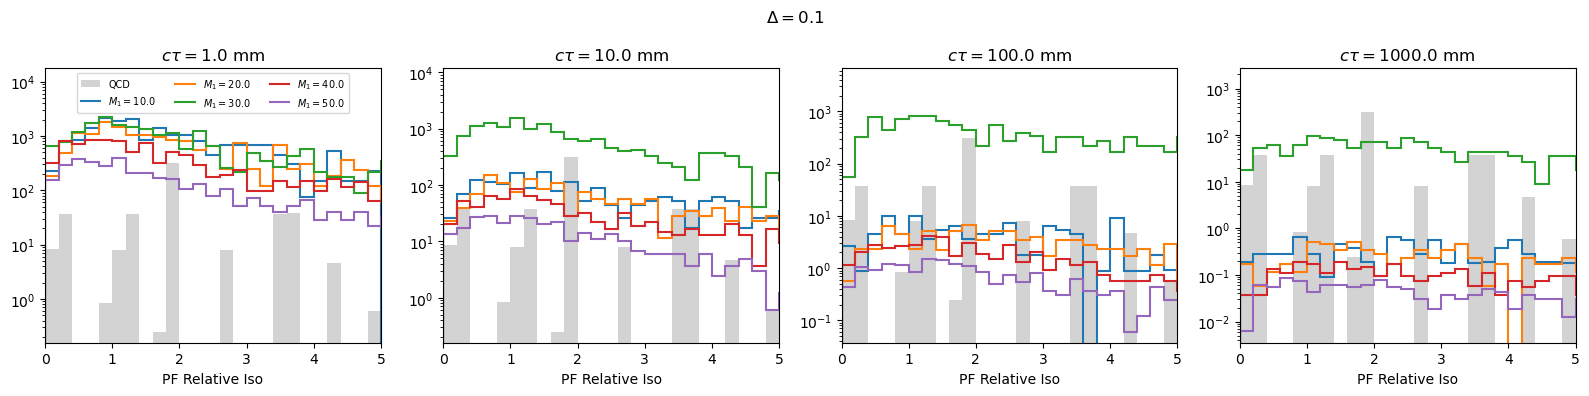

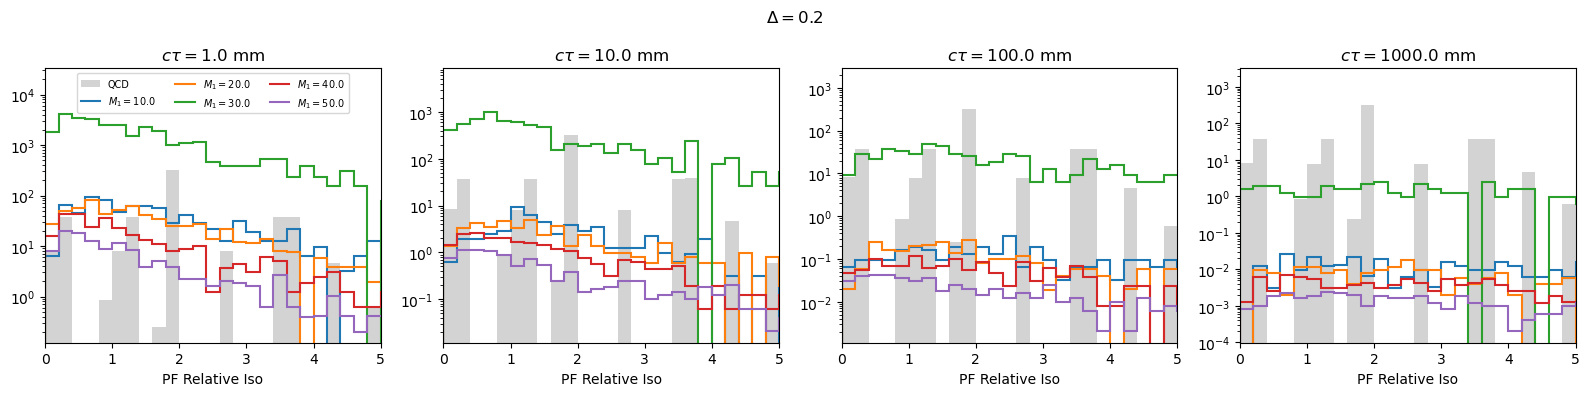

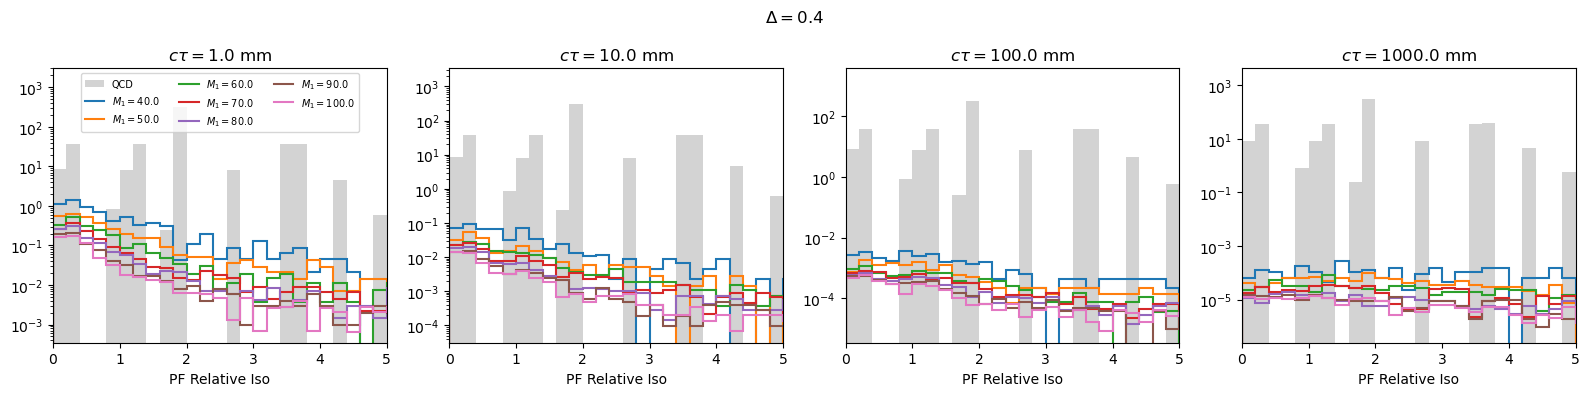

In [7]:
# electron 1 PF isolation dR < 0.3
plot("sel_e1_PFRelIso3",[0,5],logy=True,rebin=2j)

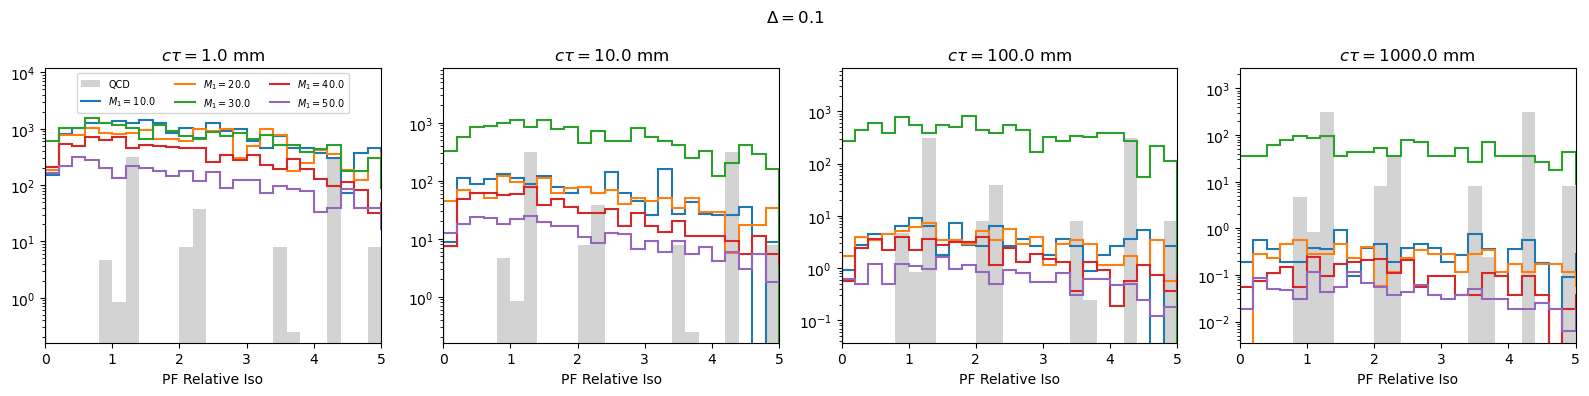

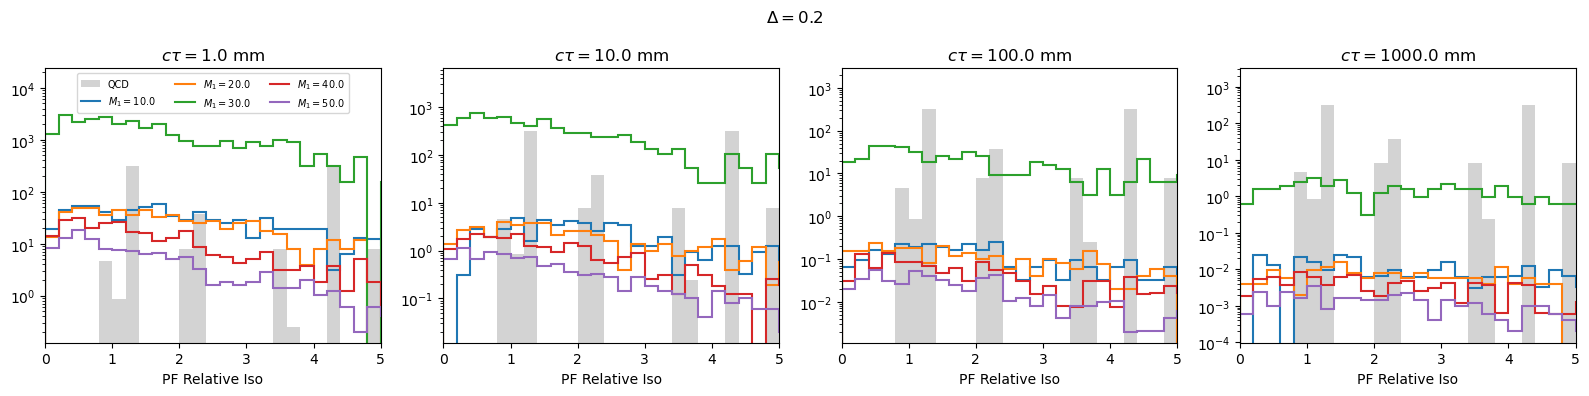

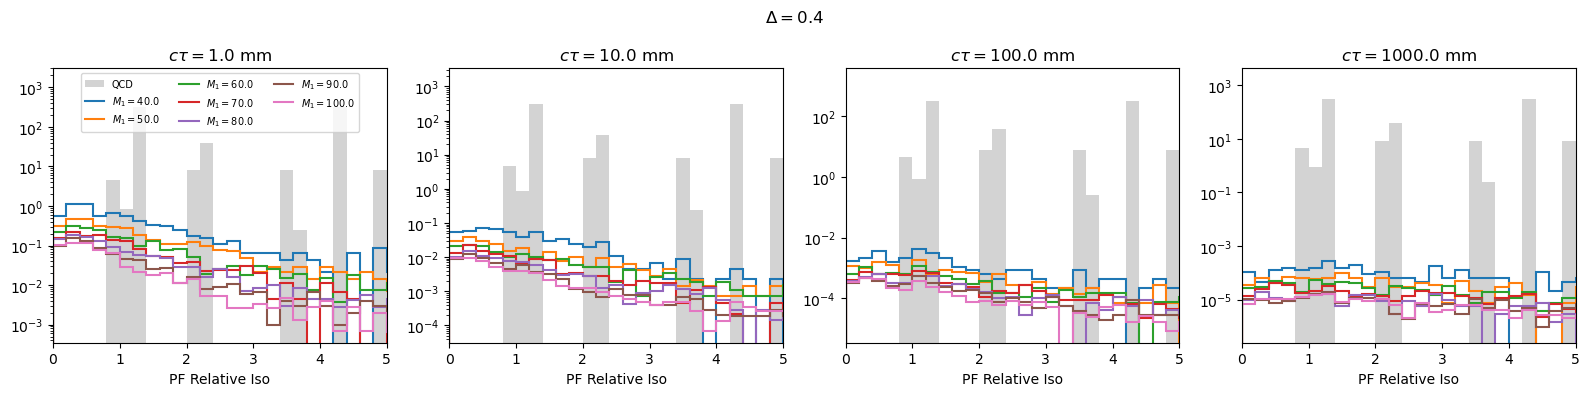

In [8]:
# electron 2 relative PF isolation dR < 0.3
plot("sel_e2_PFRelIso3",[0,5],logy=True,rebin=2j)

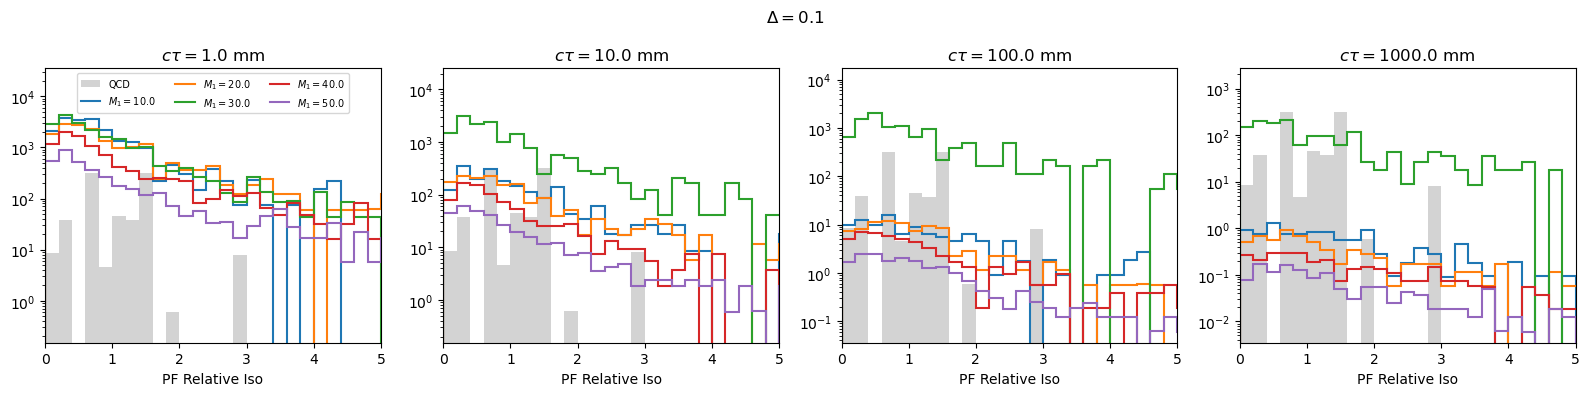

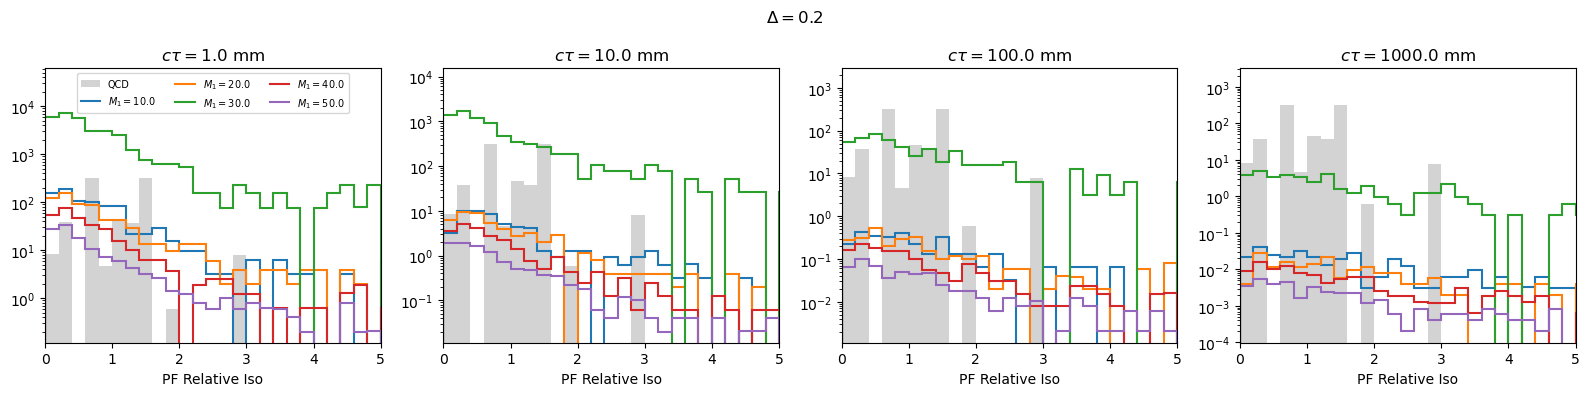

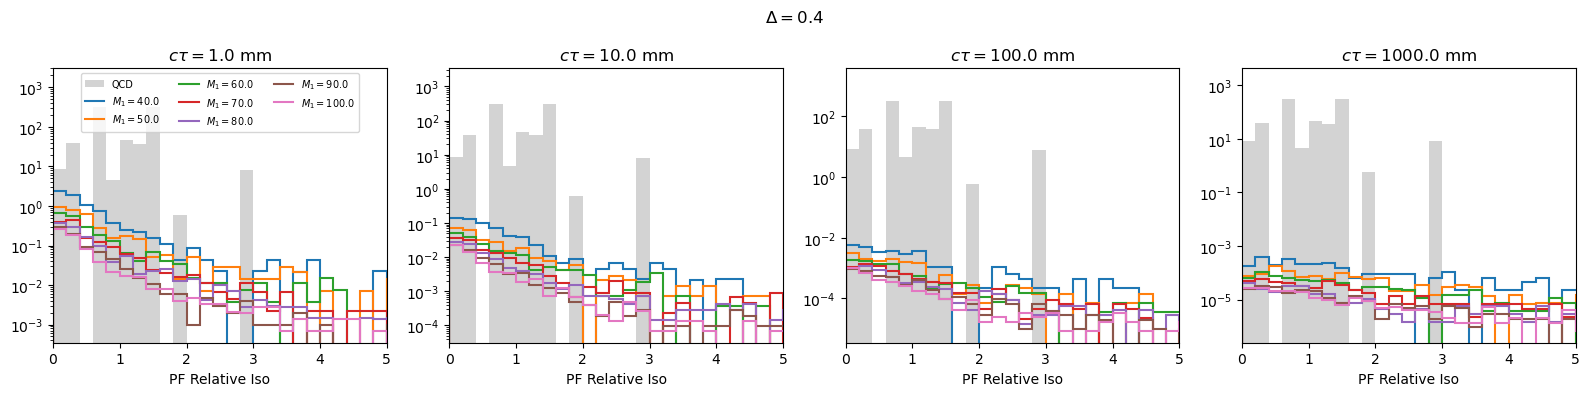

In [9]:
# vertex relative PF isolation dR < 0.3
plot("sel_vtx_PFRelIso3",[0,5],logy=True,rebin=2j)

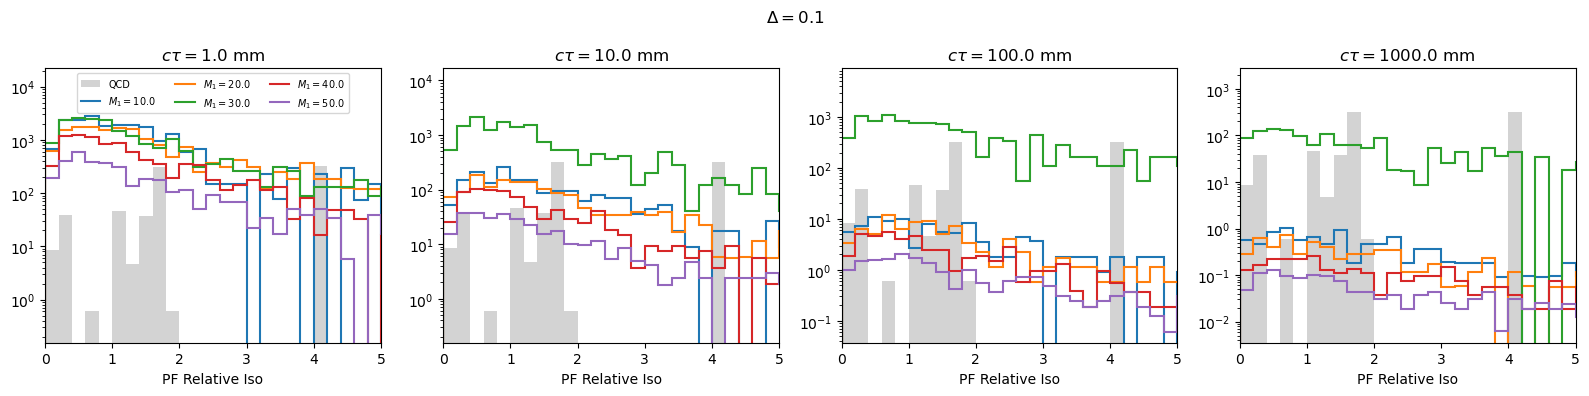

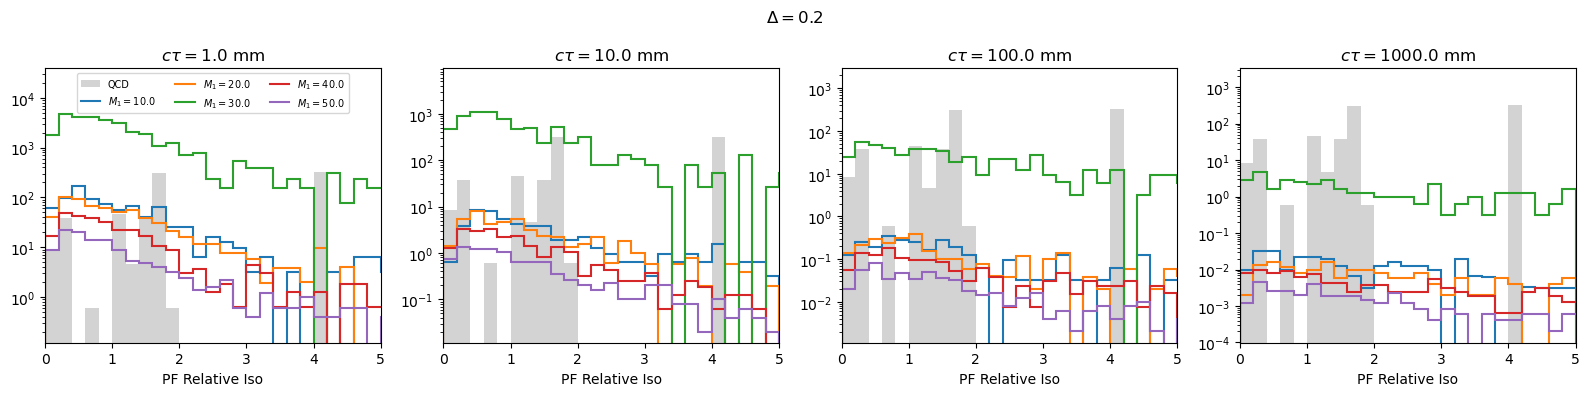

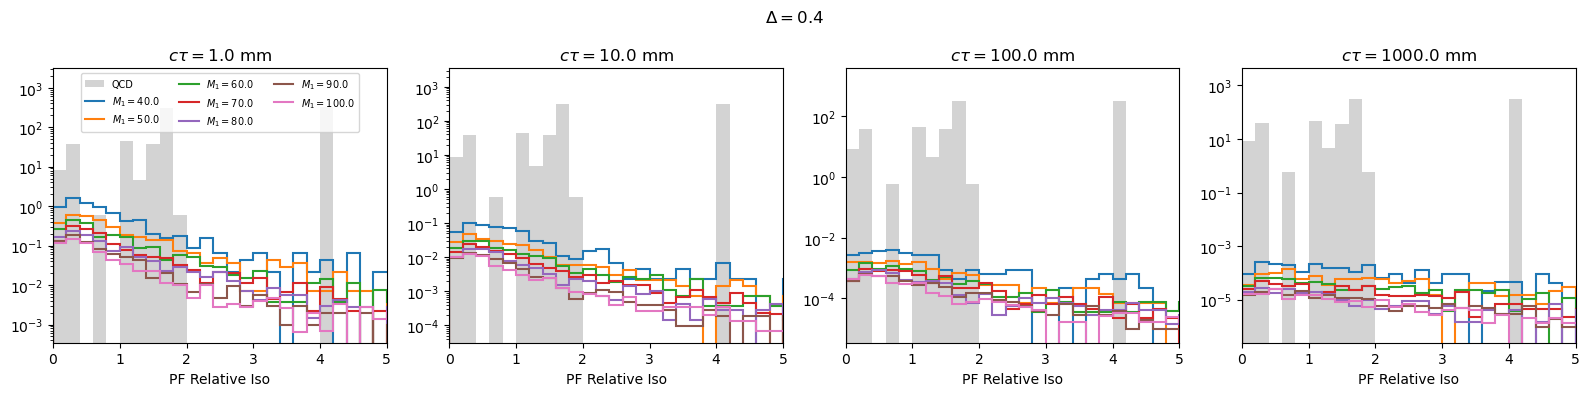

In [10]:
# vertex relative PF isolation dR < 0.4
plot("sel_vtx_PFRelIso4",[0,5],logy=True,rebin=2j)

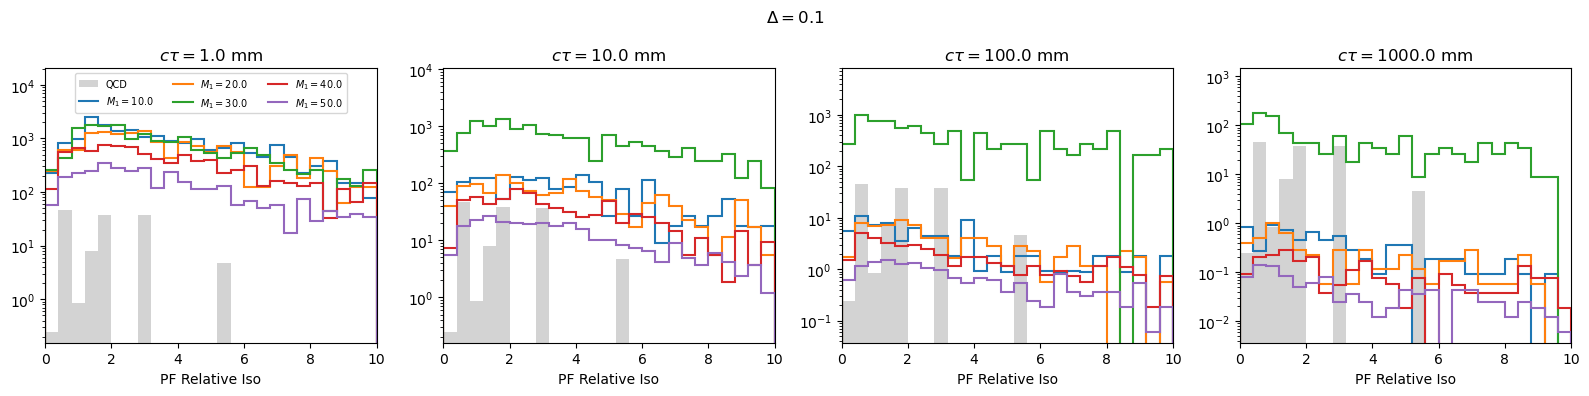

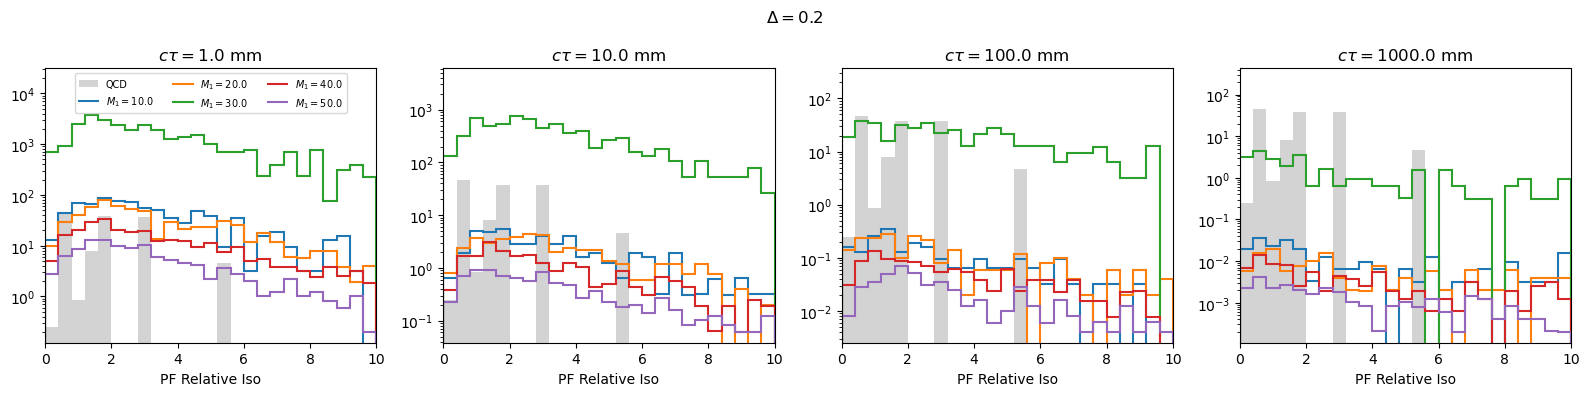

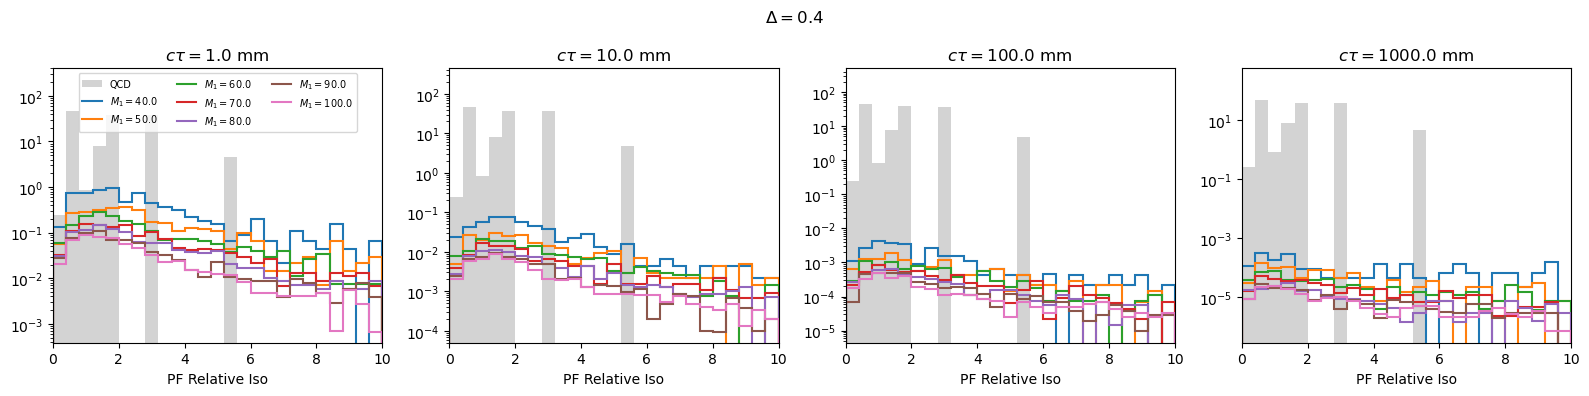

In [11]:
# vertex relative PF isolation dR < 0.8
plot("sel_vtx_PFRelIso8",[0,10],logy=True,rebin=4j)

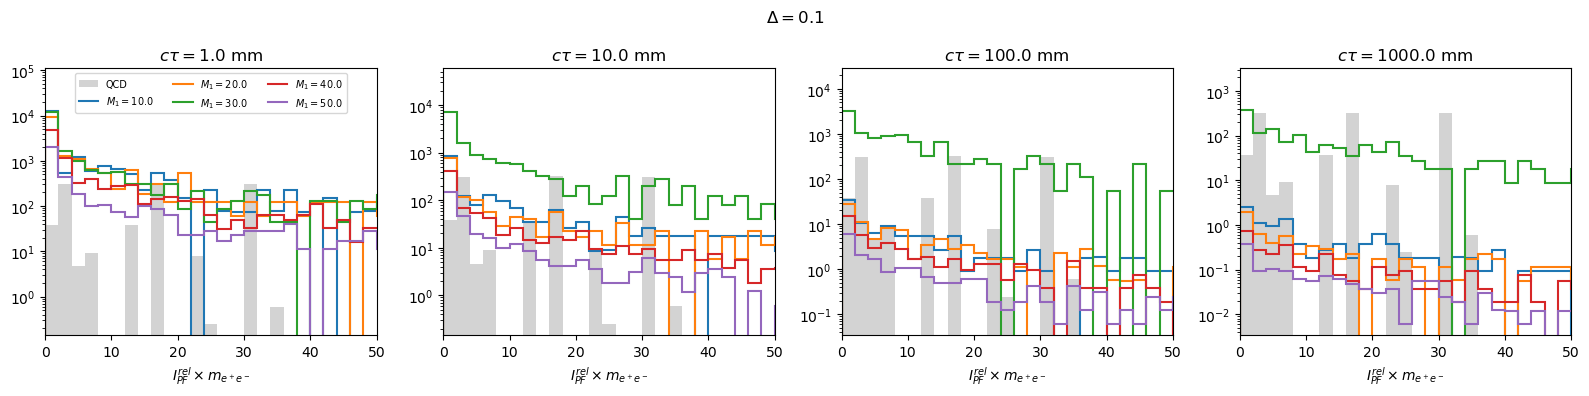

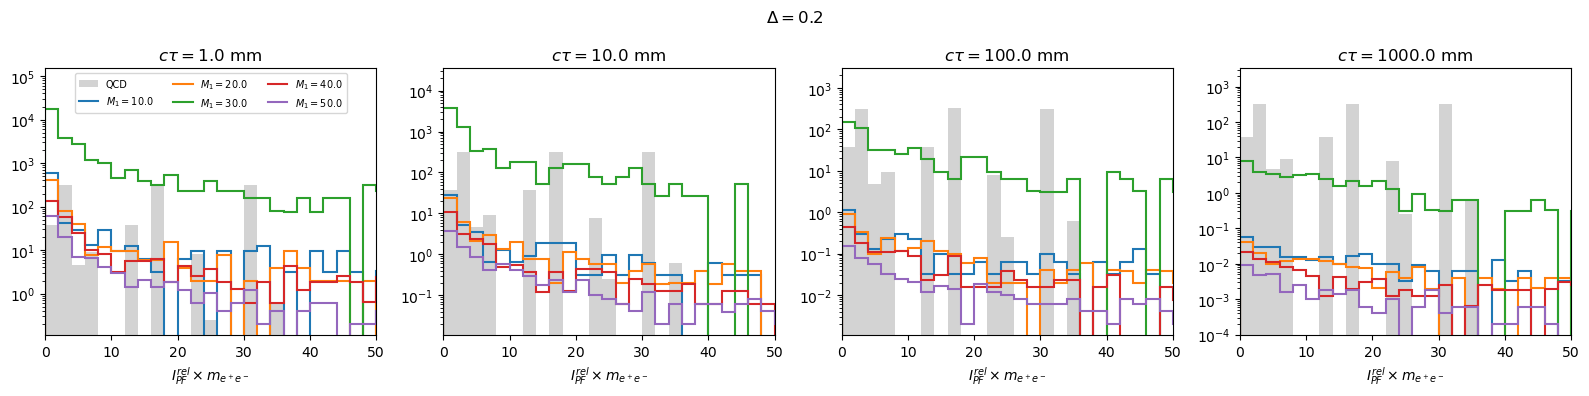

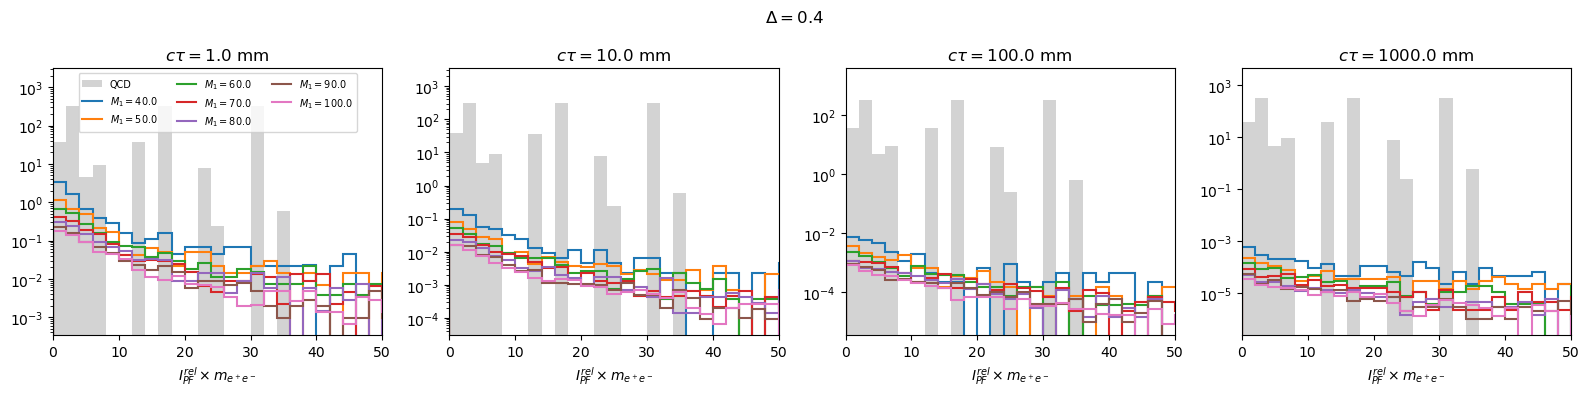

In [12]:
# vertex relative PF isolation*mass, dR < 0.3
plot("sel_vtx_PFRelIso3M",[0,50],logy=True,rebin=1j)

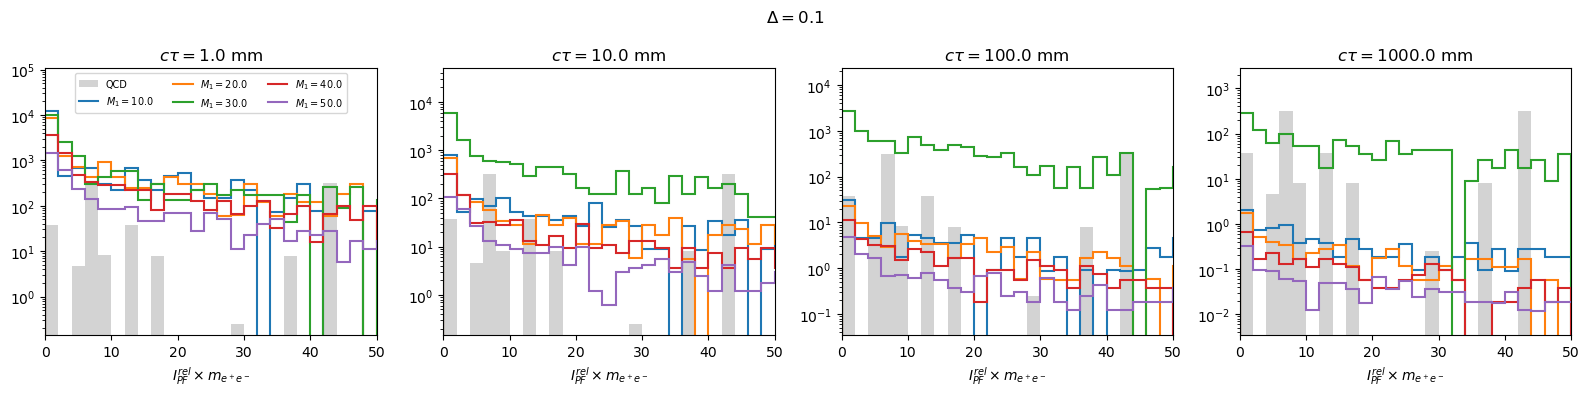

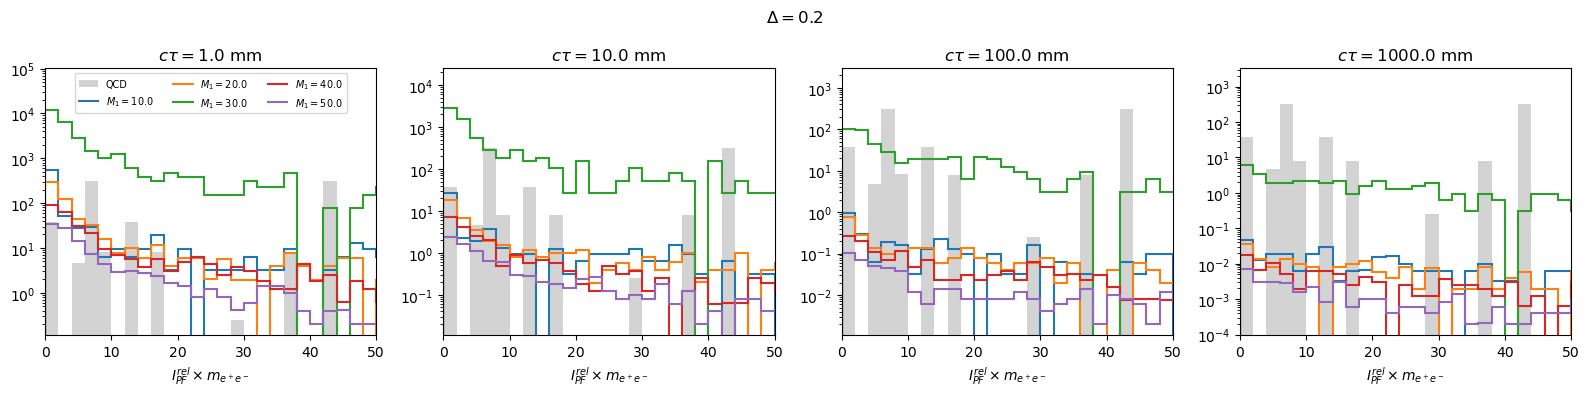

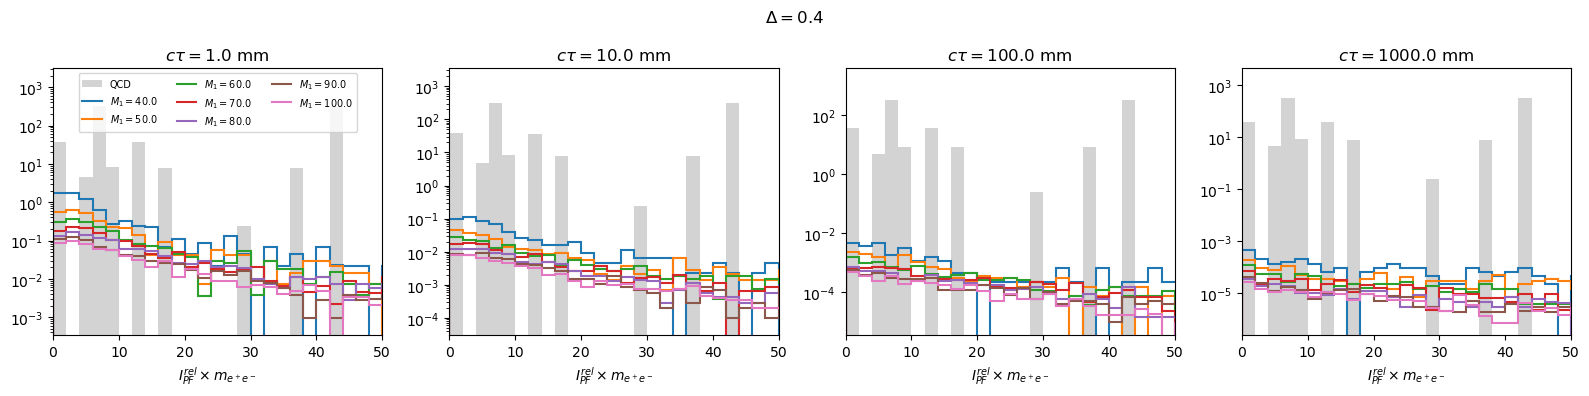

In [13]:
# vertex relative PF isolation*mass, dR < 0.4
plot("sel_vtx_PFRelIso4M",[0,50],logy=True,rebin=1j)

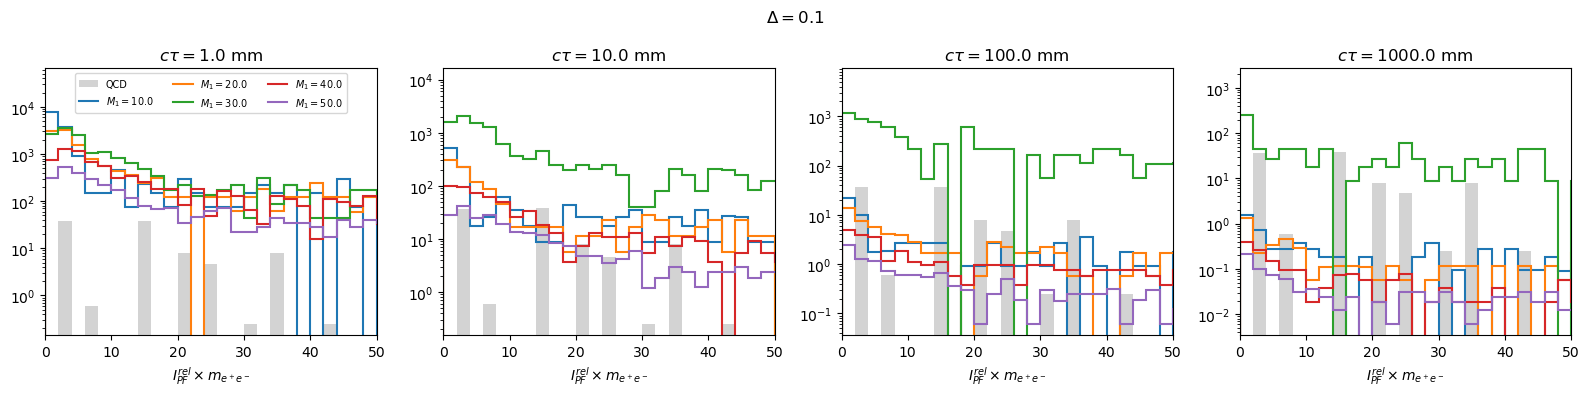

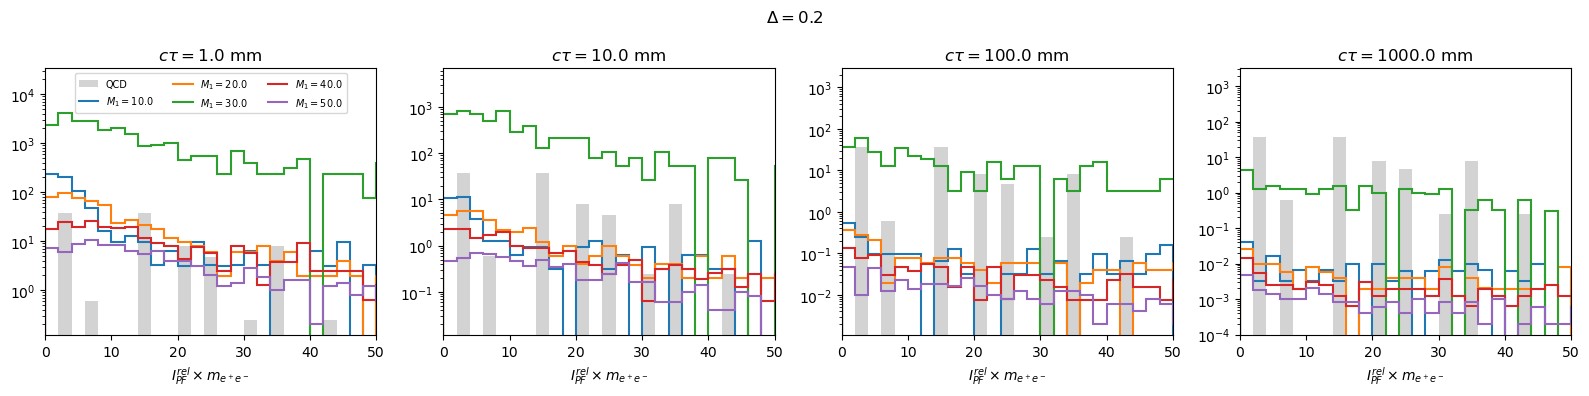

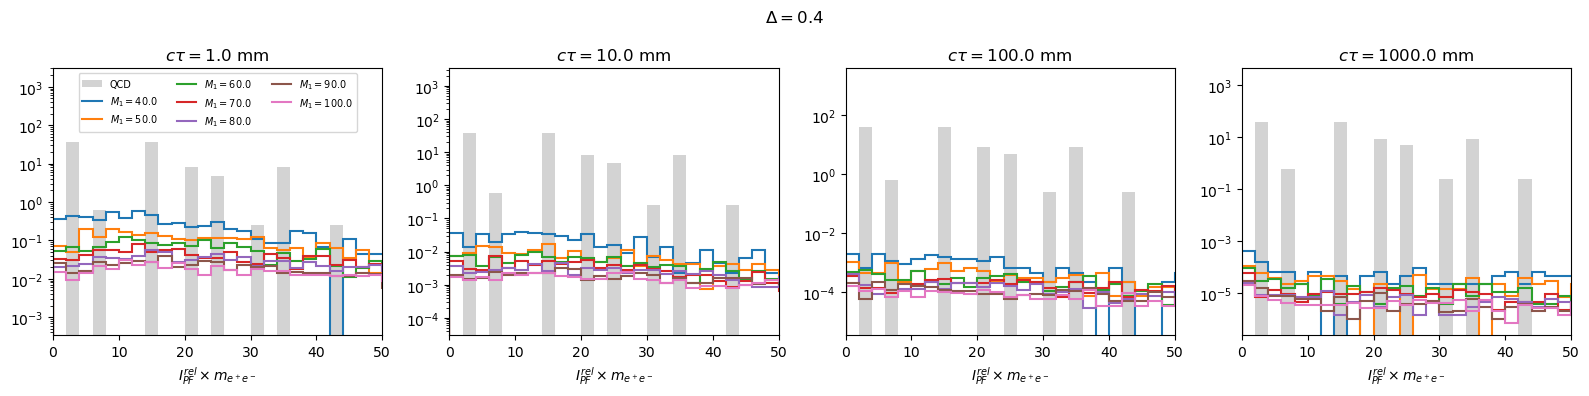

In [14]:
# vertex relative PF isolation*mass, dR < 0.8
plot("sel_vtx_PFRelIso8M",[0,50],logy=True,rebin=1j)

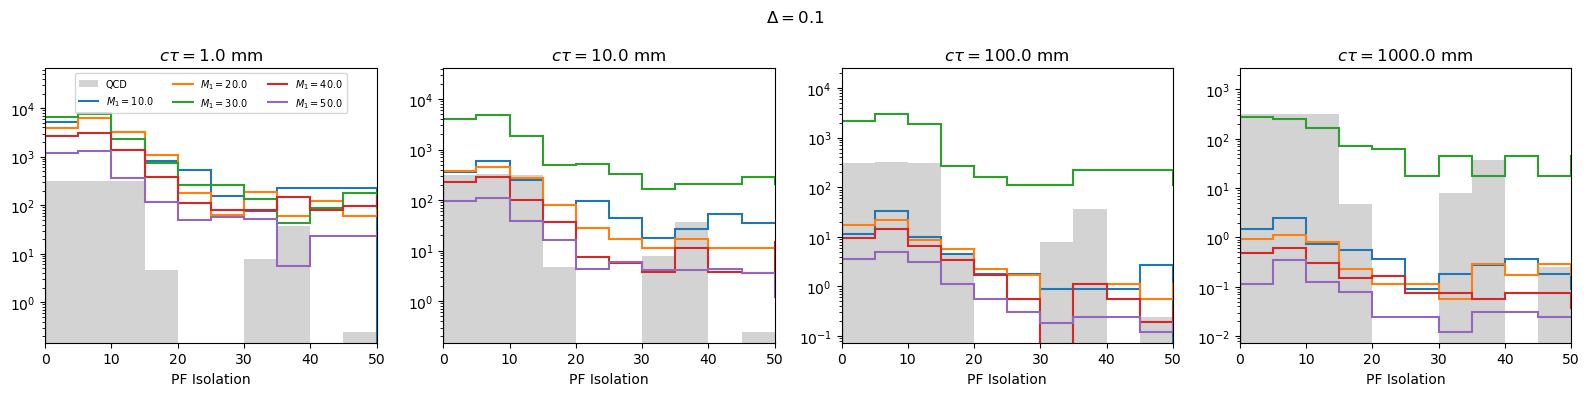

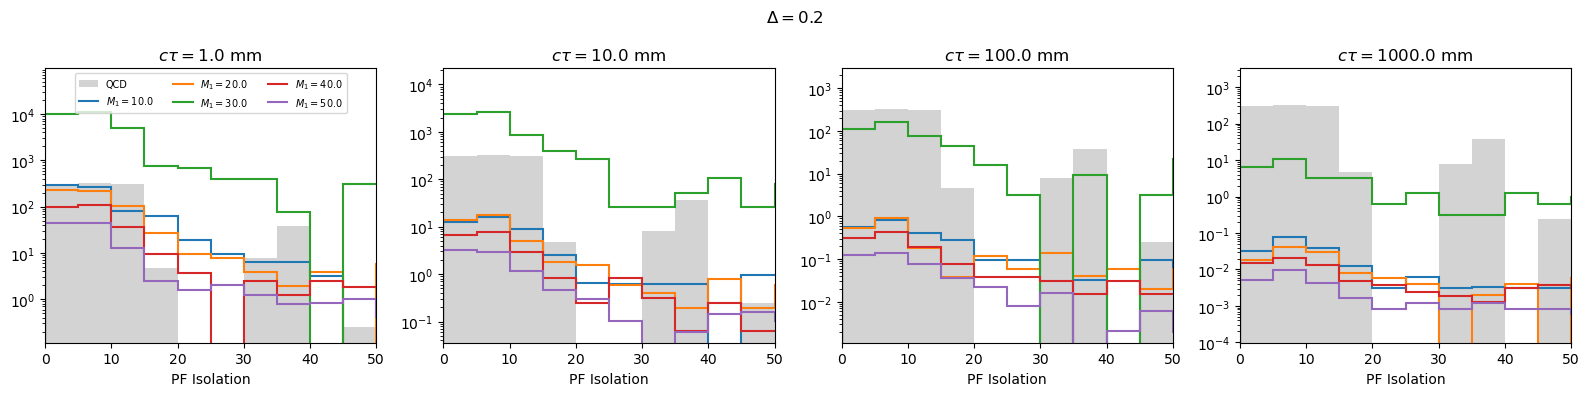

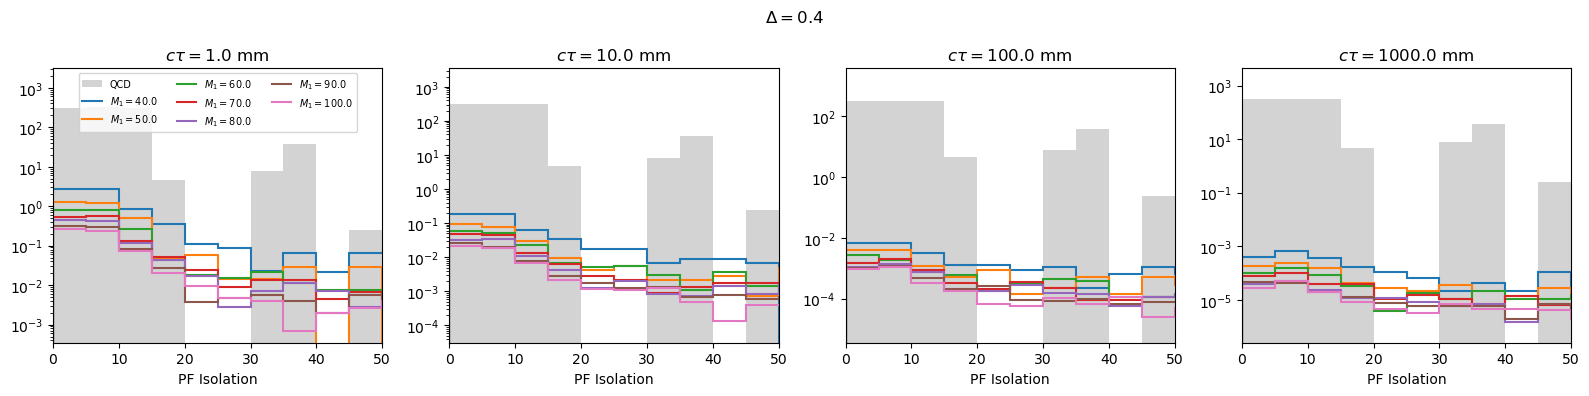

In [15]:
# vertex PF isolation dR < 0.3
plot("sel_vtx_PFIso3",[0,50],logy=True,rebin=5j)

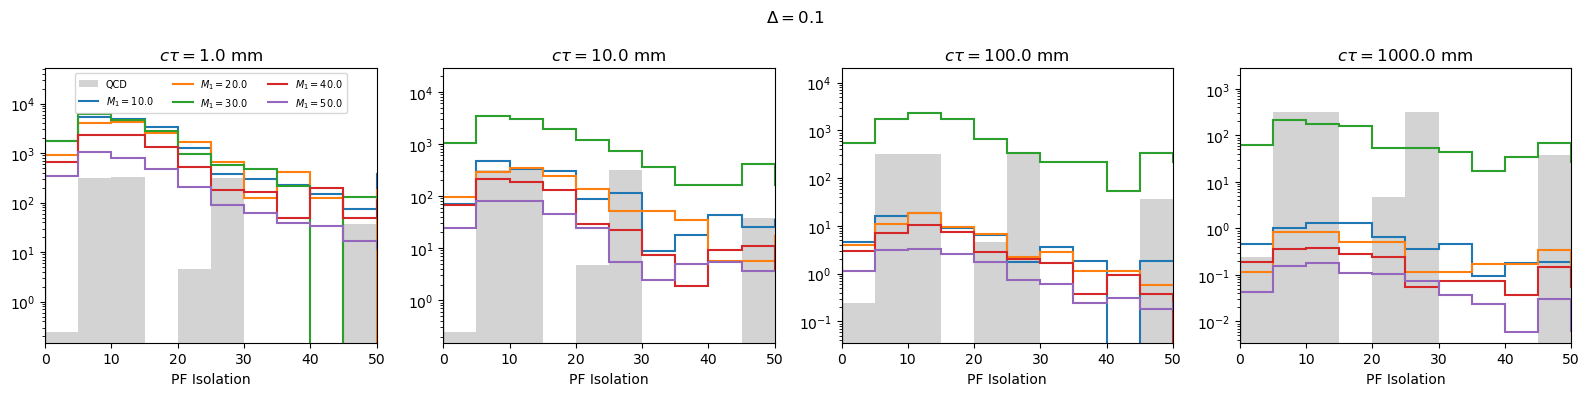

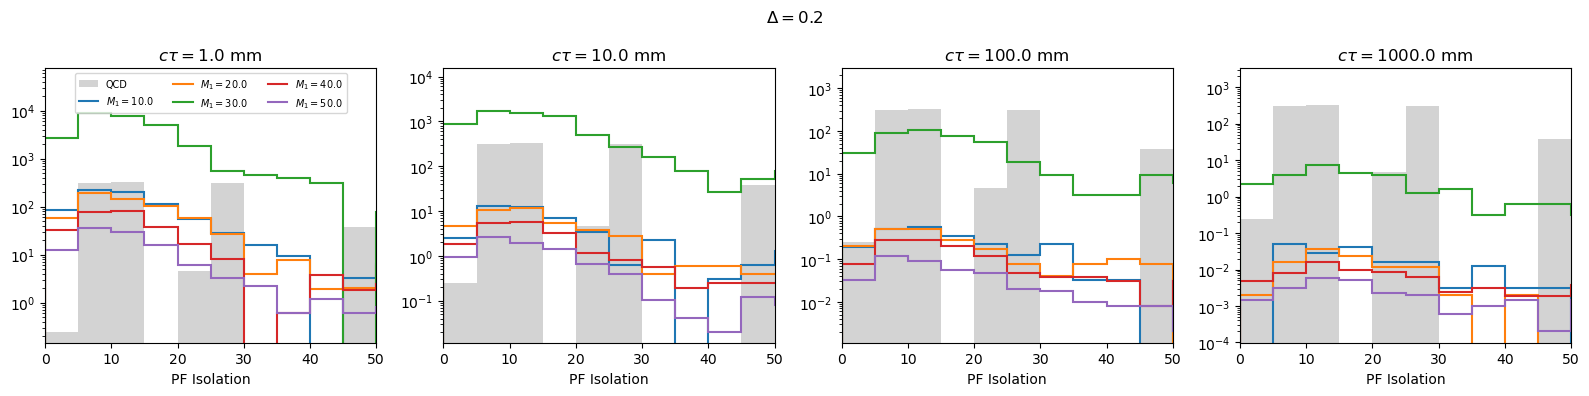

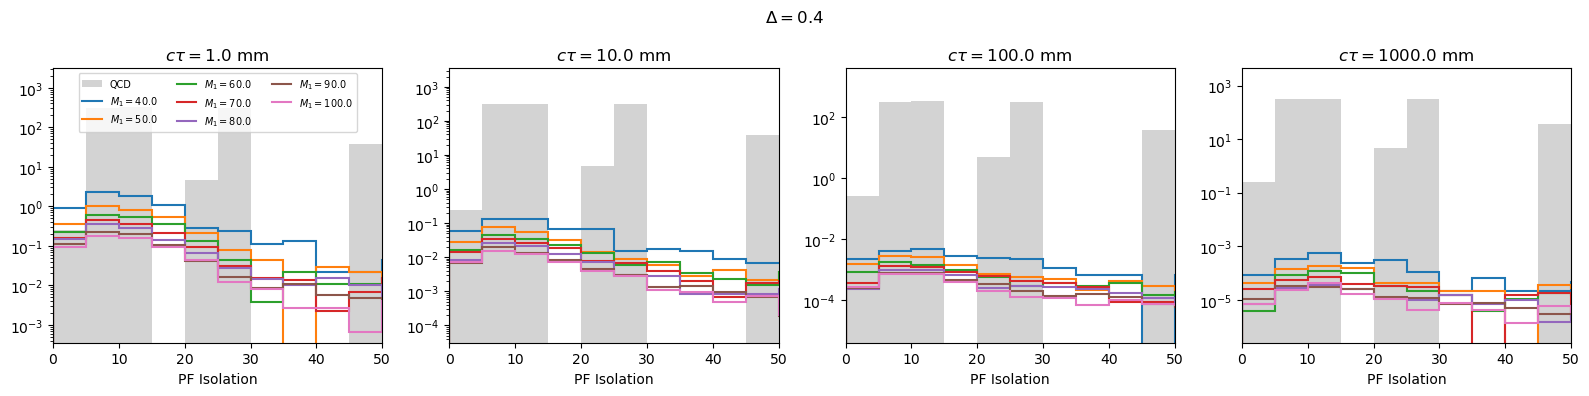

In [16]:
# vertex PF isolation dR < 0.4
plot("sel_vtx_PFIso4",[0,50],logy=True,rebin=5j)

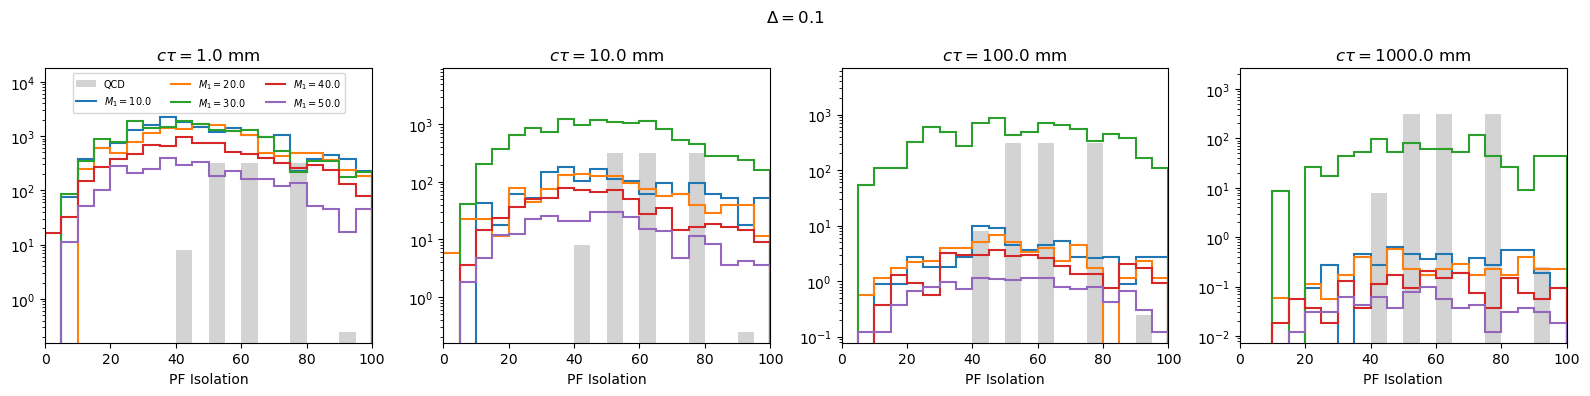

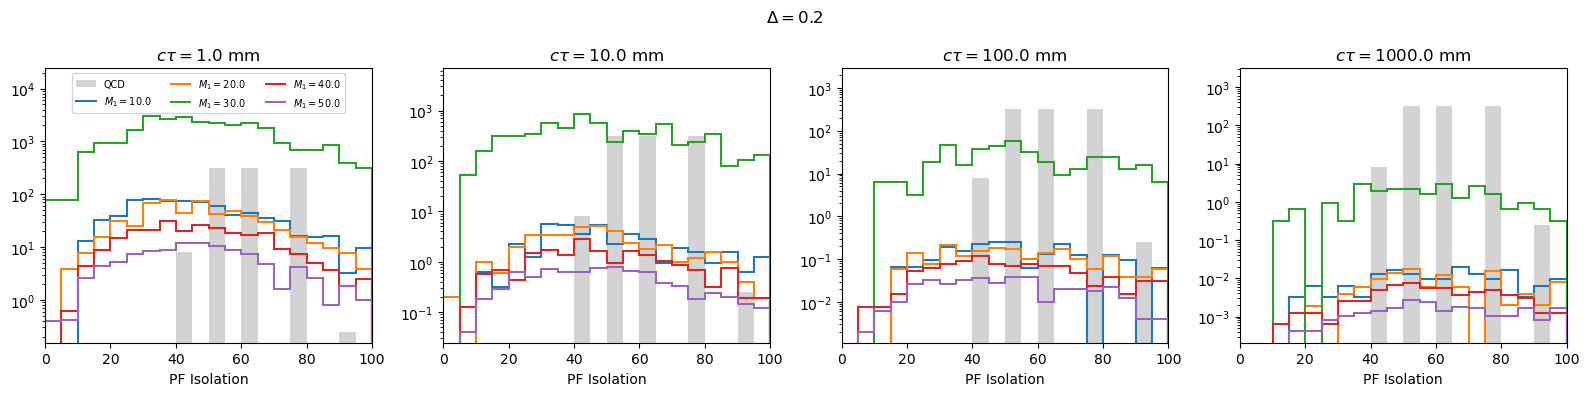

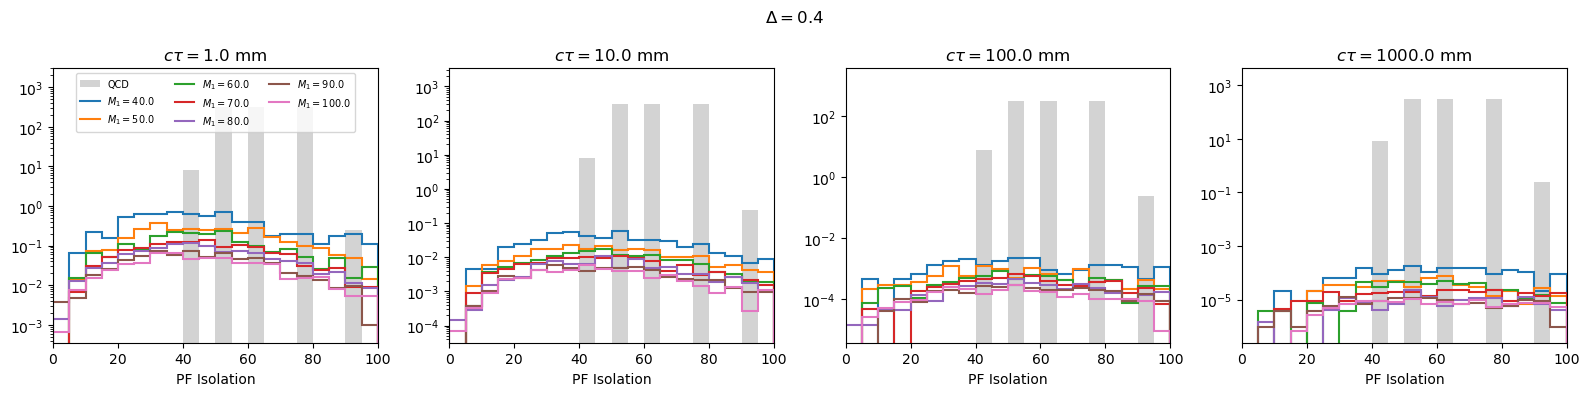

In [17]:
# vertex PF isolation dR < 0.8
plot("sel_vtx_PFIso8",[0,100],logy=True,rebin=5j)

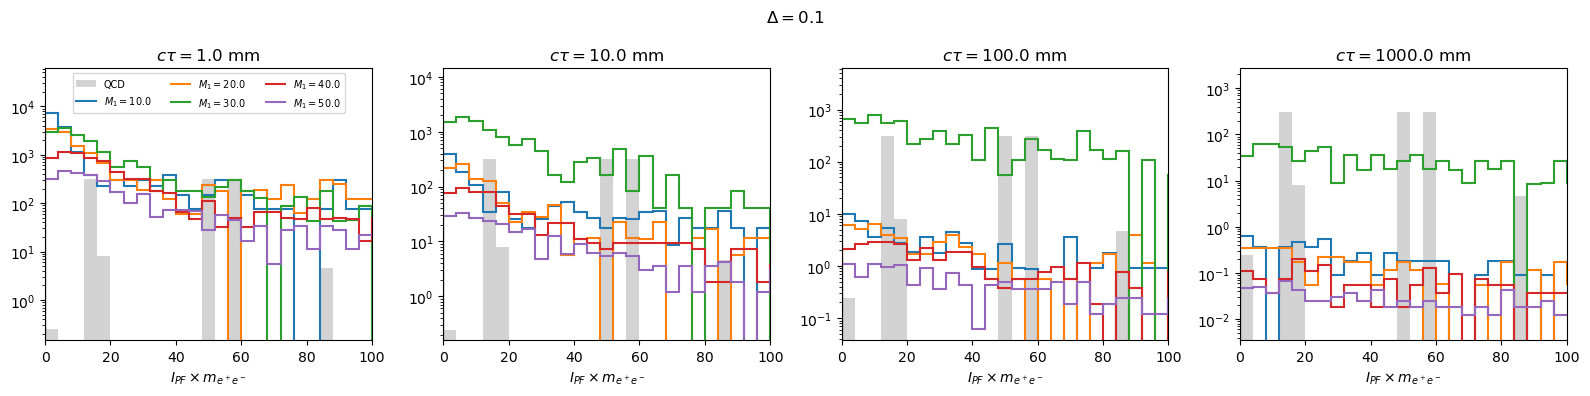

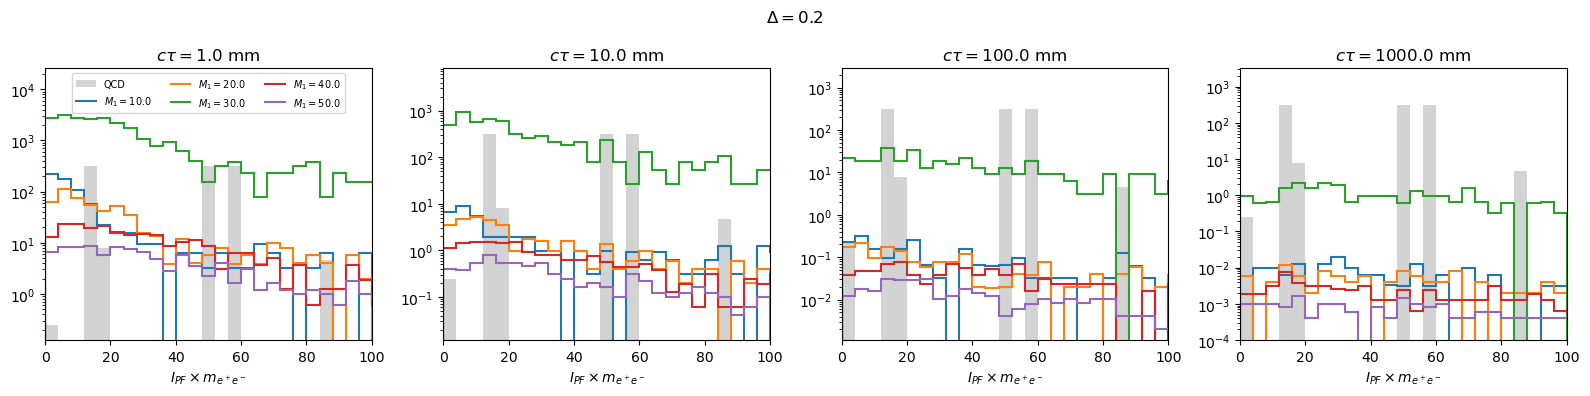

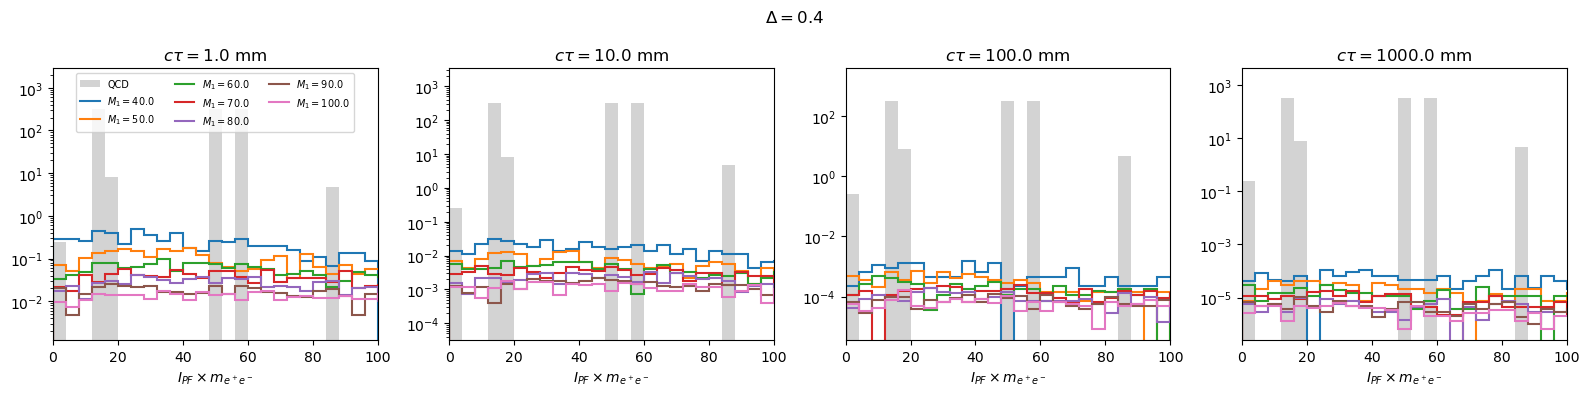

In [18]:
# vertex PF isolation * mass, dR < 0.3
plot("sel_vtx_PFIso3M",[0,100],logy=True,rebin=2j)

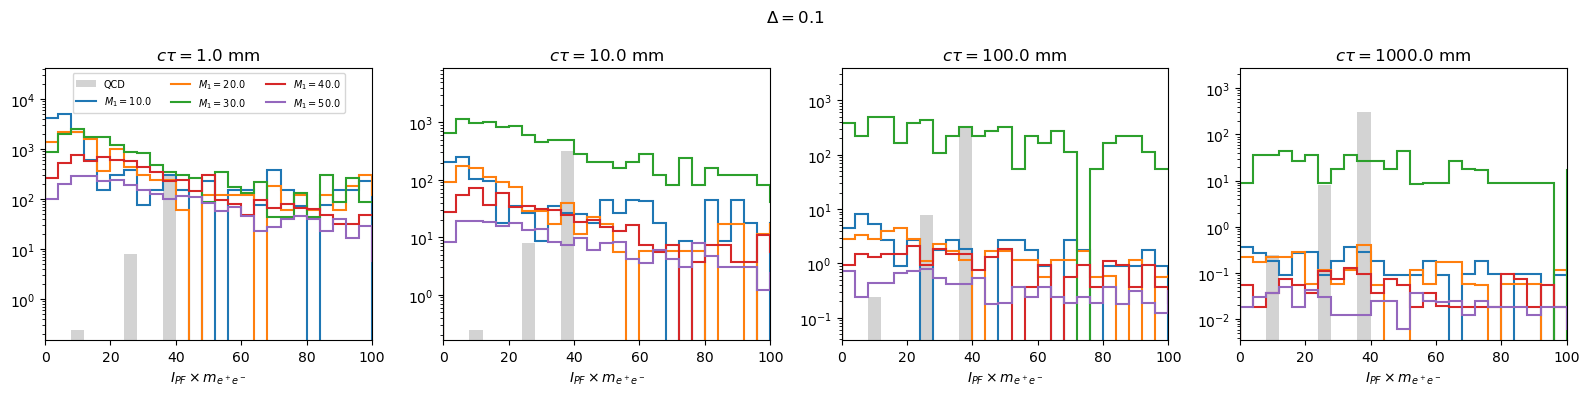

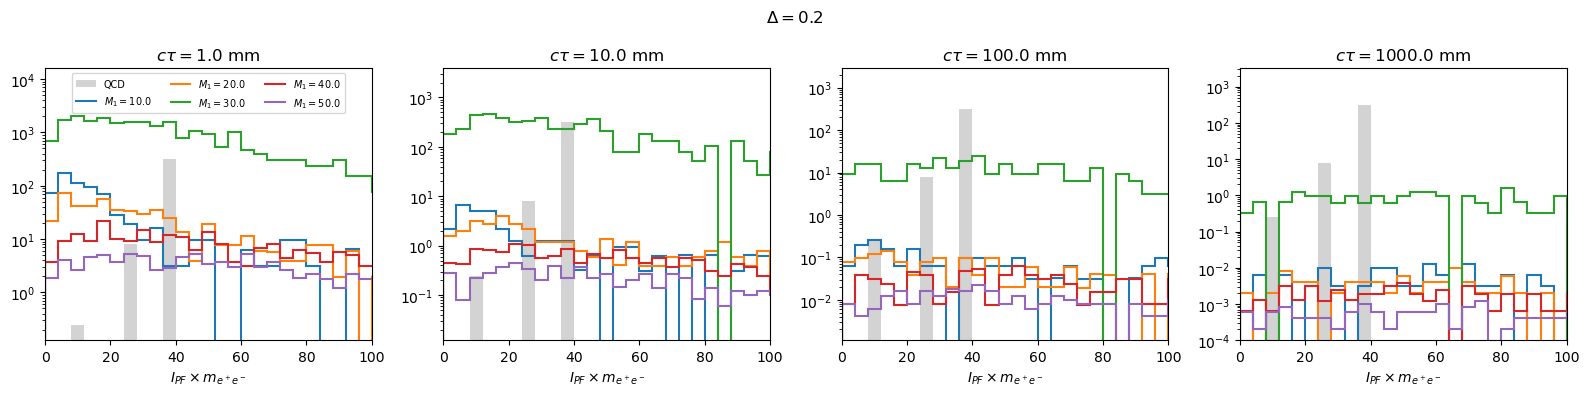

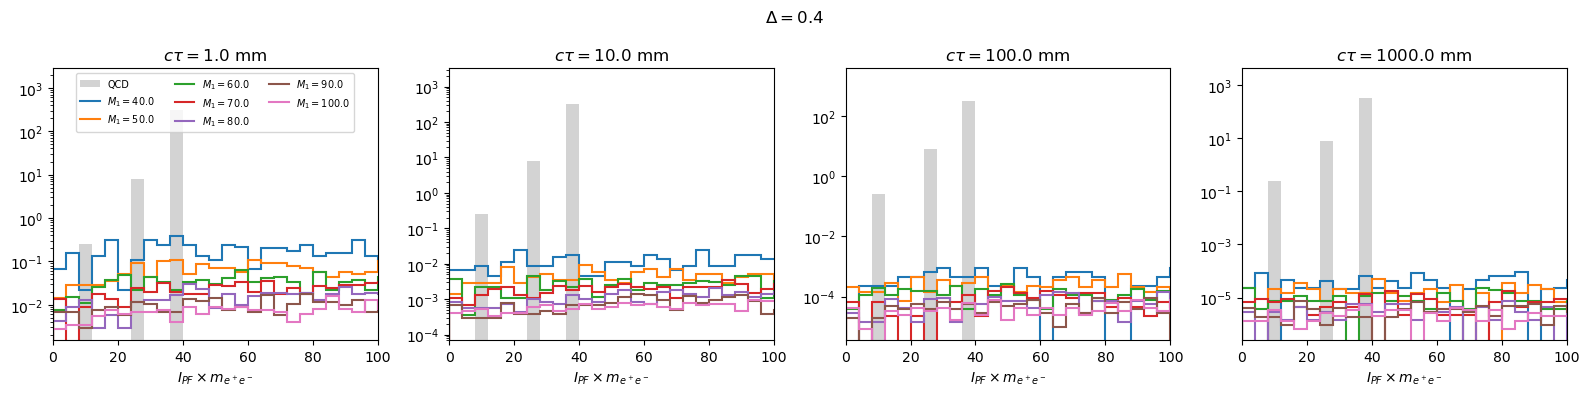

In [19]:
# vertex PF isolation * mass, dR < 0.4
plot("sel_vtx_PFIso4M",[0,100],logy=True,rebin=2j)

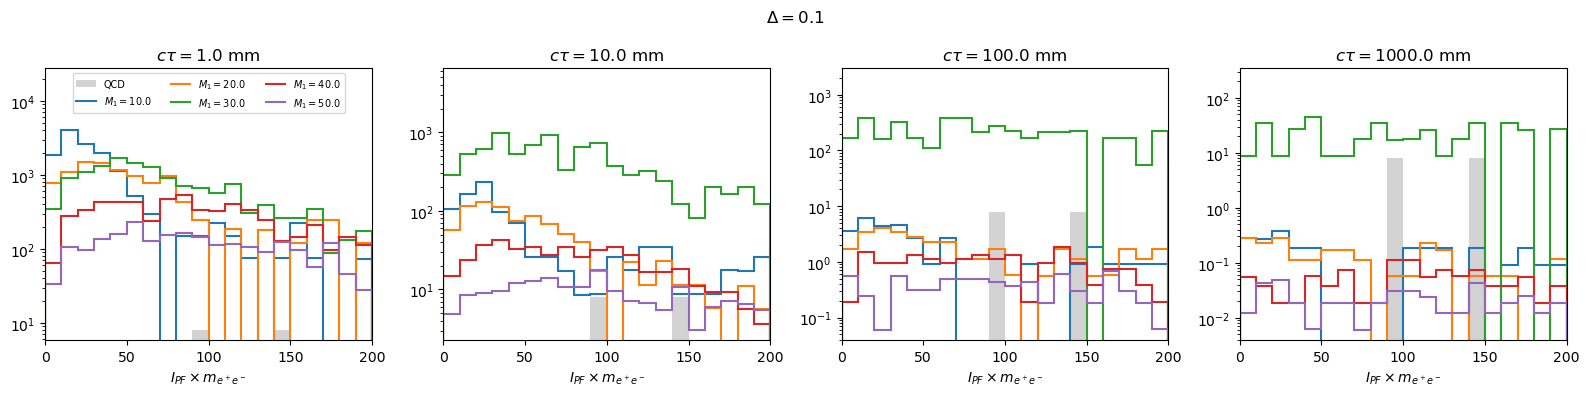

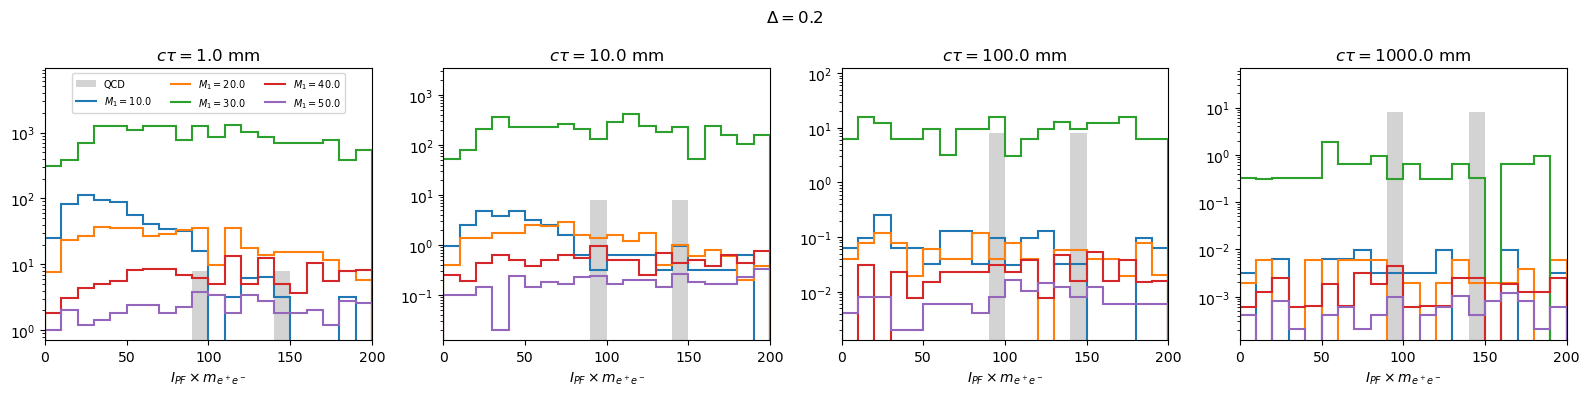

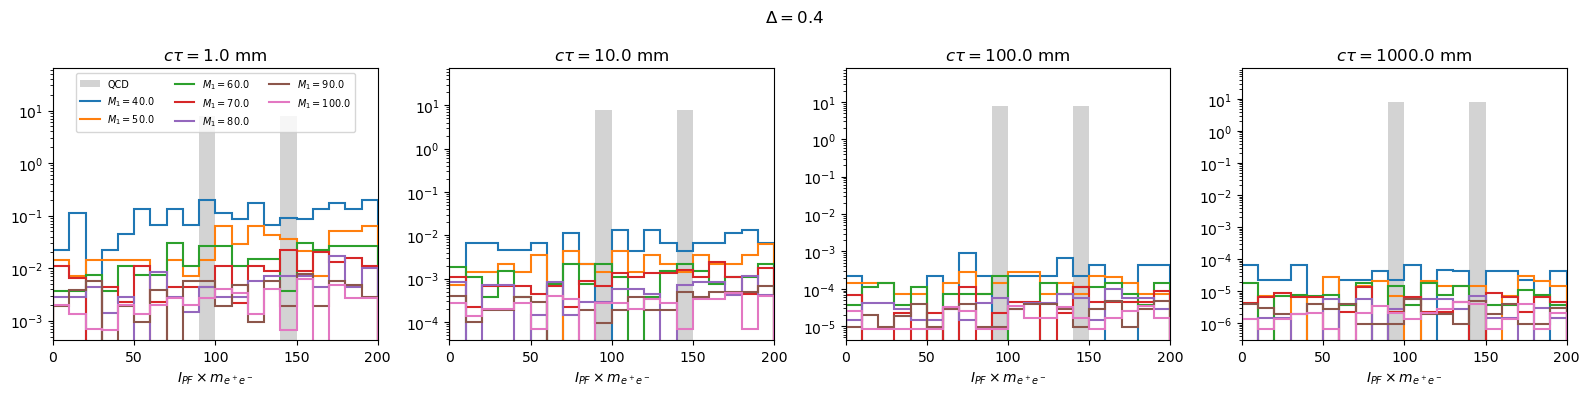

In [20]:
# vertex PF isolation * mass, dR < 0.8
plot("sel_vtx_PFIso8M",[0,200],logy=True,rebin=5j)

# Electron Quality

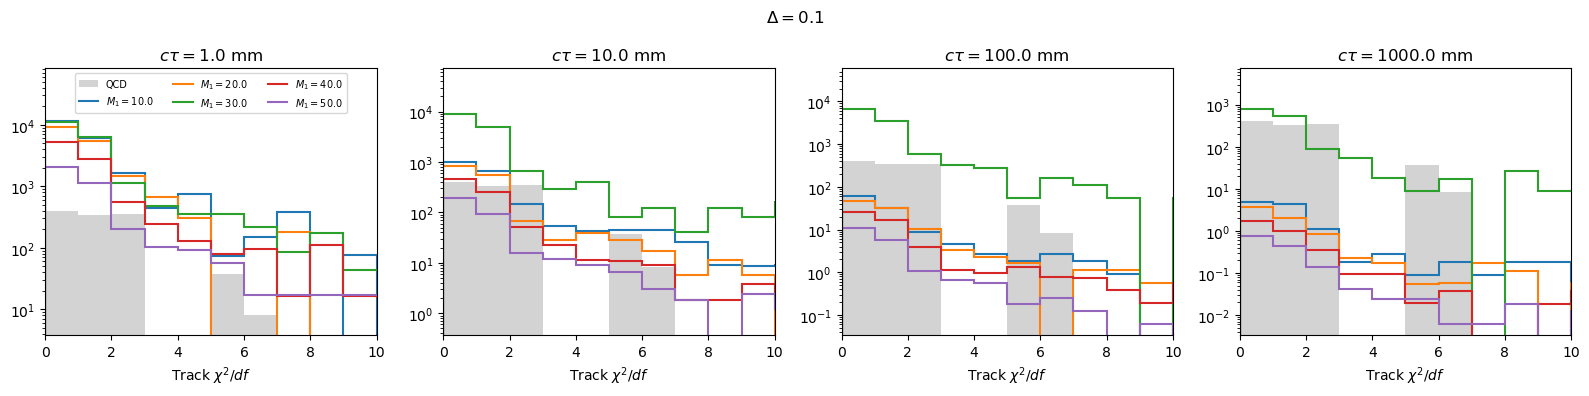

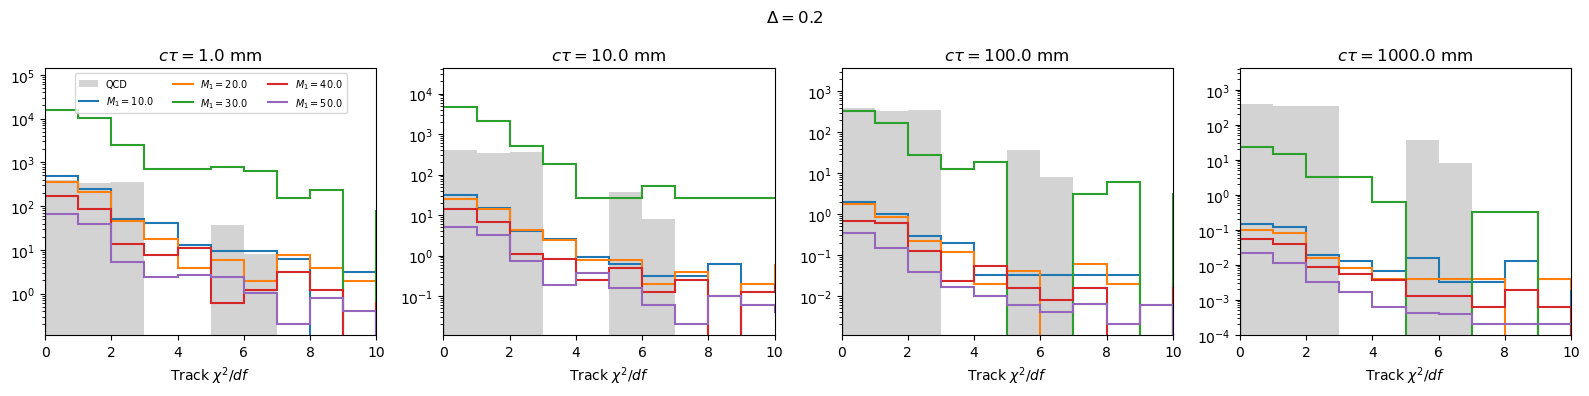

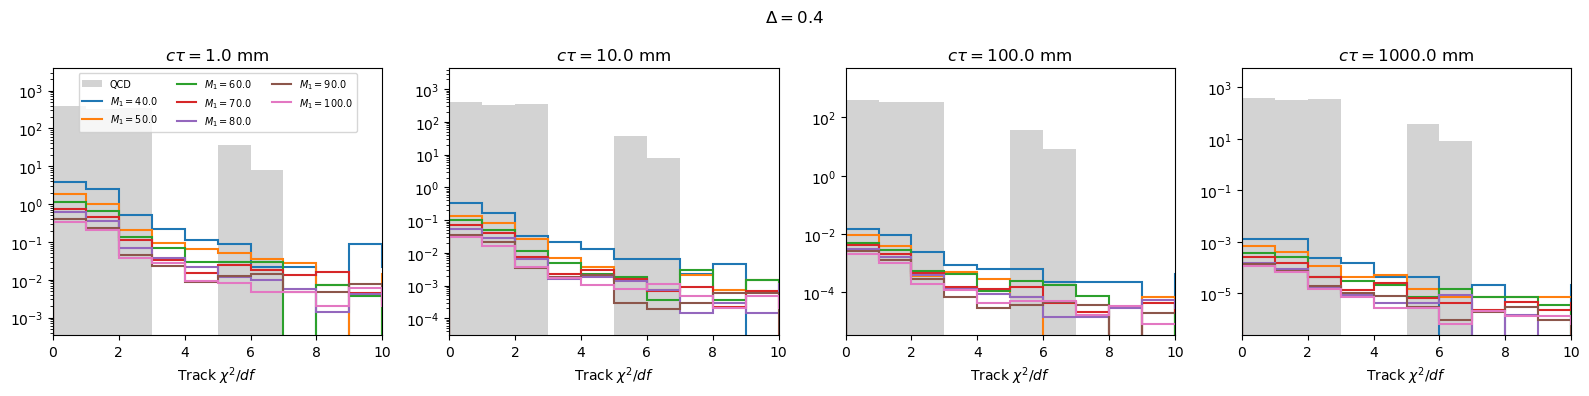

In [68]:
# electron 1 track chi2
plot("sel_e1_trkChi2",[0,10],logy=True,rebin=2j)

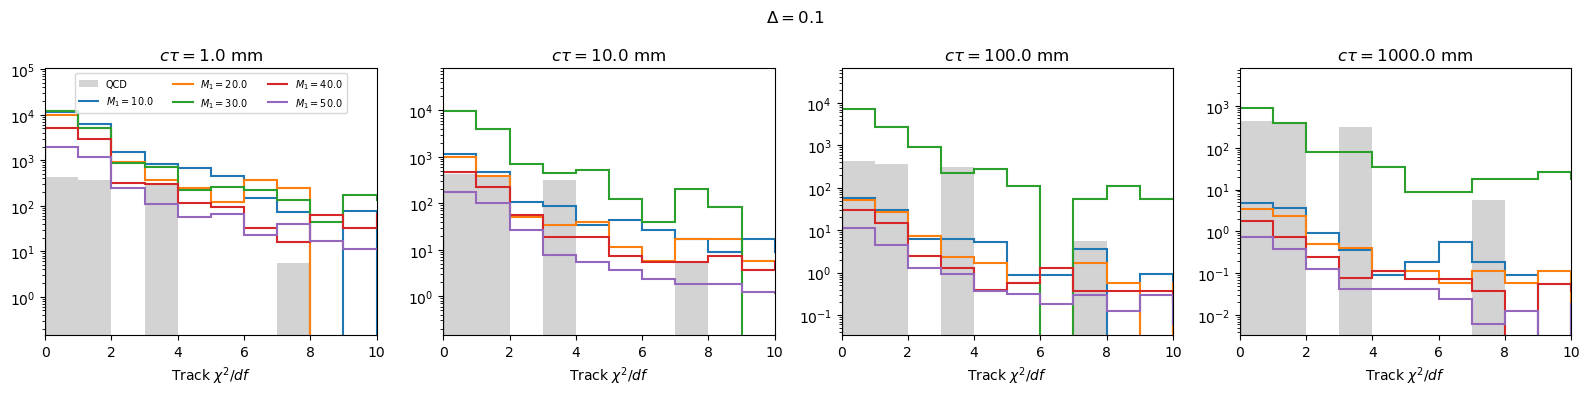

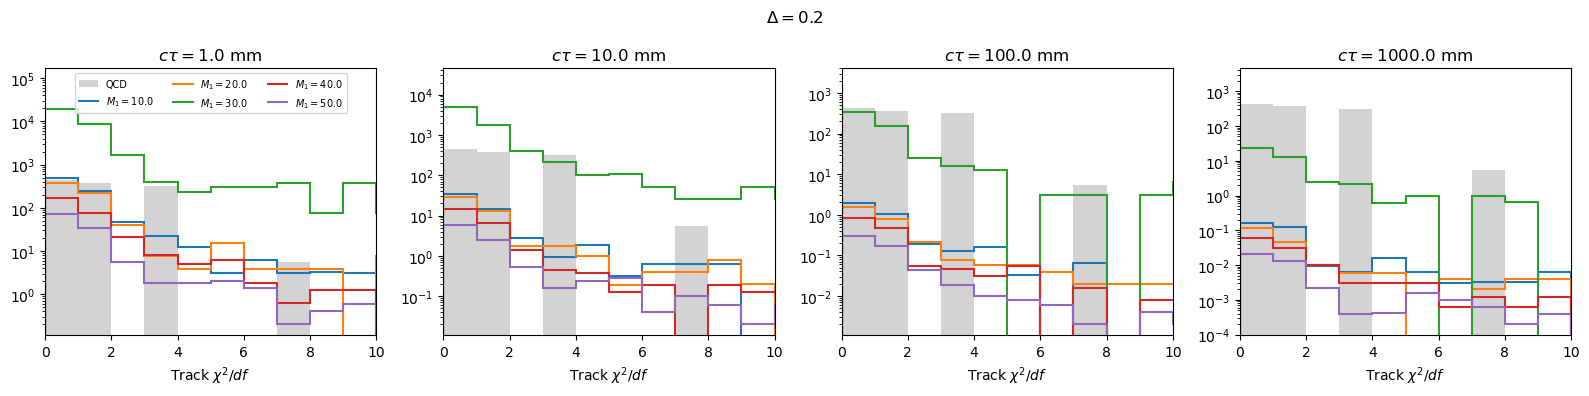

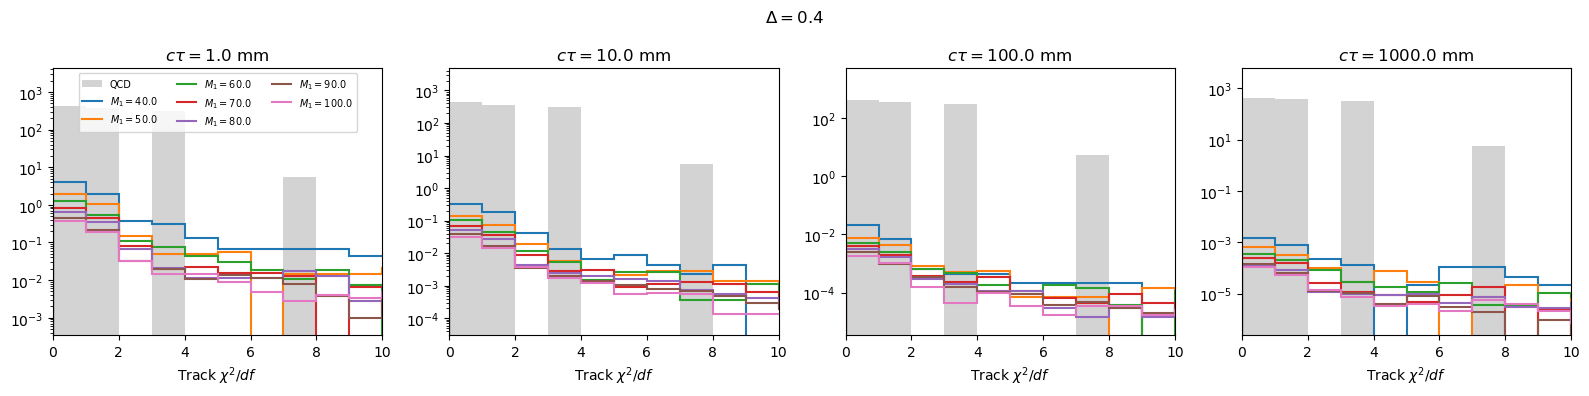

In [21]:
# electron 2 track chi2
plot("sel_e2_trkChi2",[0,10],logy=True,rebin=2j)

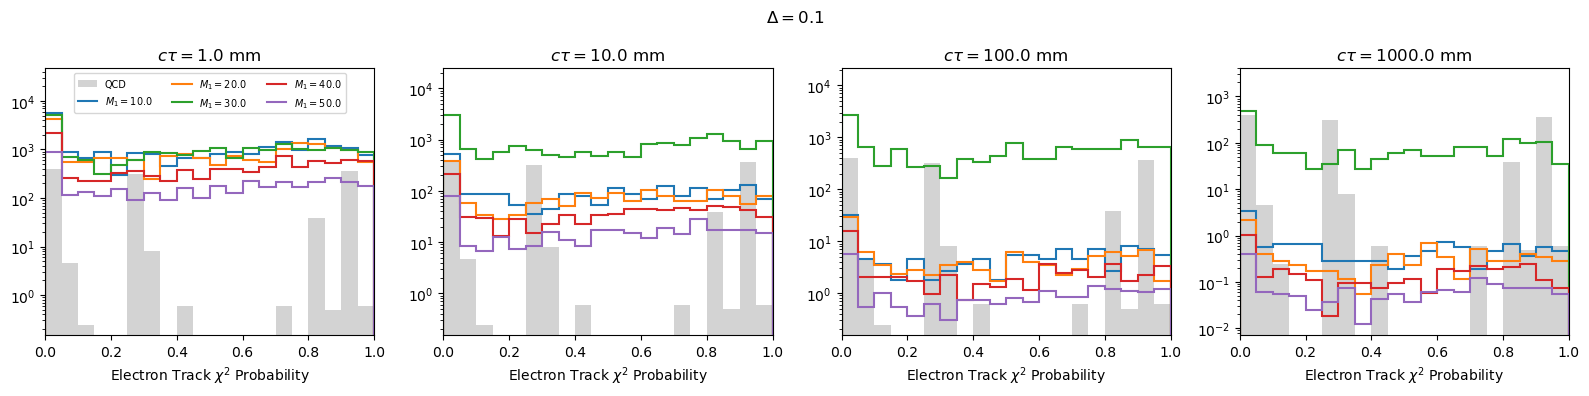

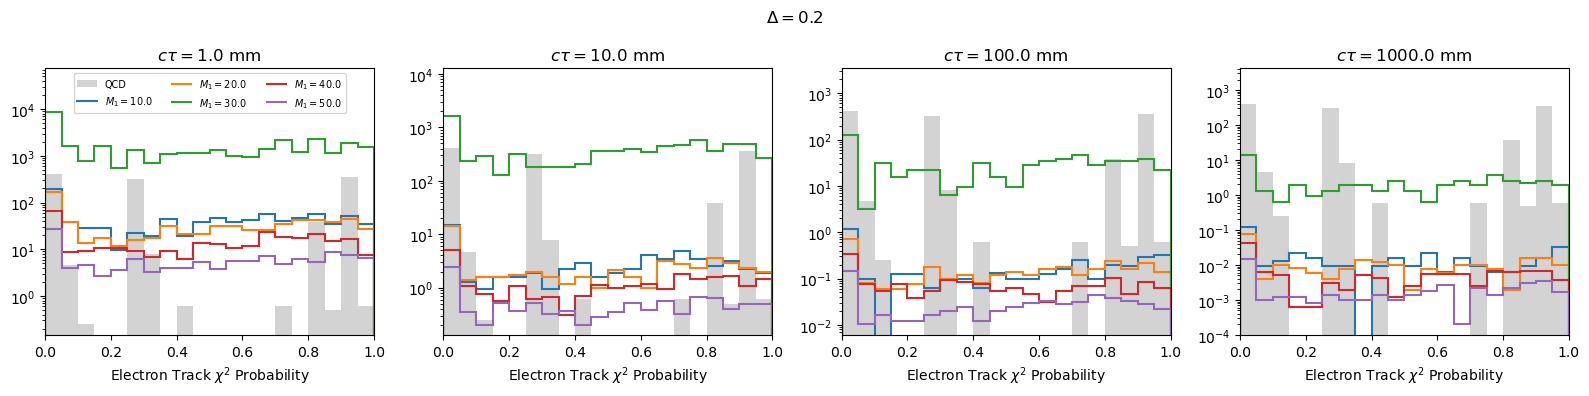

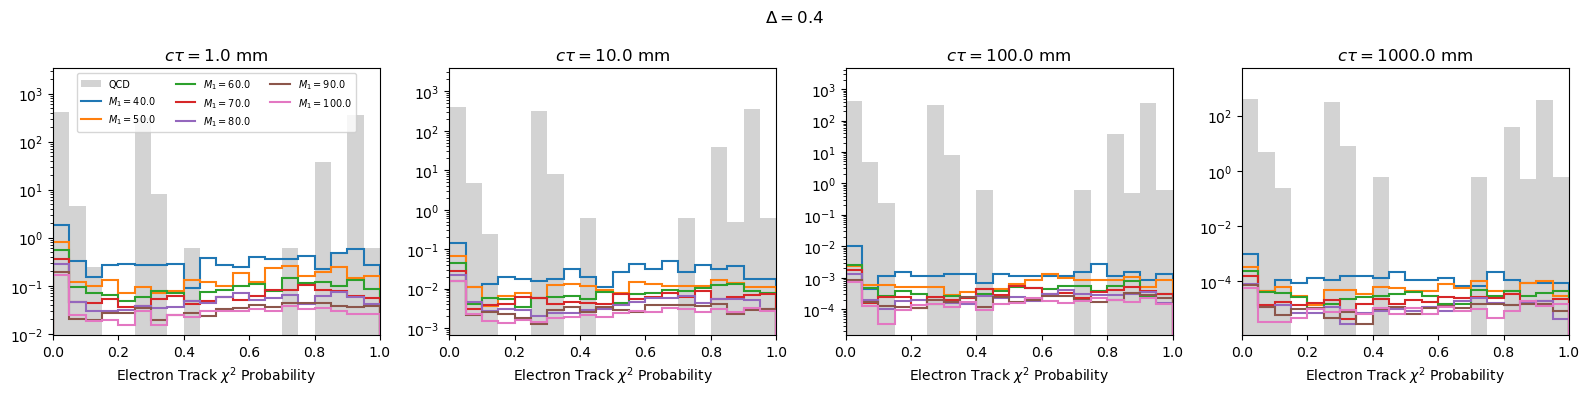

In [22]:
# electron 1 track probability
plot("sel_e1_trkProb",[0,1],logy=True,rebin=5j)

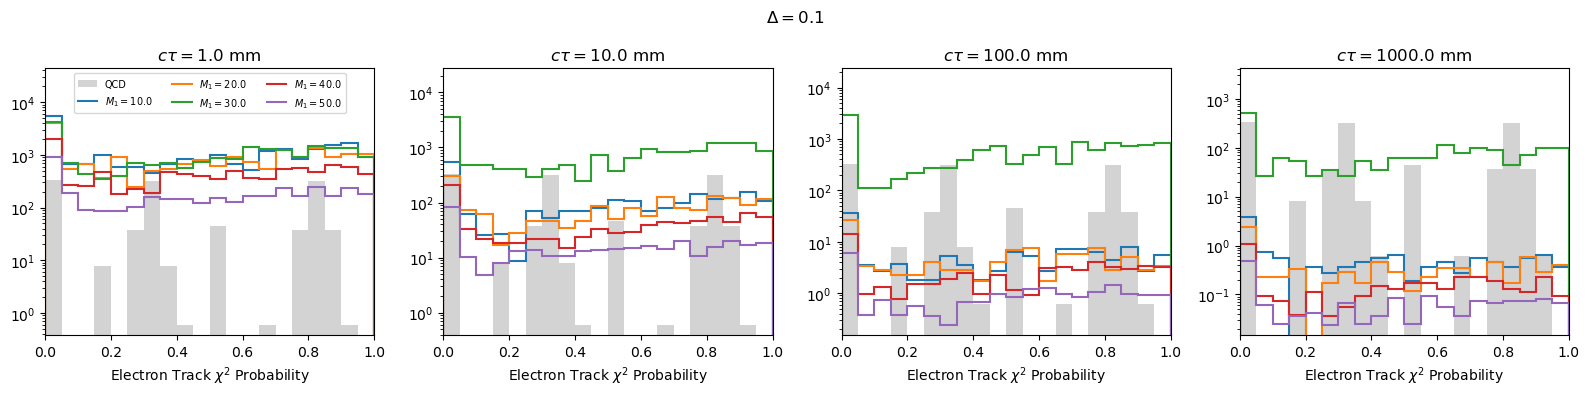

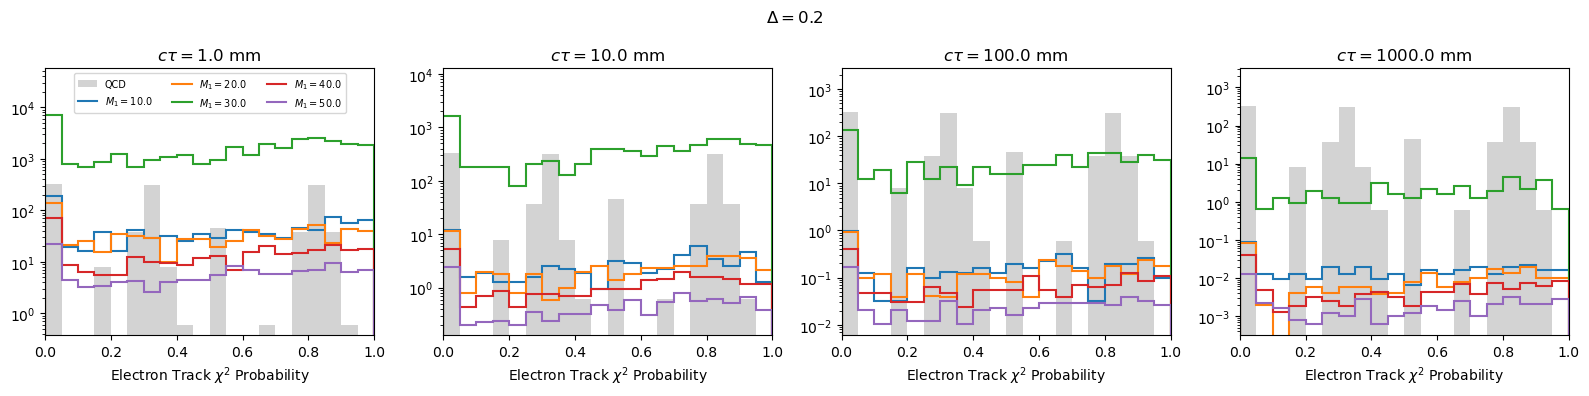

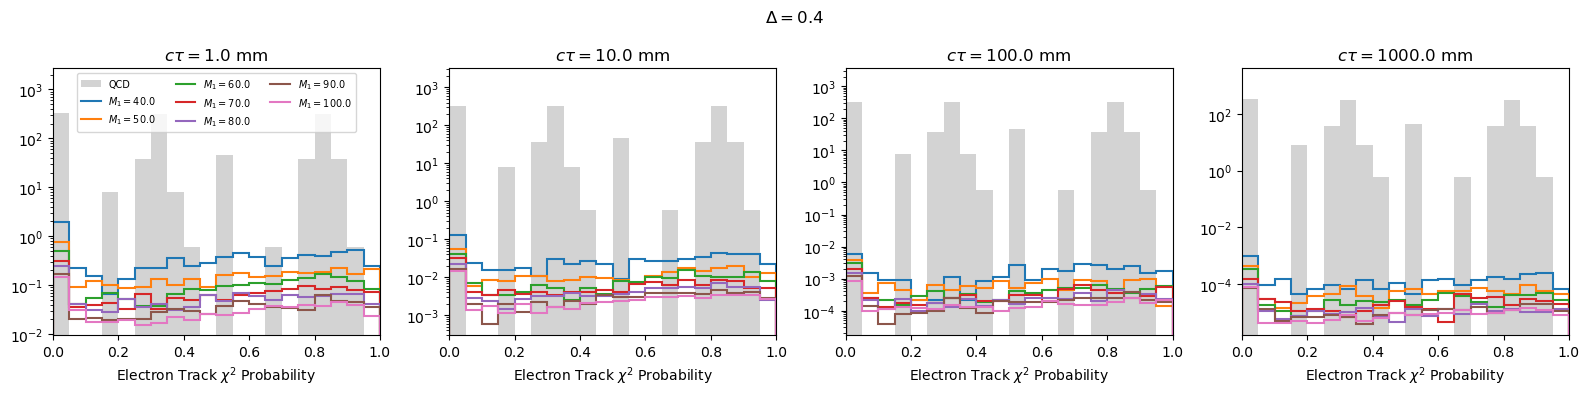

In [23]:
# electron 2 track probability
plot("sel_e2_trkProb",[0,1],logy=True,rebin=5j)

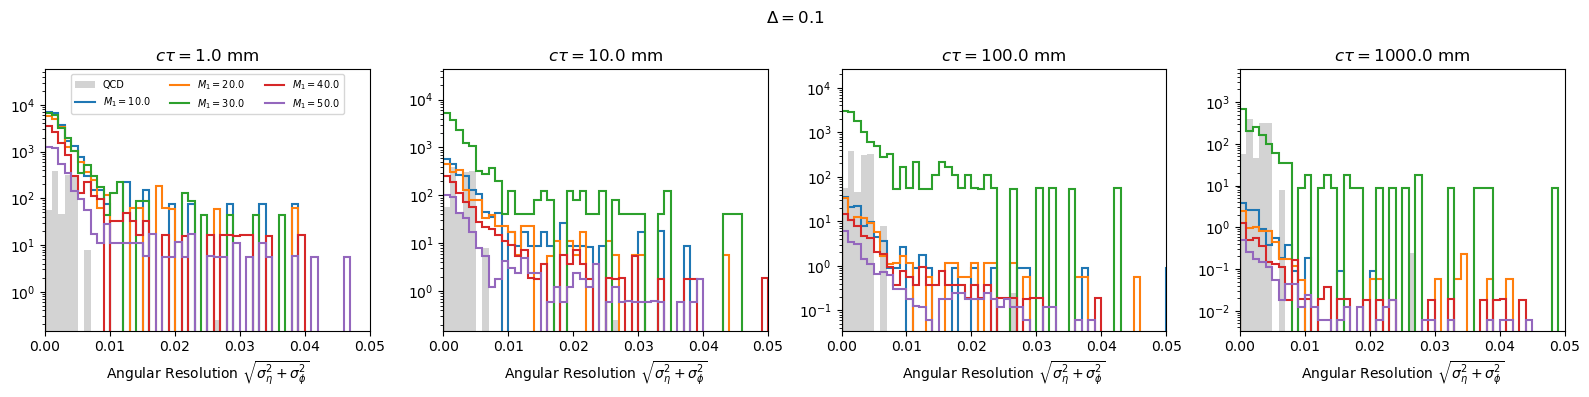

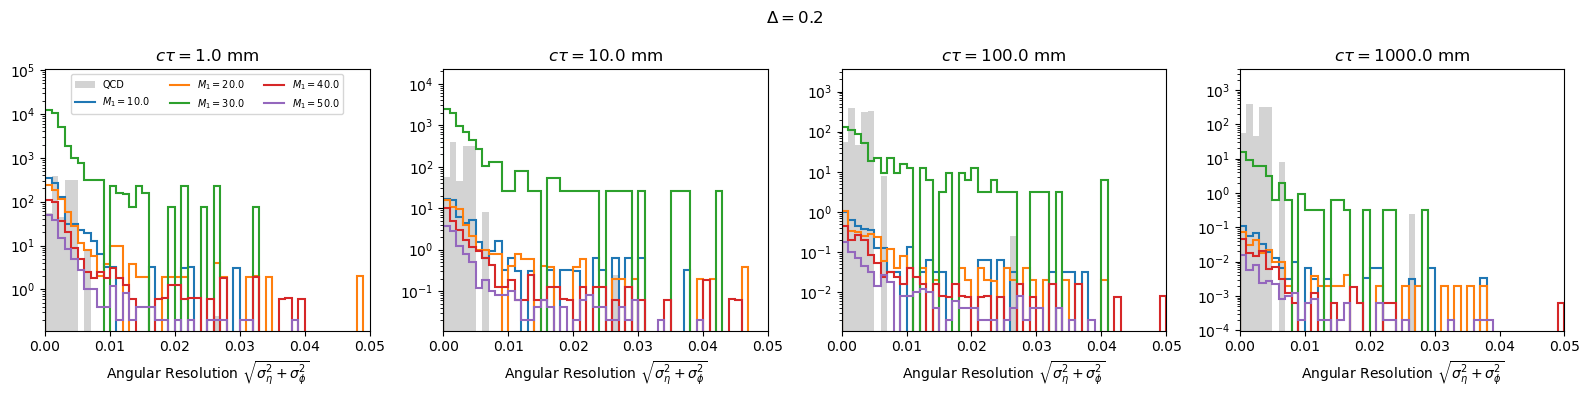

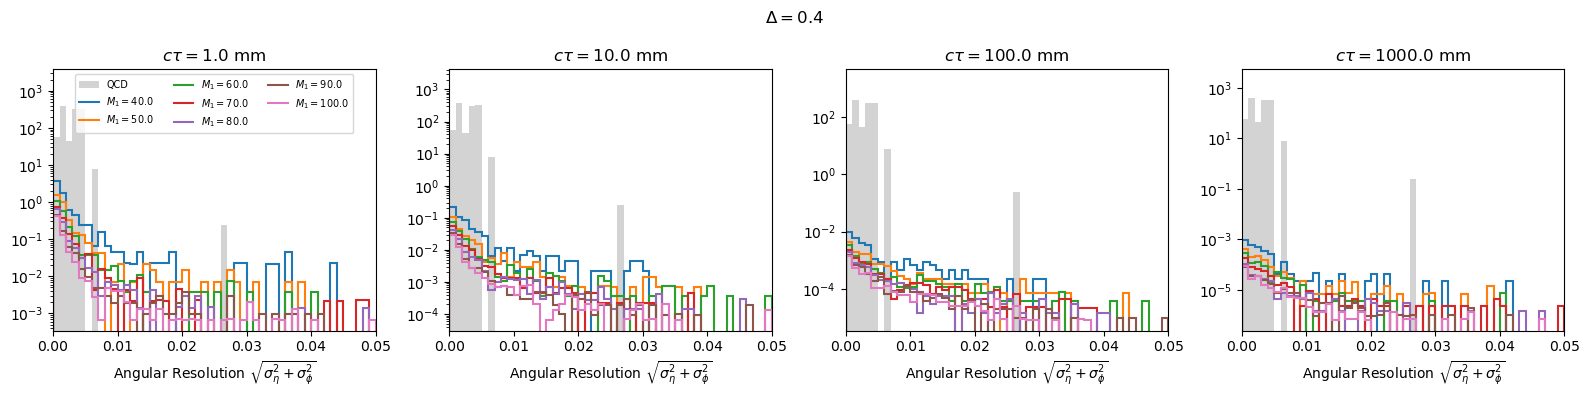

In [24]:
# electron 1 angular resolution
plot("sel_e1_angRes",[0,0.05],logy=True,rebin=1j)

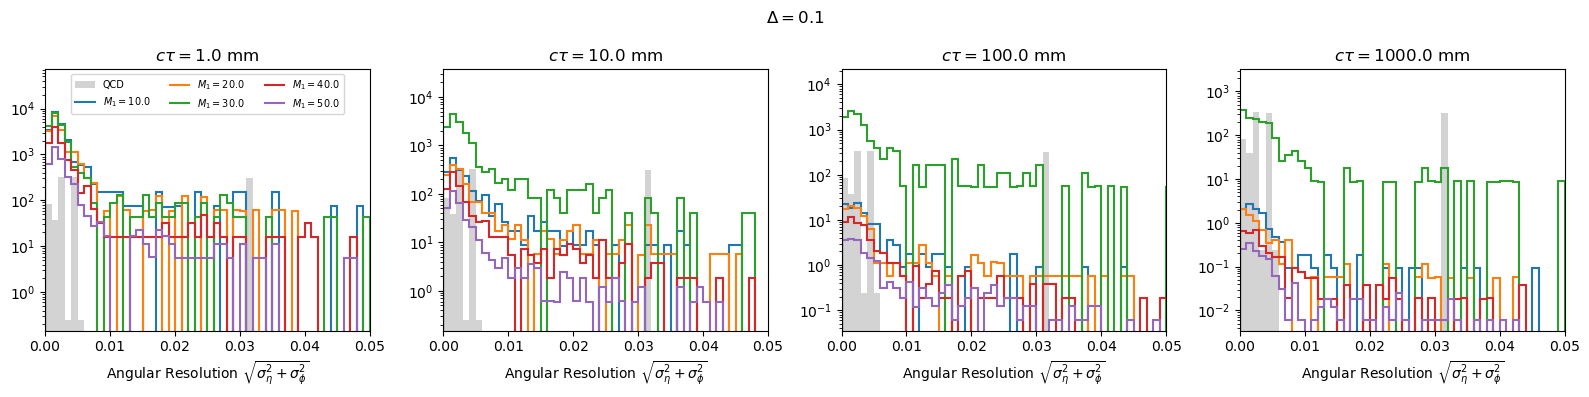

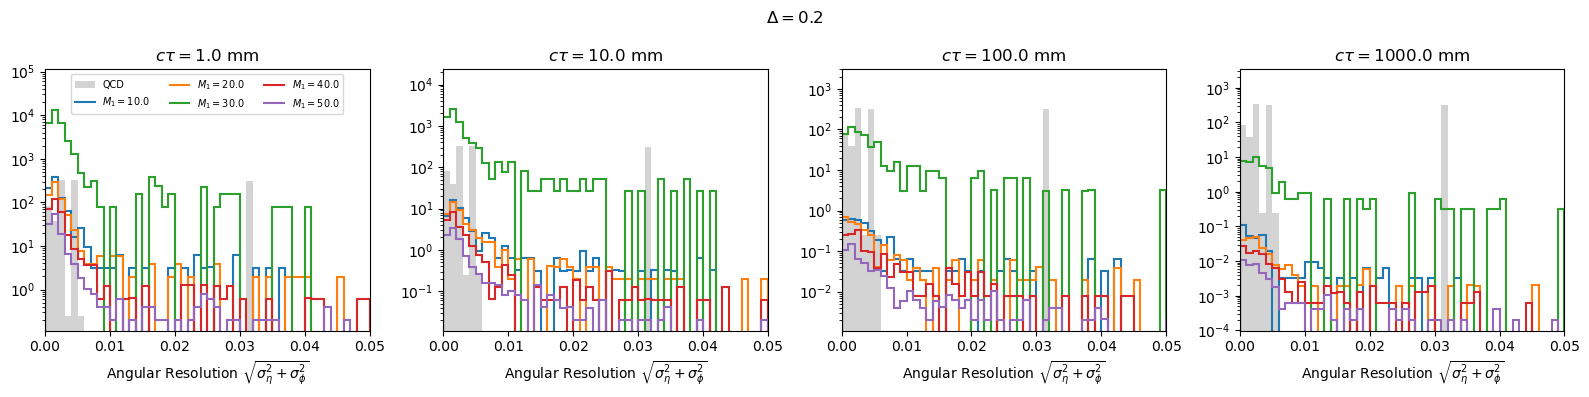

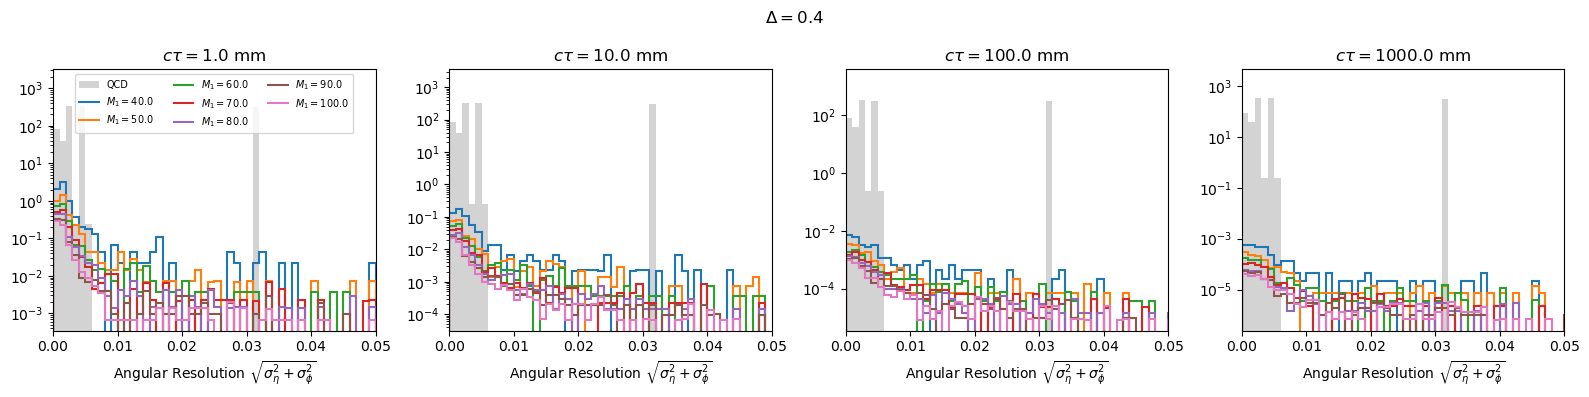

In [25]:
# electron 2 angular resolution
plot("sel_e2_angRes",[0,0.05],logy=True,rebin=1j)

# Displacement

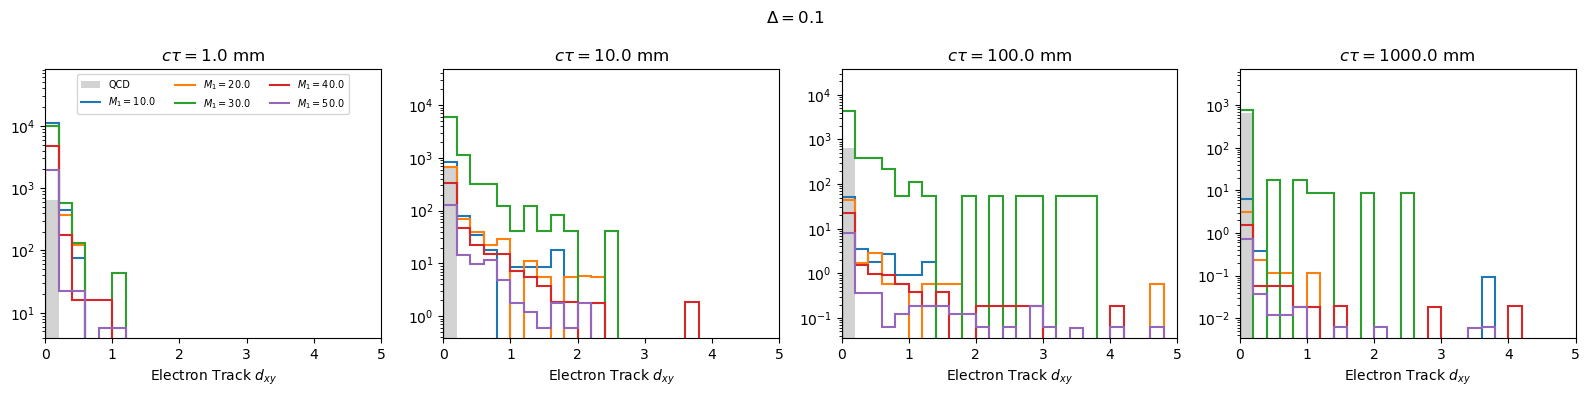

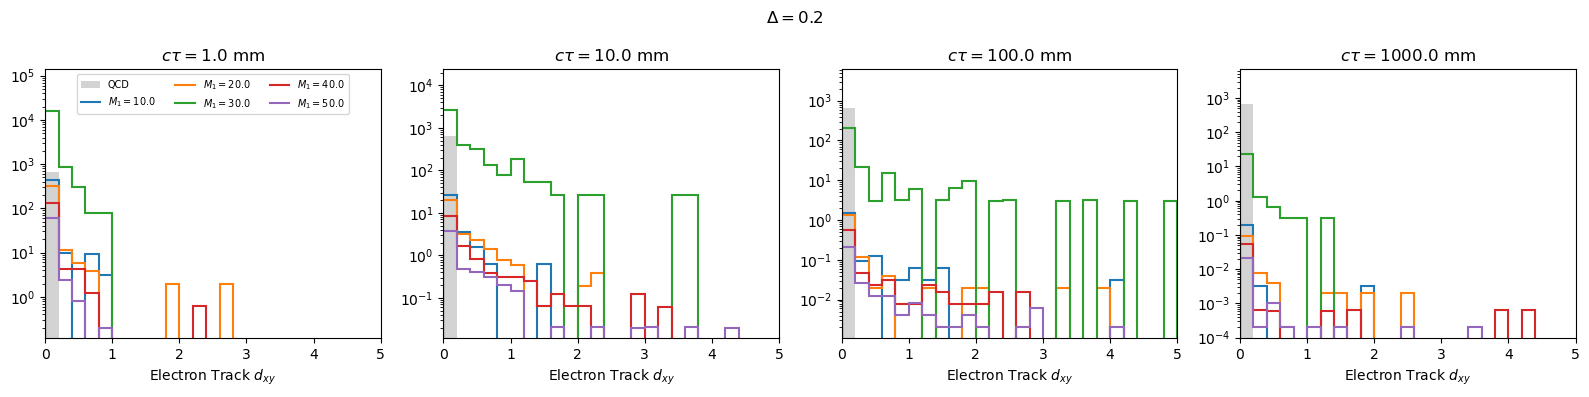

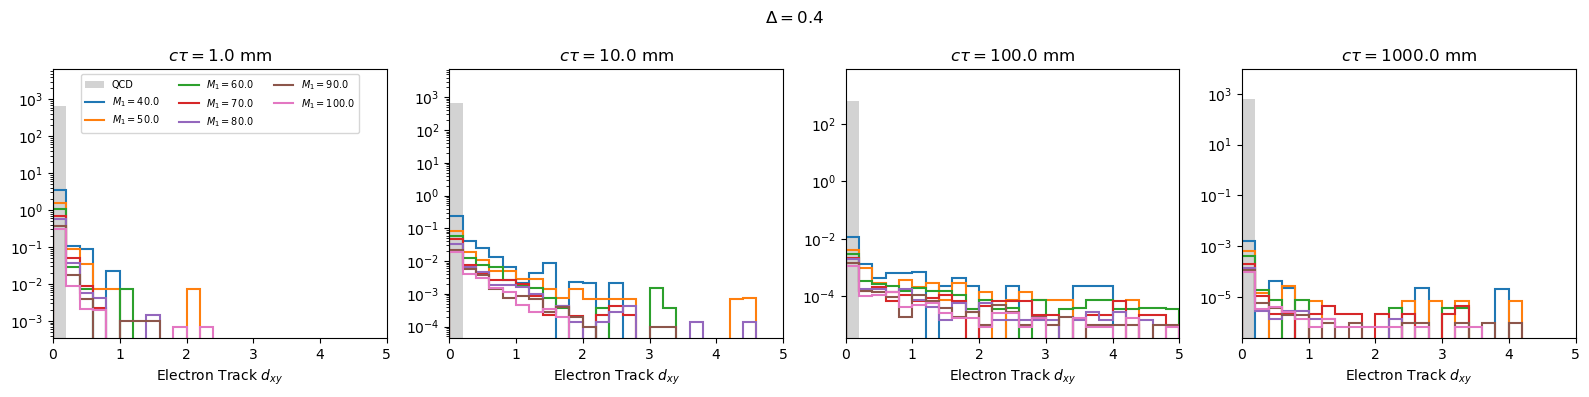

In [26]:
# electron 1 dxy
plot("sel_e1_dxy",[0,5],logy=True,rebin=2j)

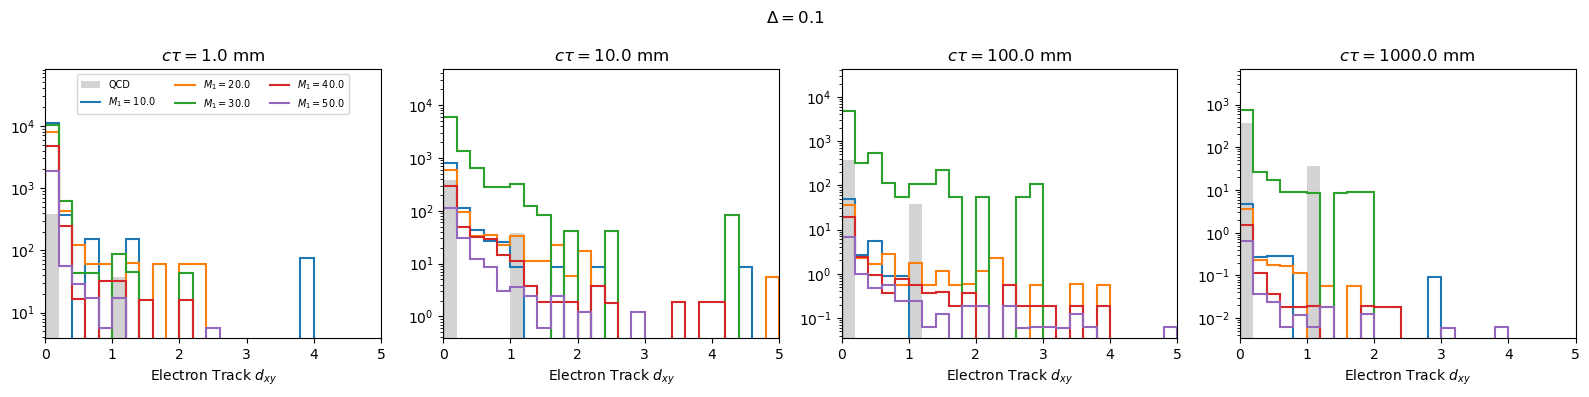

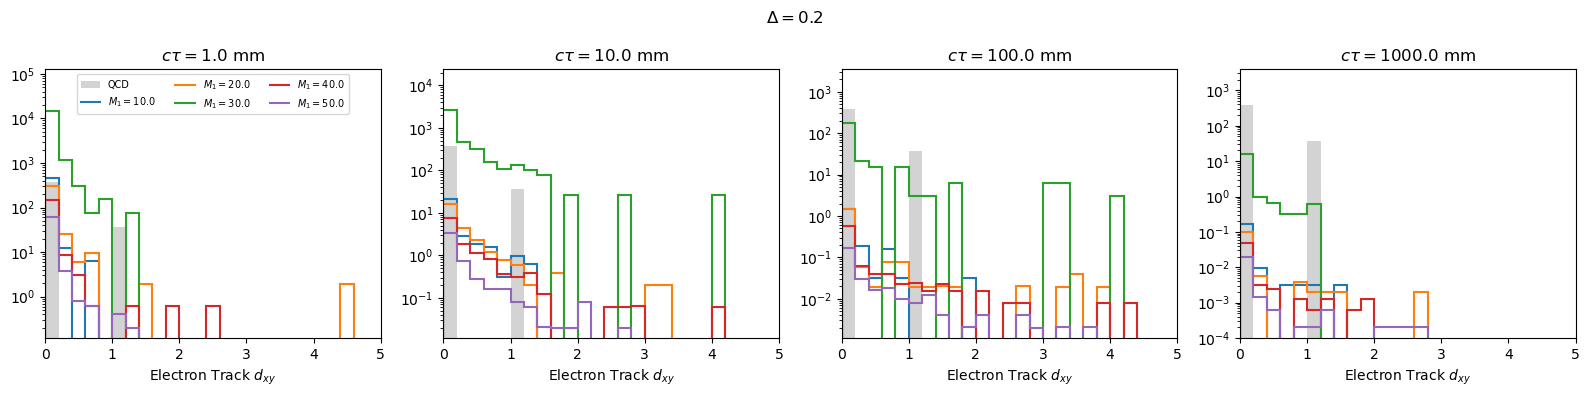

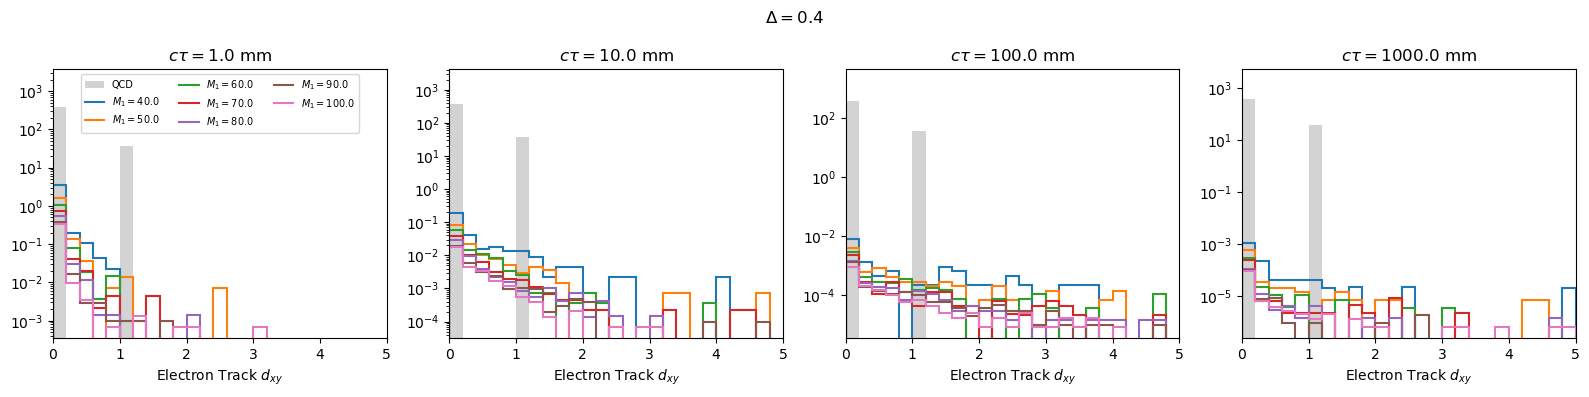

In [27]:
# electron 2 dxy
plot("sel_e2_dxy",[0,5],logy=True,rebin=2j)

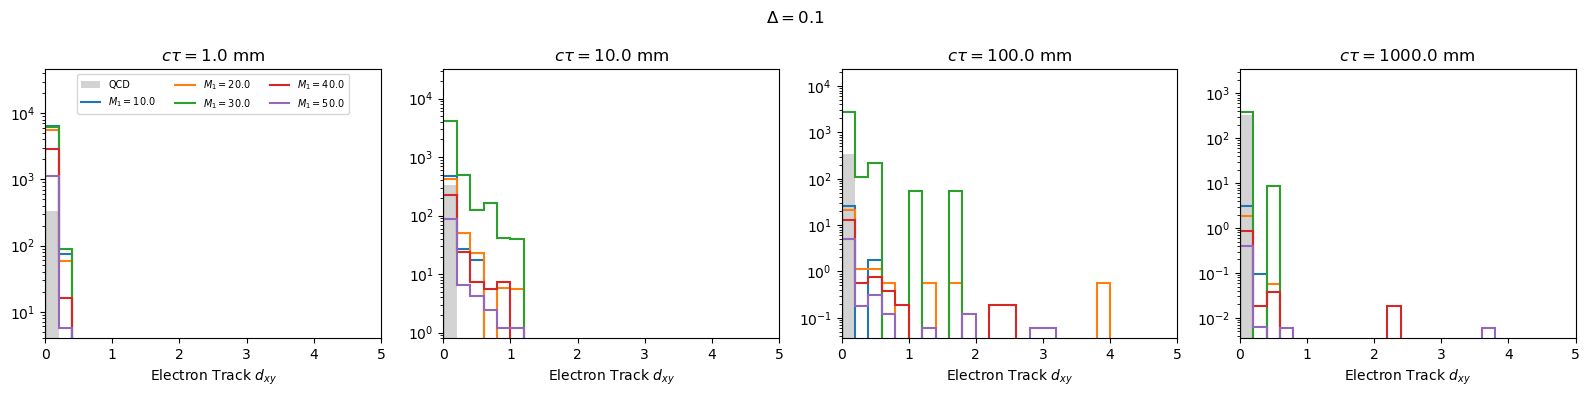

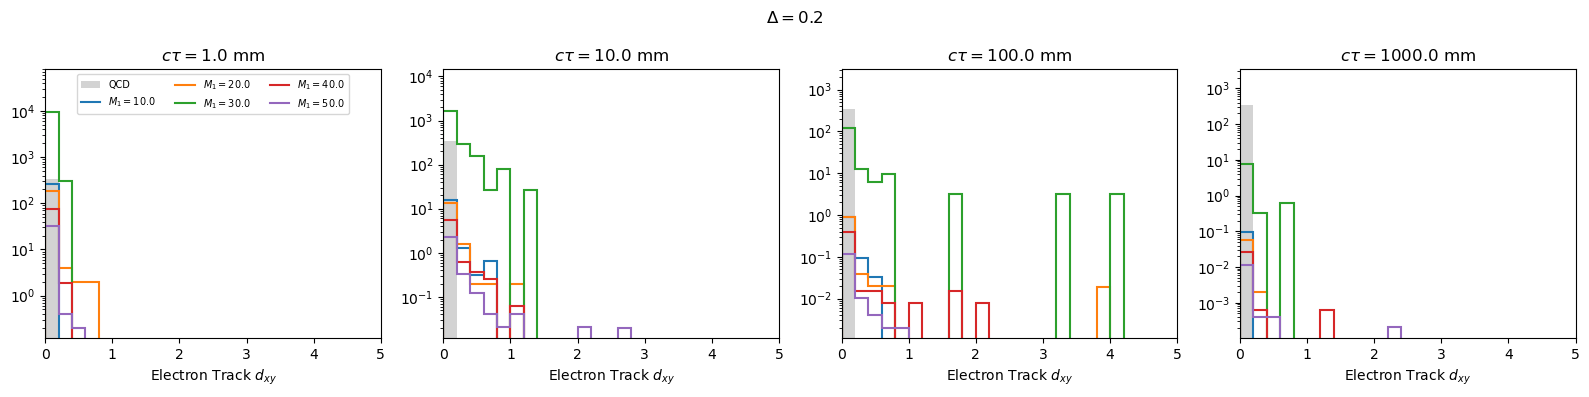

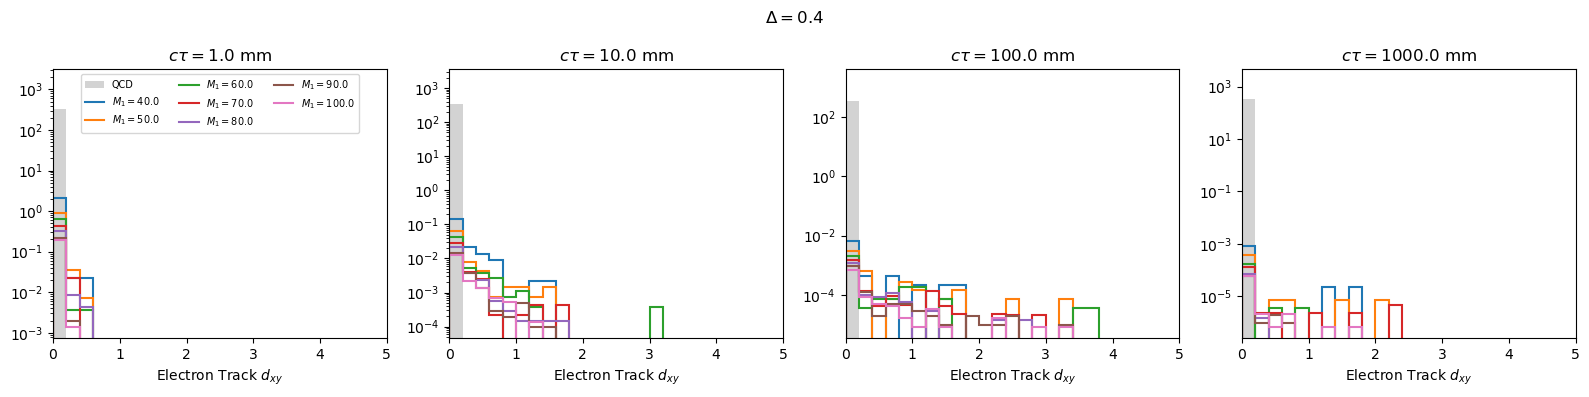

In [28]:
# vertex min(dxy1,dxy2)
plot("sel_vtx_minDxy",[0,5],logy=True,rebin=2j)

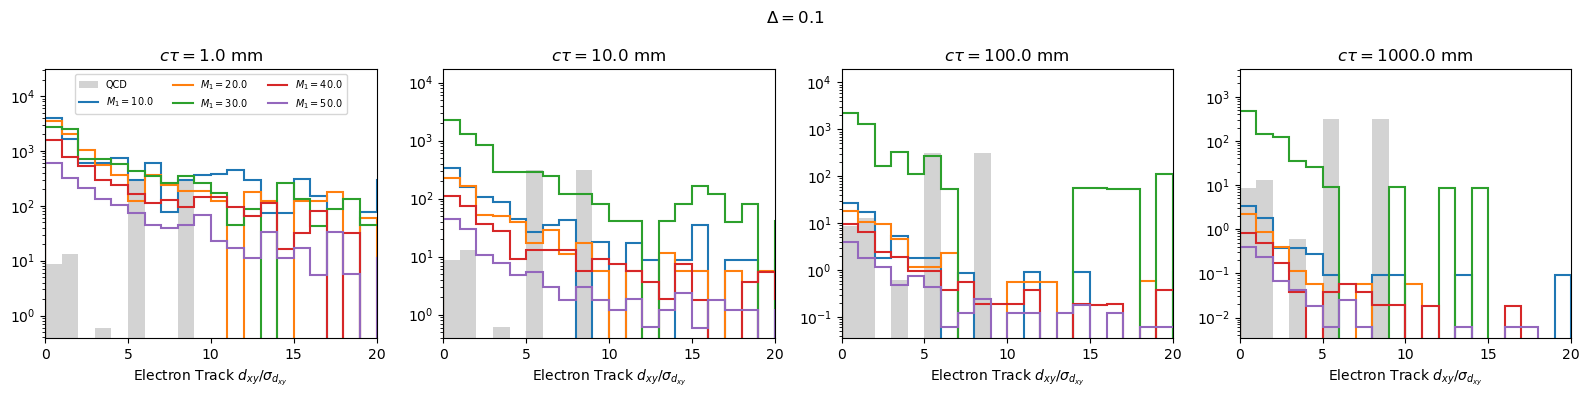

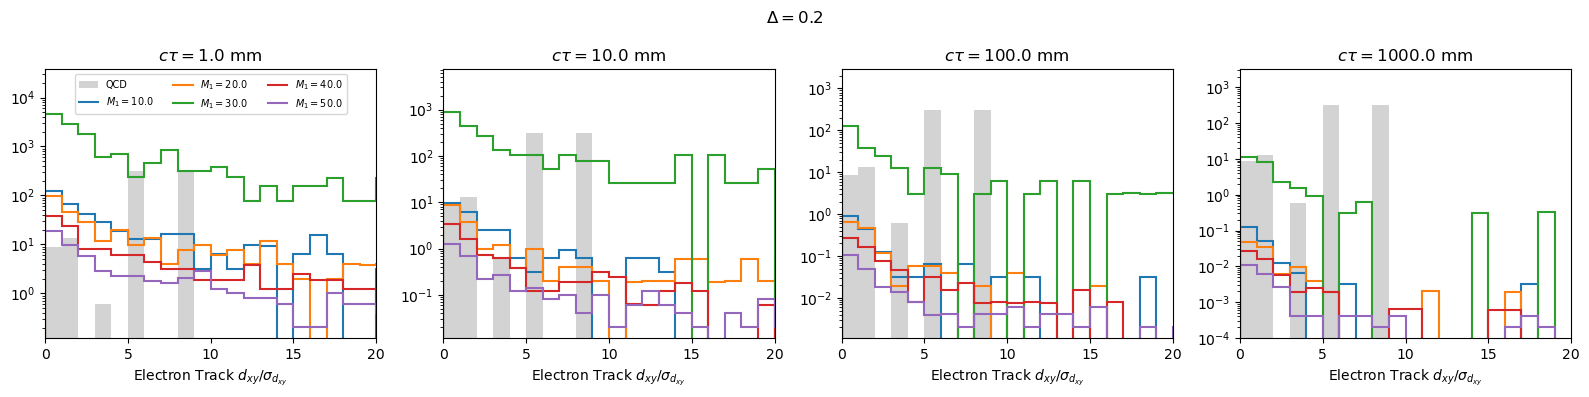

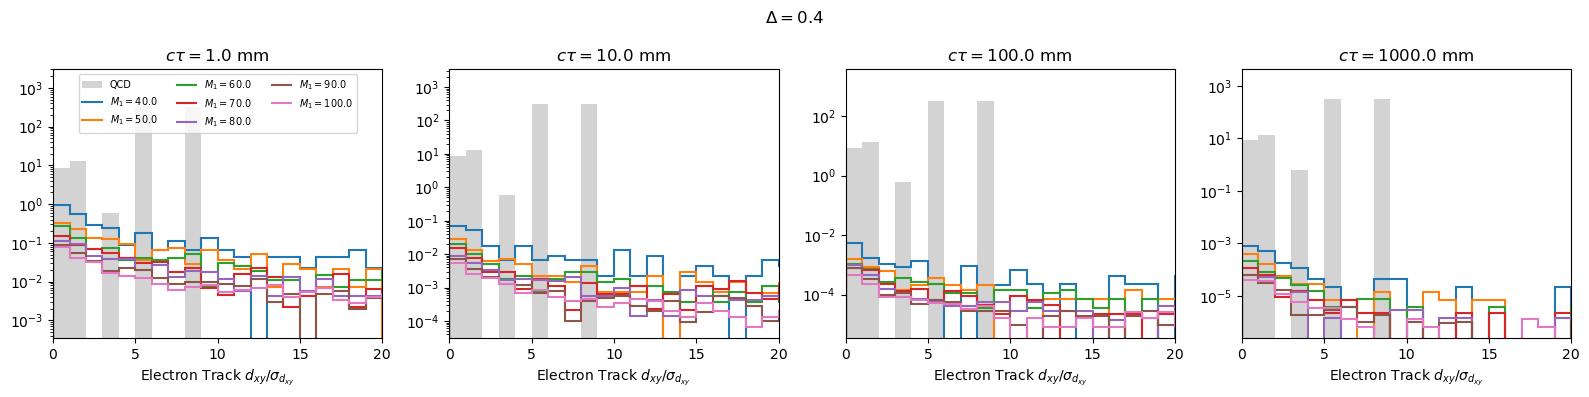

In [29]:
# electron 1 dxy significance
plot("sel_e1_dxySignif",[0,20],logy=True,rebin=1j)

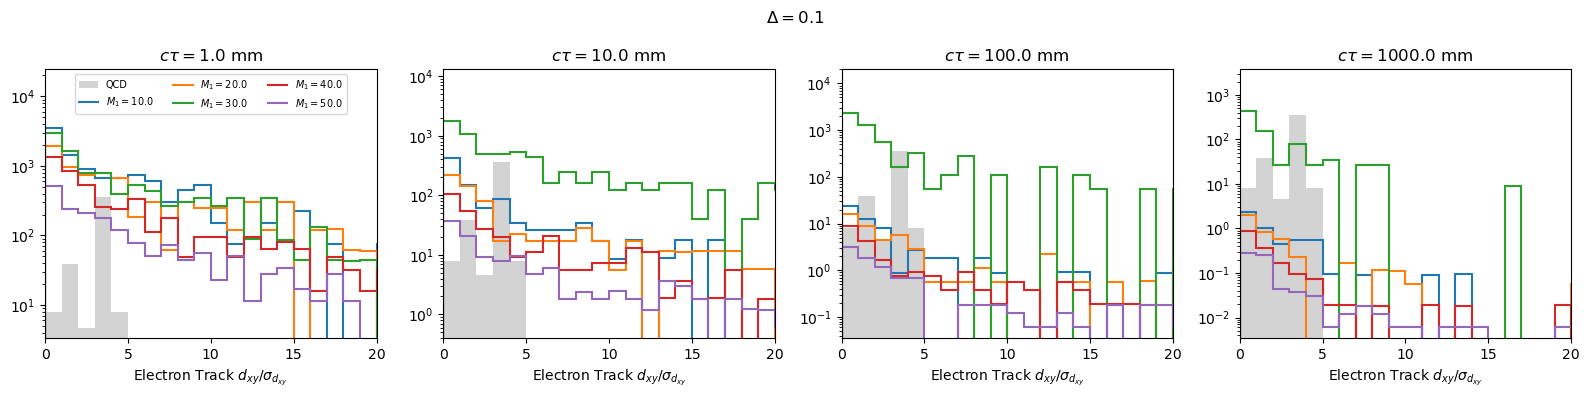

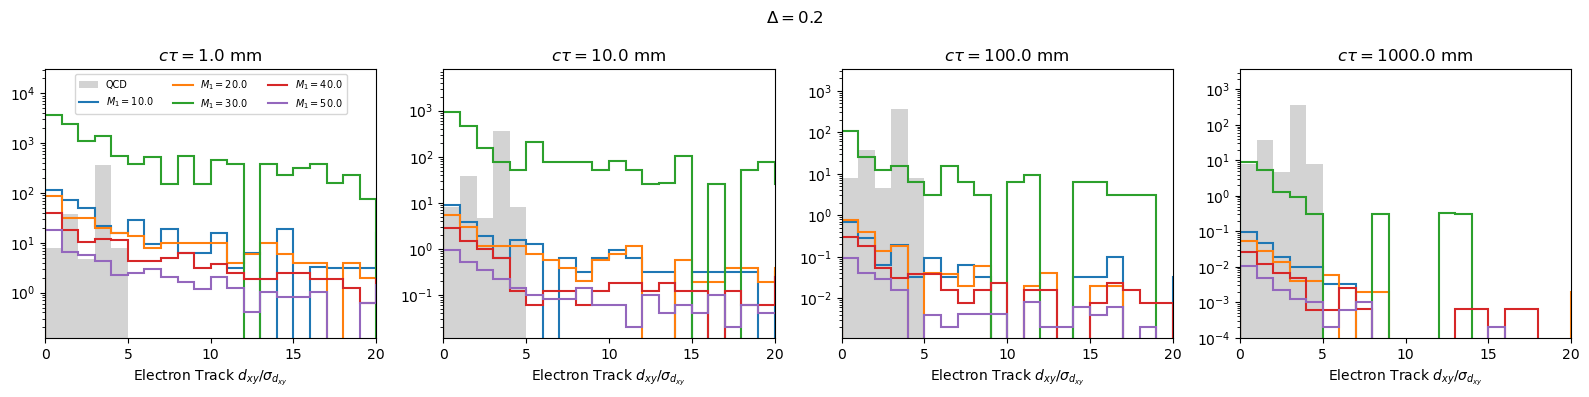

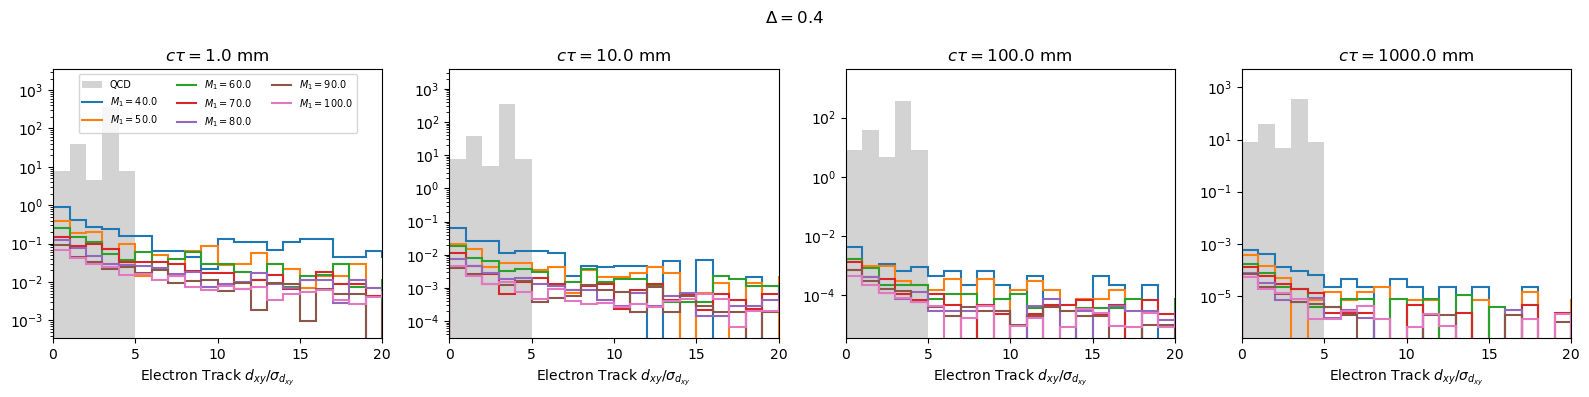

In [30]:
# electron 2 dxy significance
plot("sel_e2_dxySignif",[0,20],logy=True,rebin=1j)

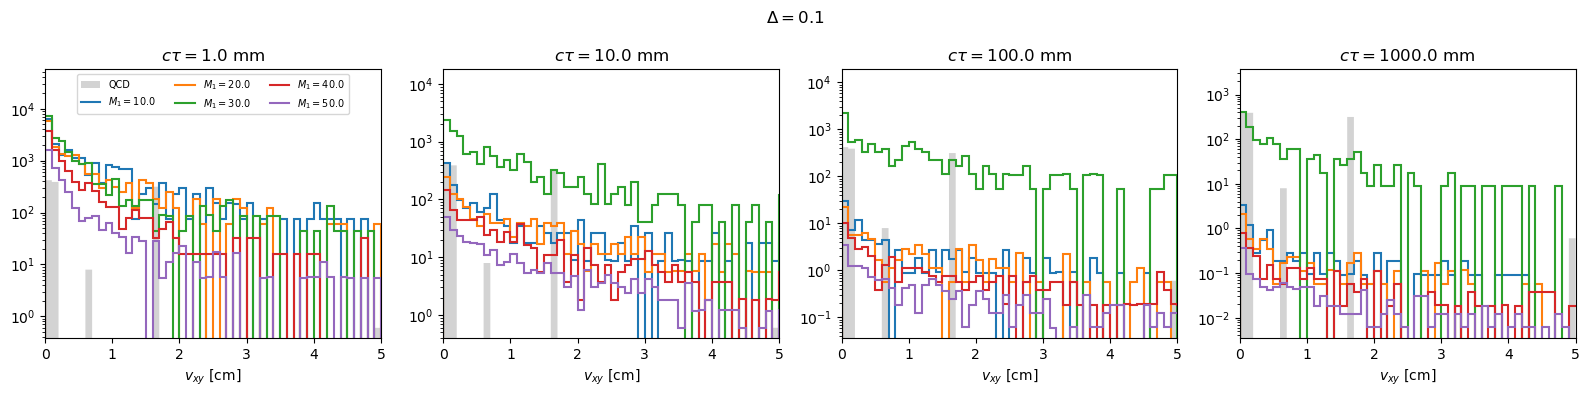

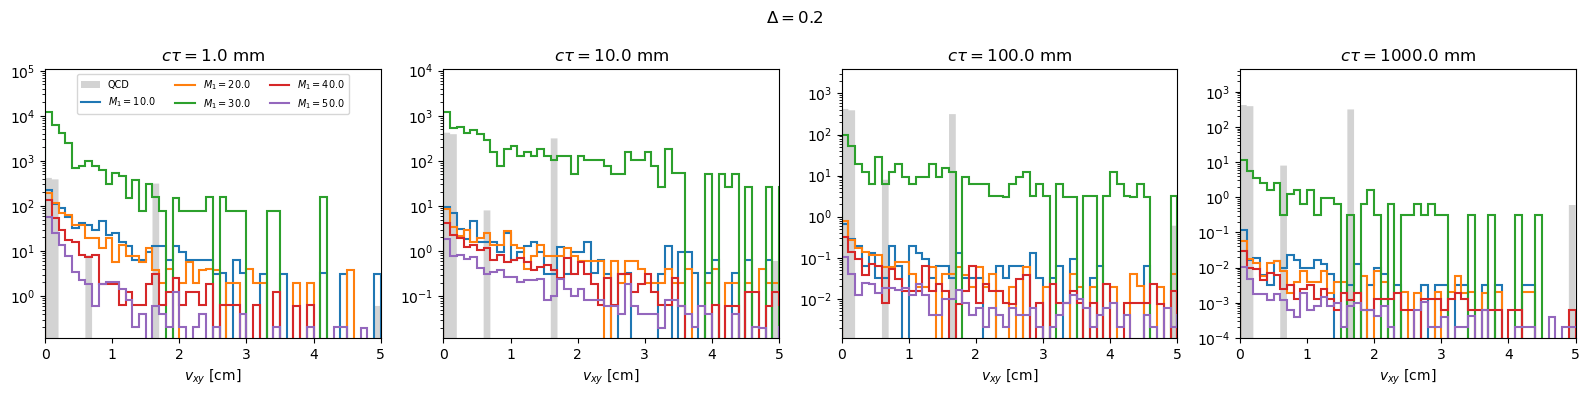

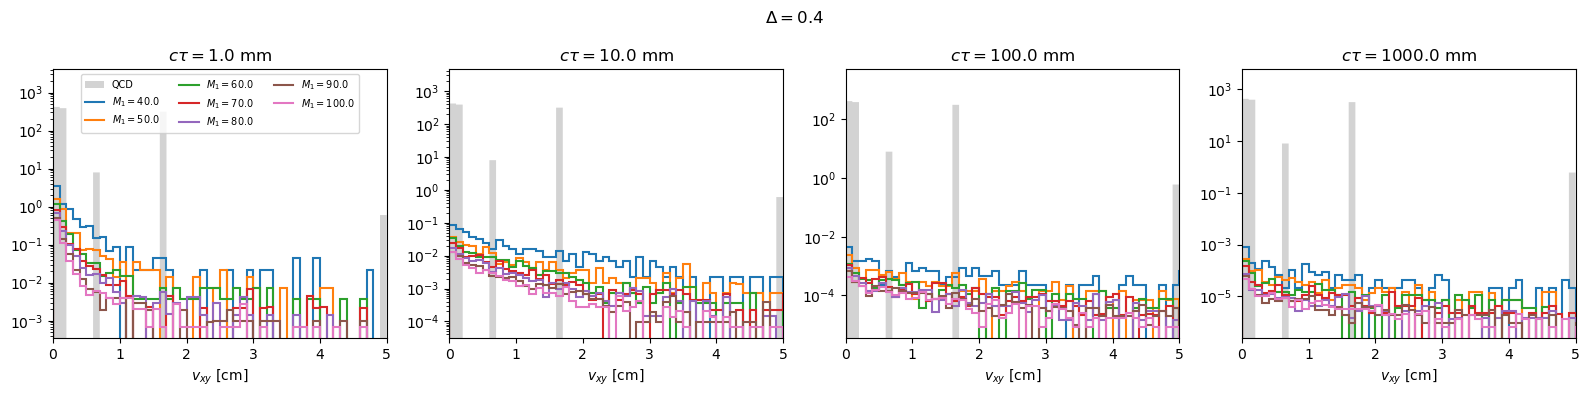

In [31]:
# vertex vxy
plot("sel_vtx_vxy",[0,5],logy=True,rebin=4j)

# Vertex dR

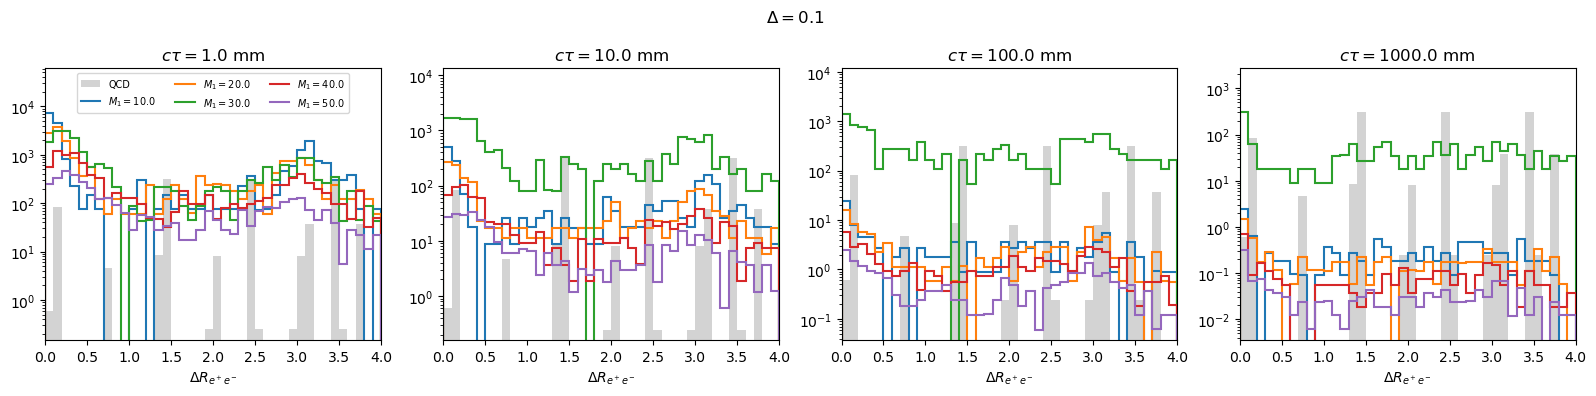

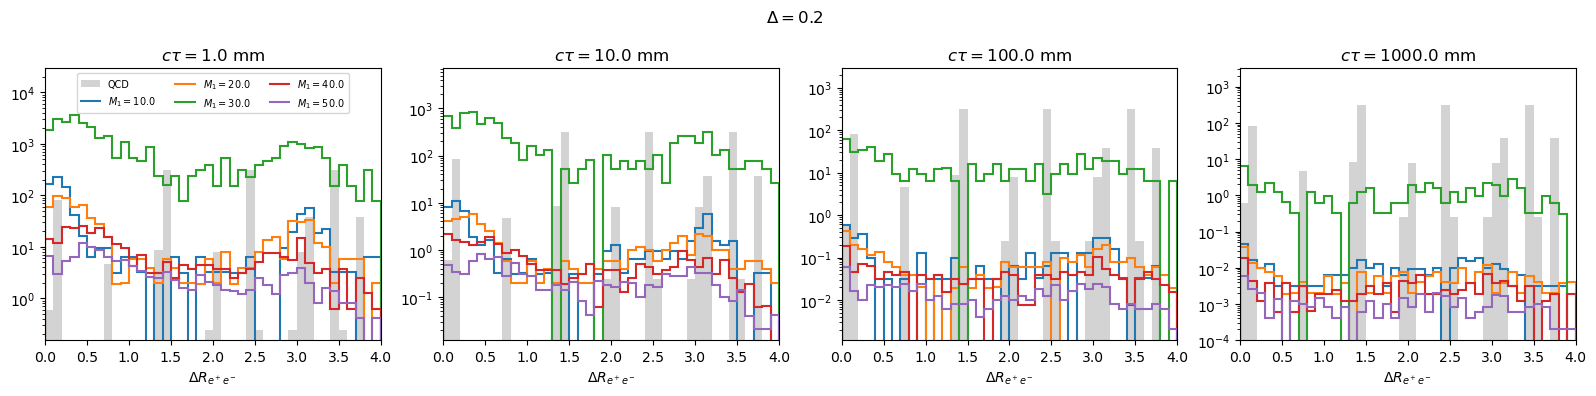

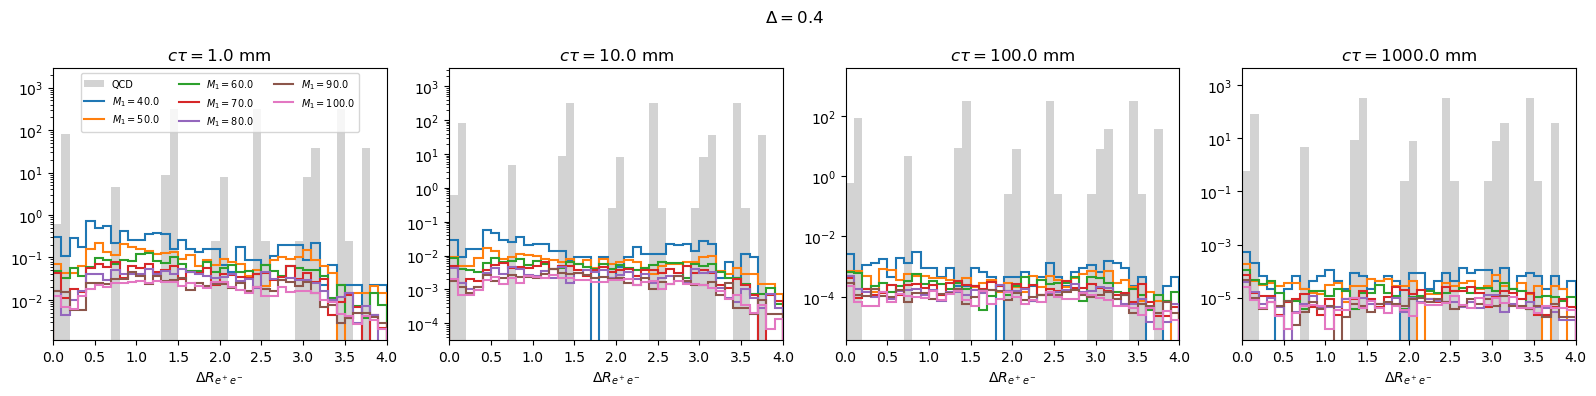

In [33]:
# vertex dR
plot("sel_vtx_dR",[0,4],logy=True,rebin=2j)

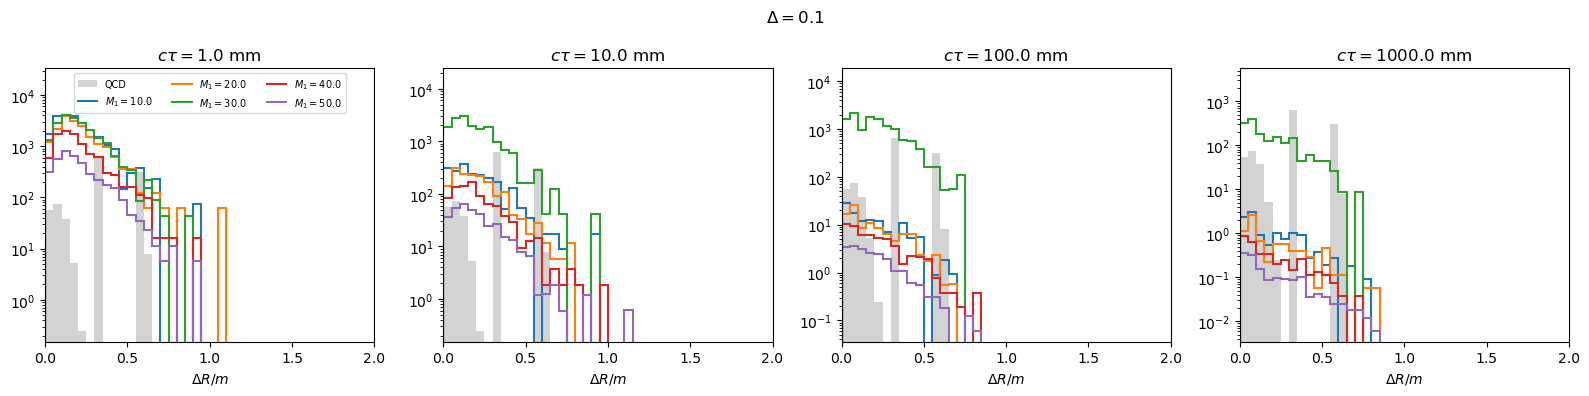

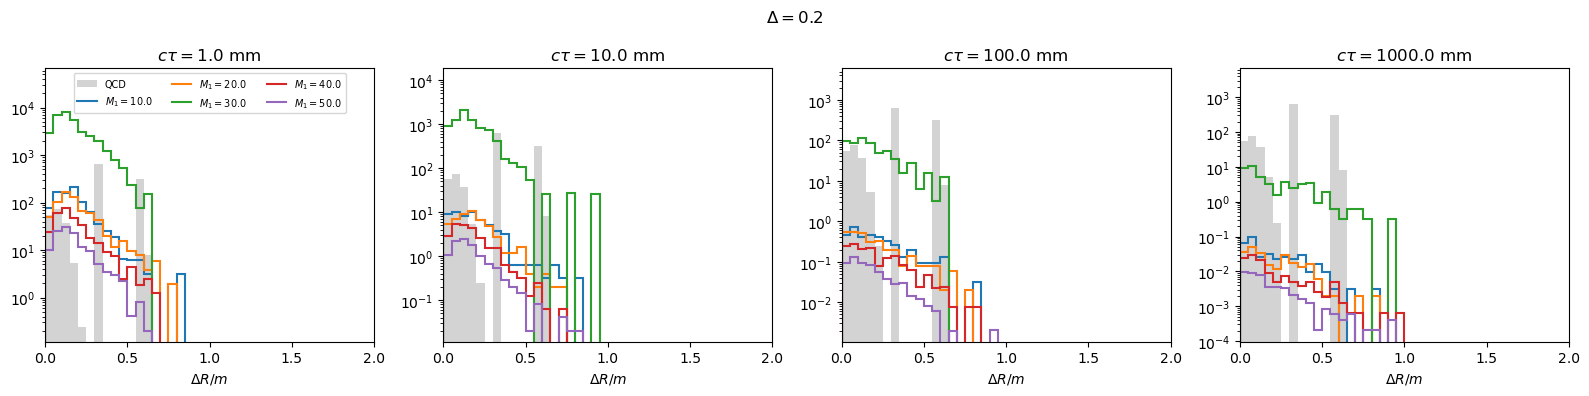

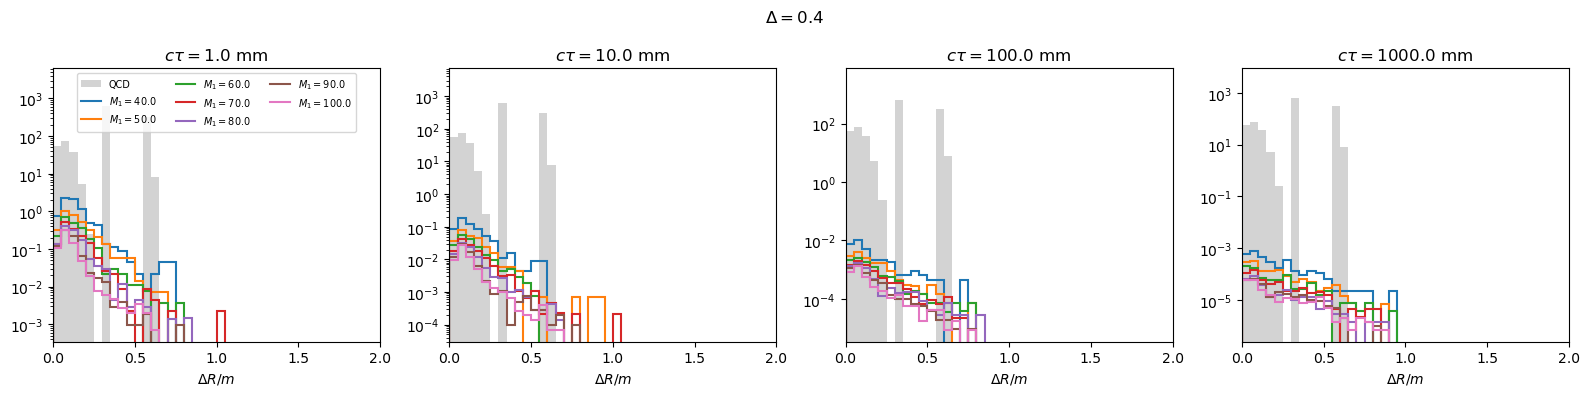

In [35]:
# vertex dR/m
plot("sel_vtx_dR_over_m",[0,2],logy=True,rebin=1j)

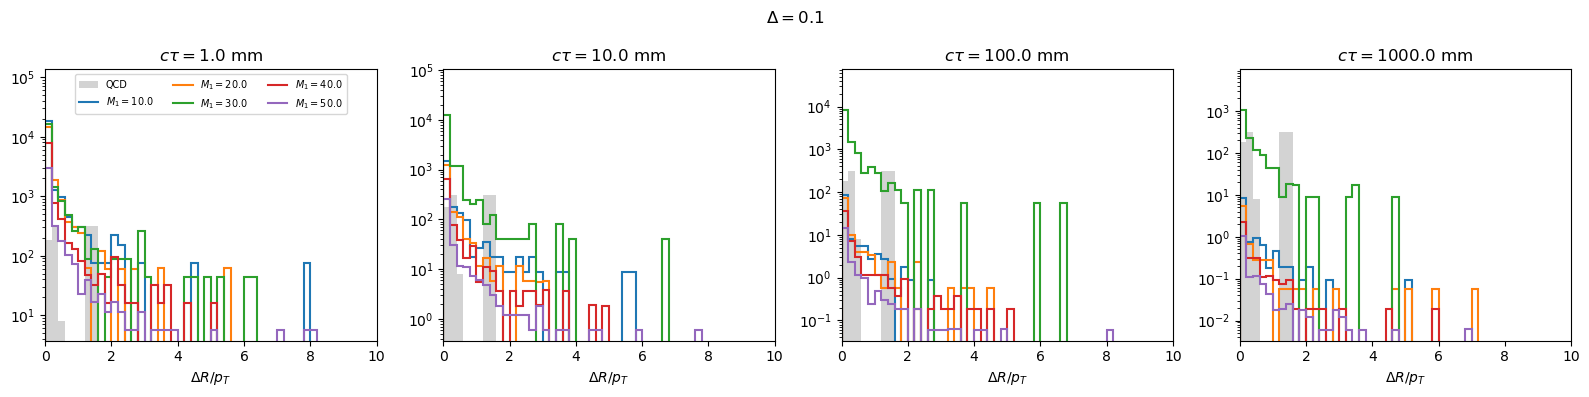

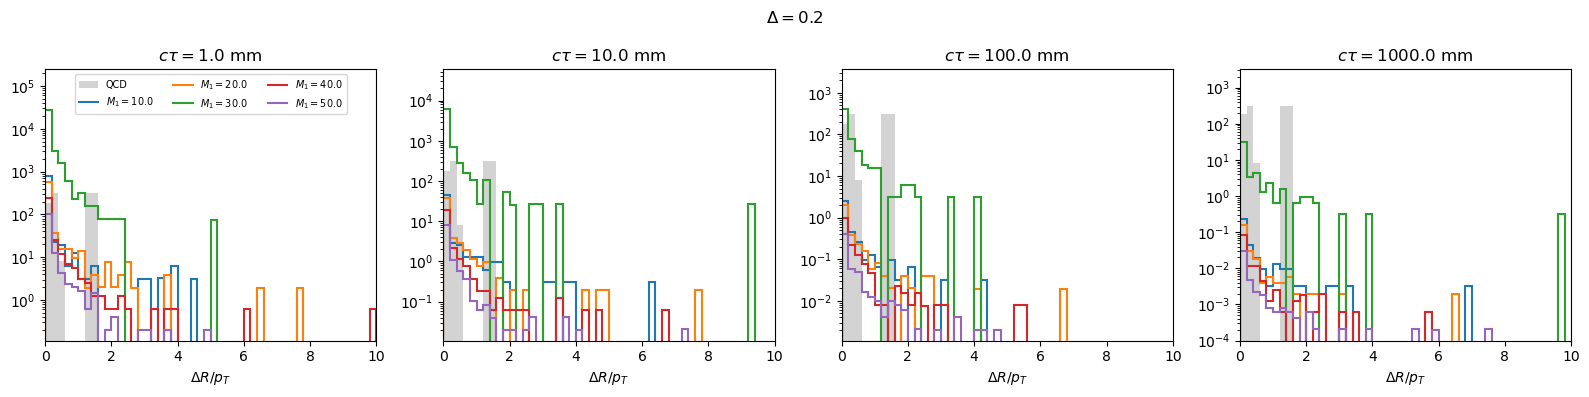

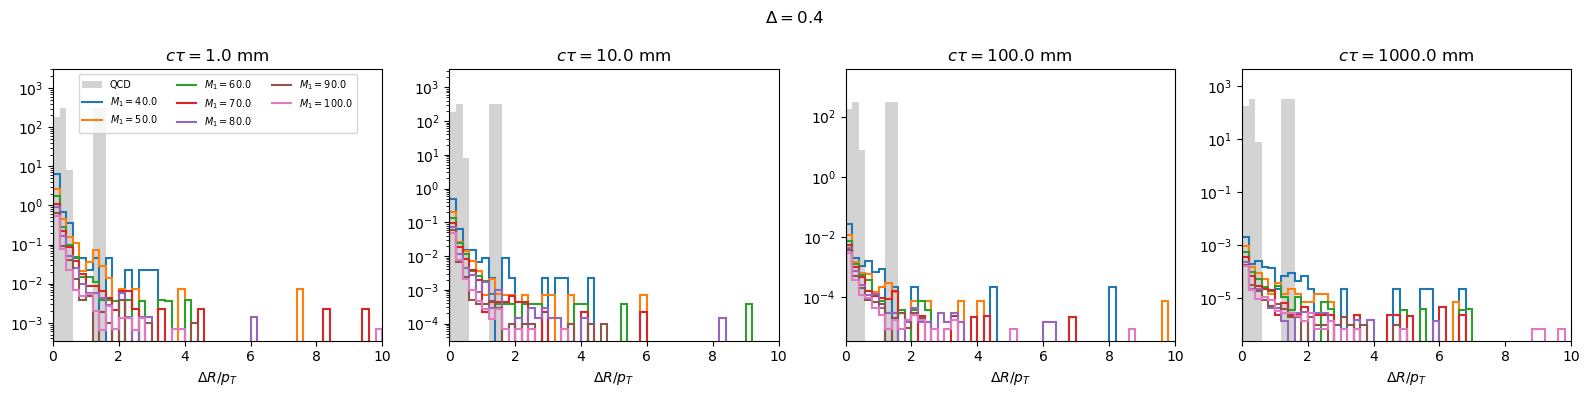

In [37]:
# vertex dR/pT
plot("sel_vtx_dR_over_pT",[0,10],logy=True,rebin=2j)

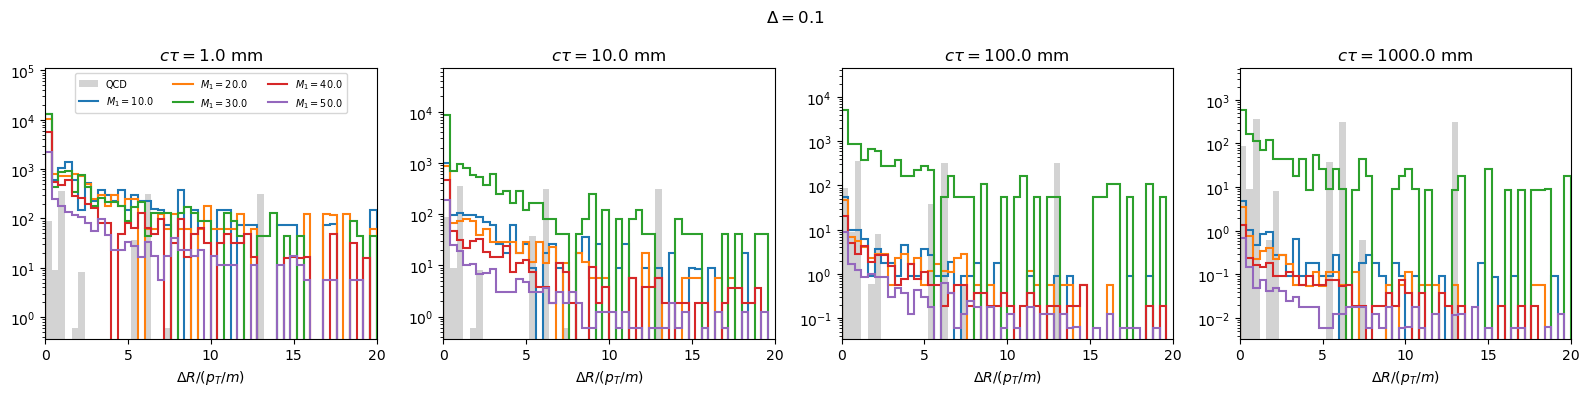

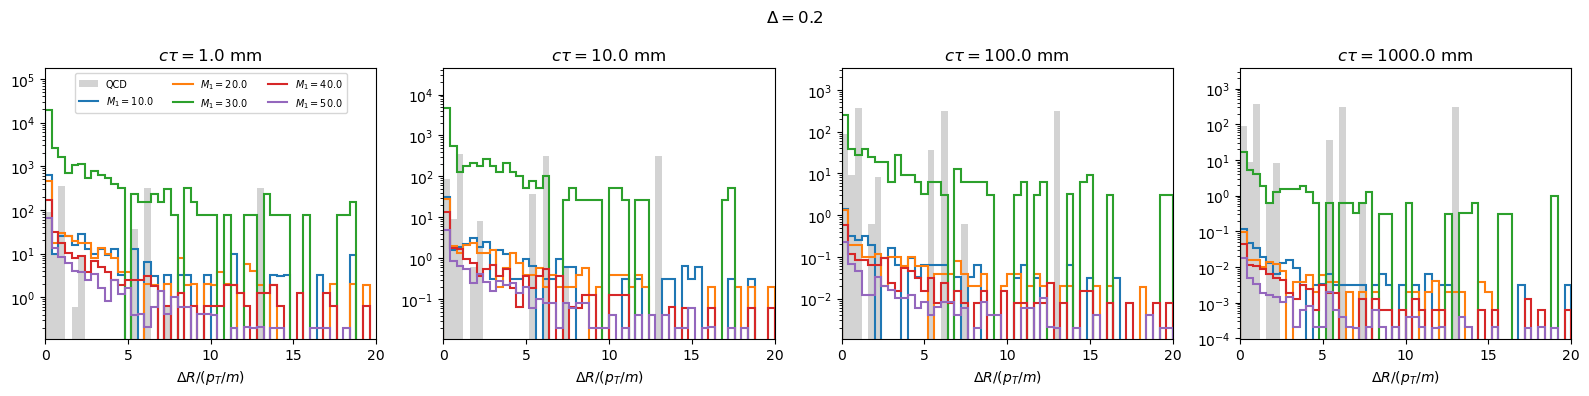

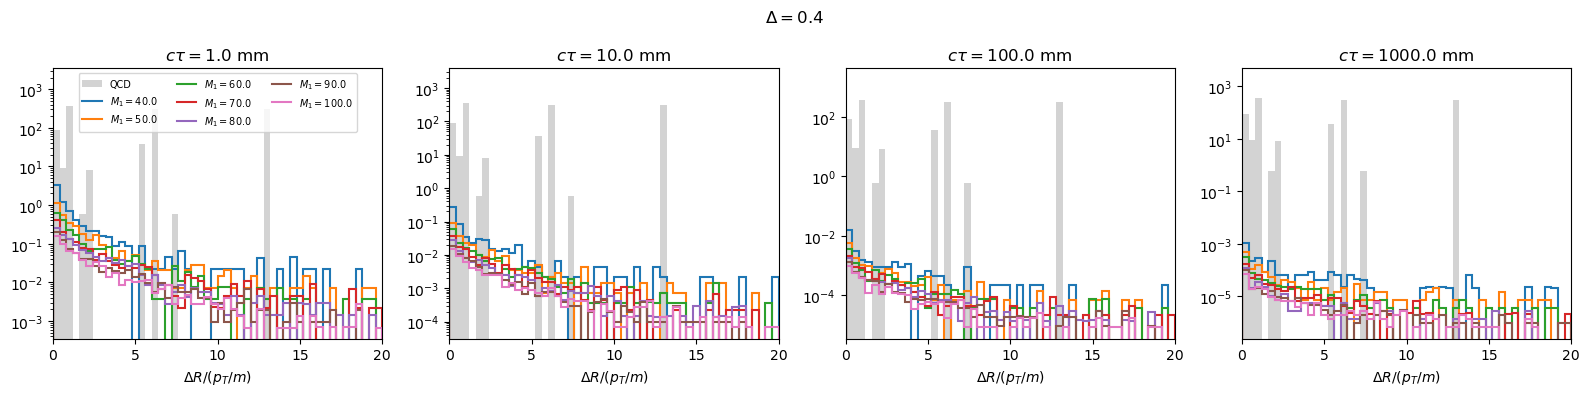

In [38]:
# vertex dR/(pT/m)
plot("sel_vtx_dR_over_pTm",[0,20],logy=True,rebin=2j)

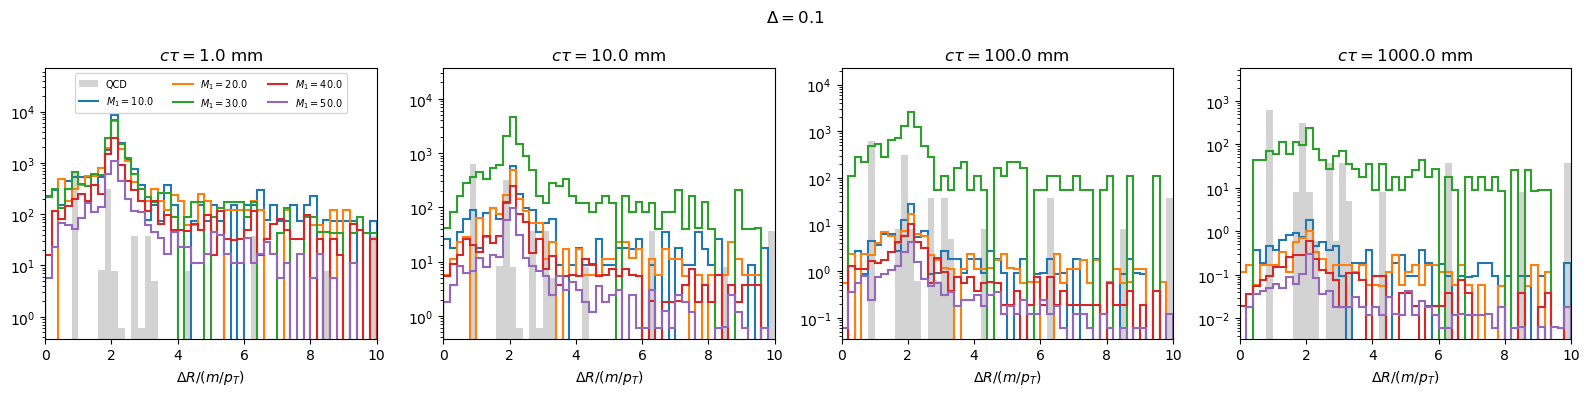

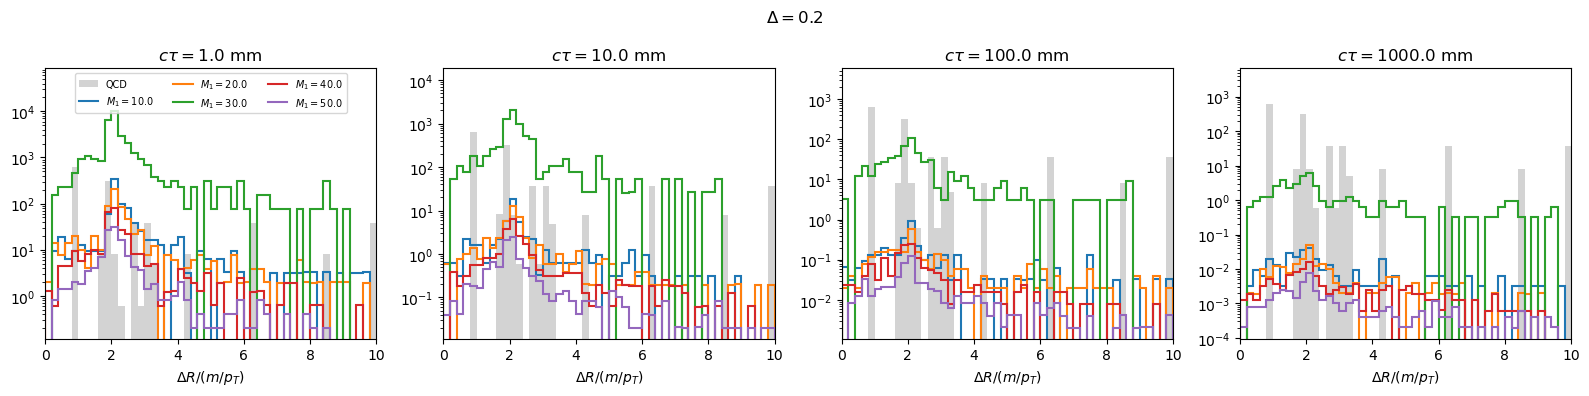

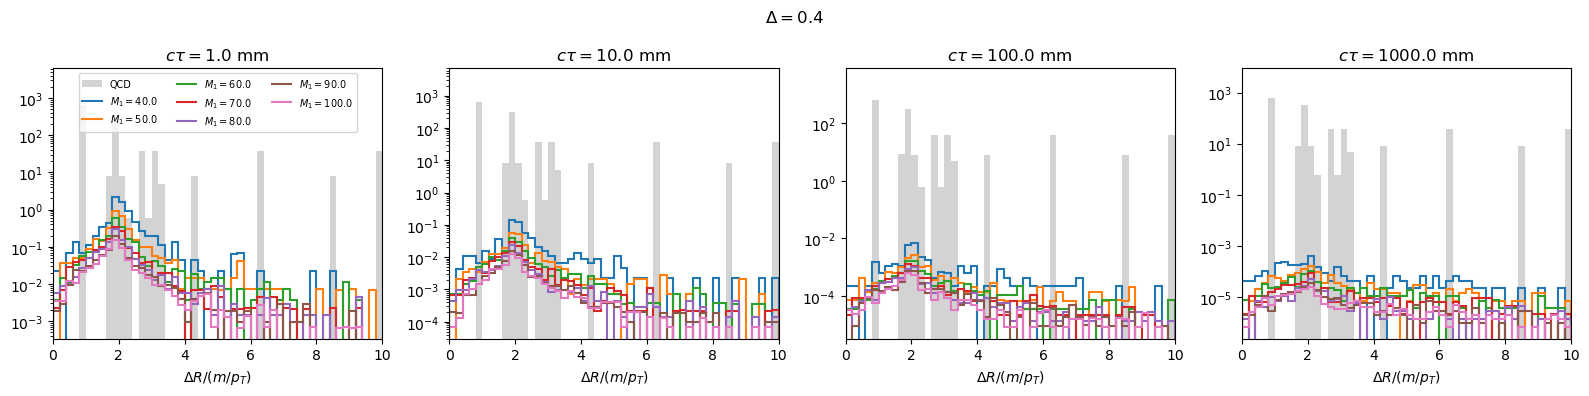

In [40]:
# vertex dR/(m/pT)
plot("sel_vtx_dR_over_mpT",[0,10],logy=True,rebin=2j)

# Vertex-MET dPhi

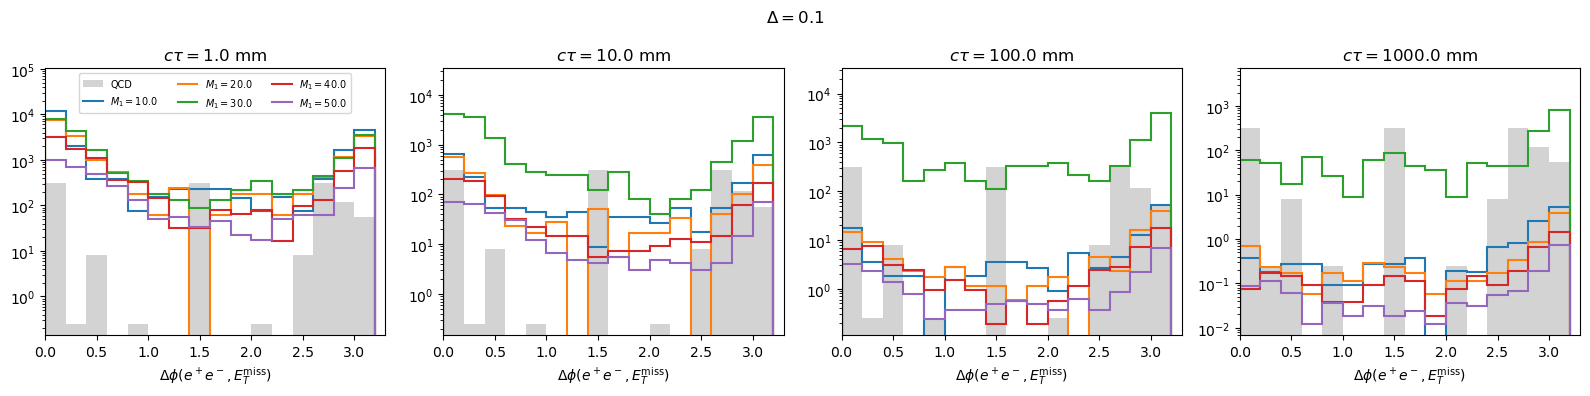

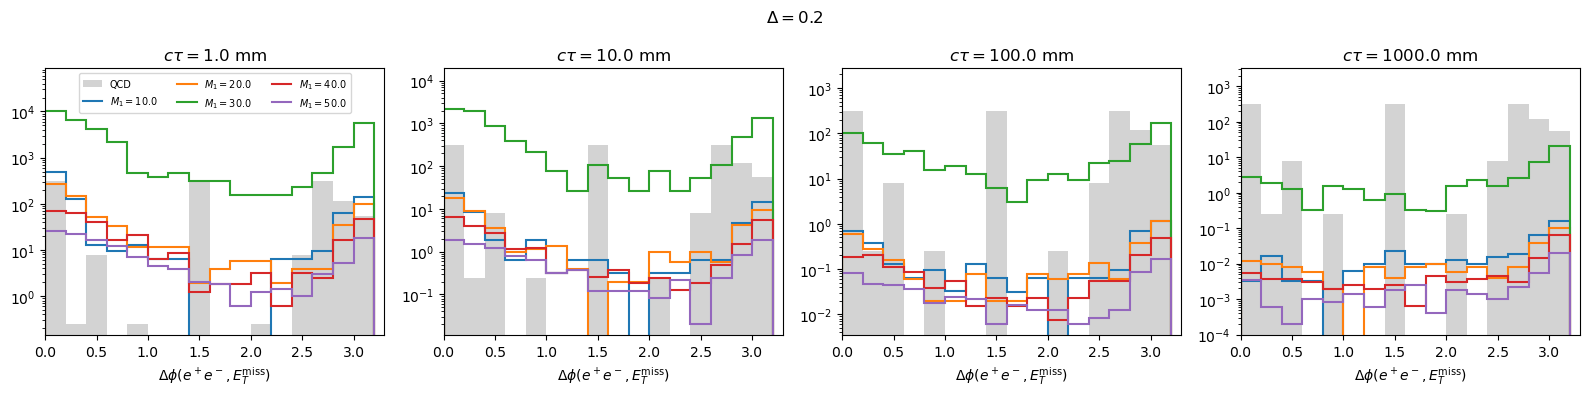

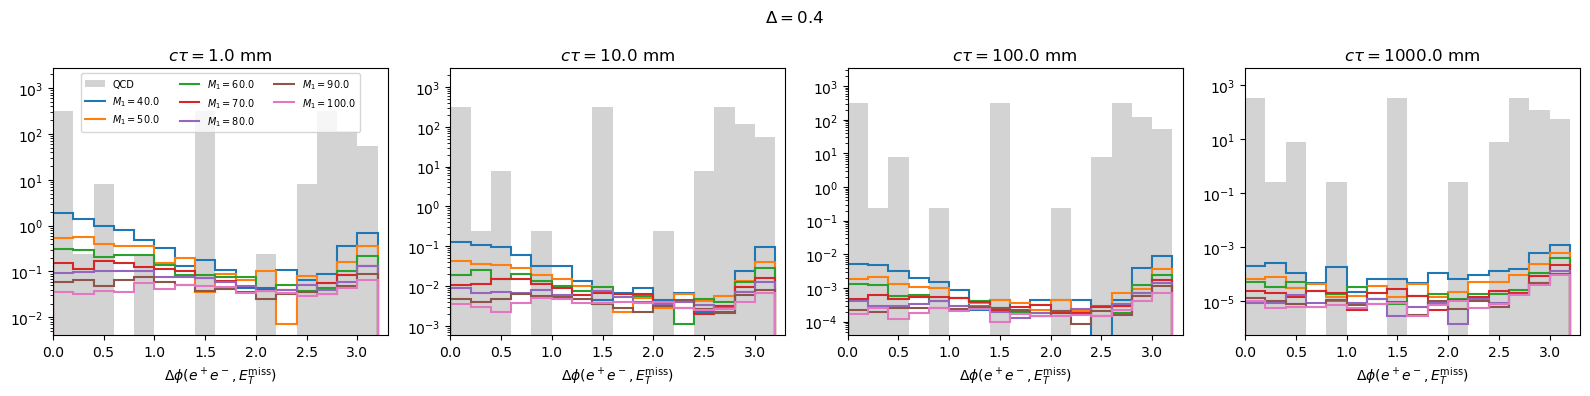

In [43]:
# vertex MET dPhi
plot("vtx_met_dPhi",[0,3.3],logy=True,rebin=2j,xlabel=r"$\Delta \phi(e^+e^-,E_T^\mathrm{miss})$")

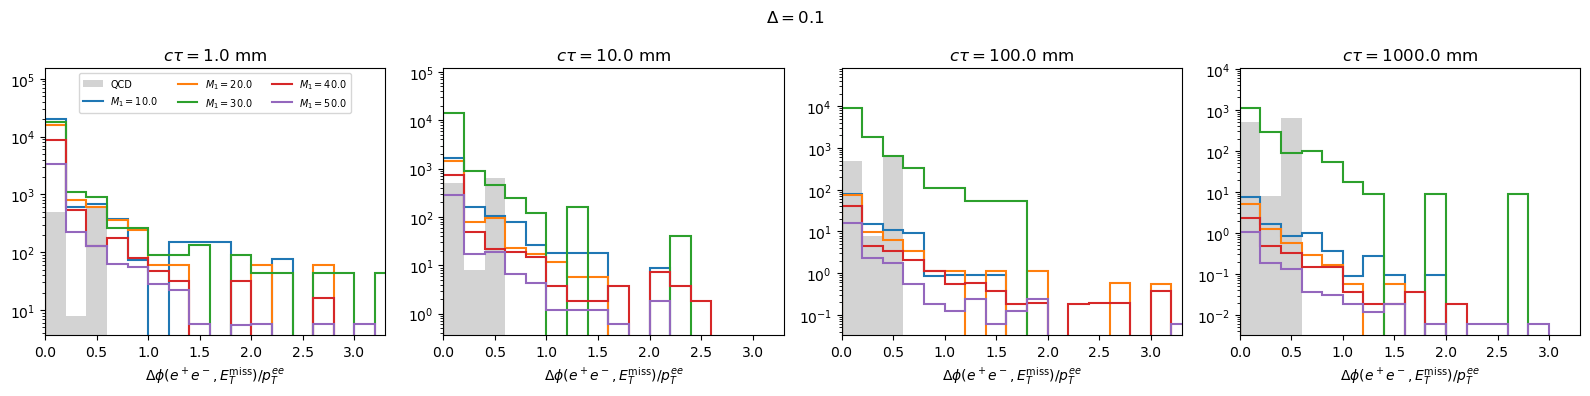

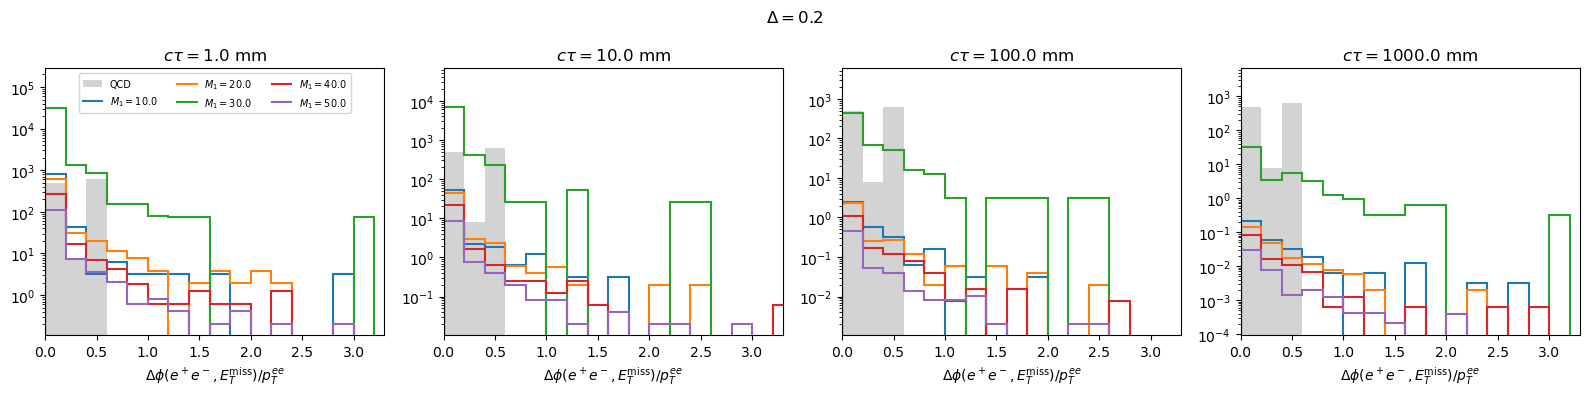

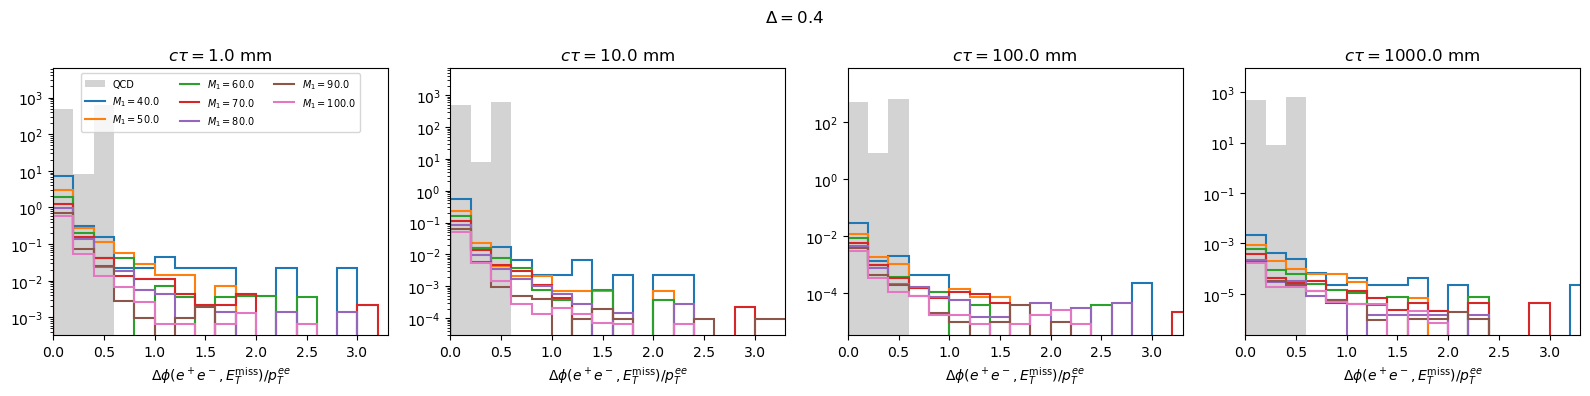

In [44]:
# vertex MET dPhi / pT
plot("sel_vtx_METdPhi_over_pT",[0,3.3],logy=True,rebin=2j,xlabel=r"$\Delta \phi(e^+e^-,E_T^\mathrm{miss})/p_T^{ee}$")

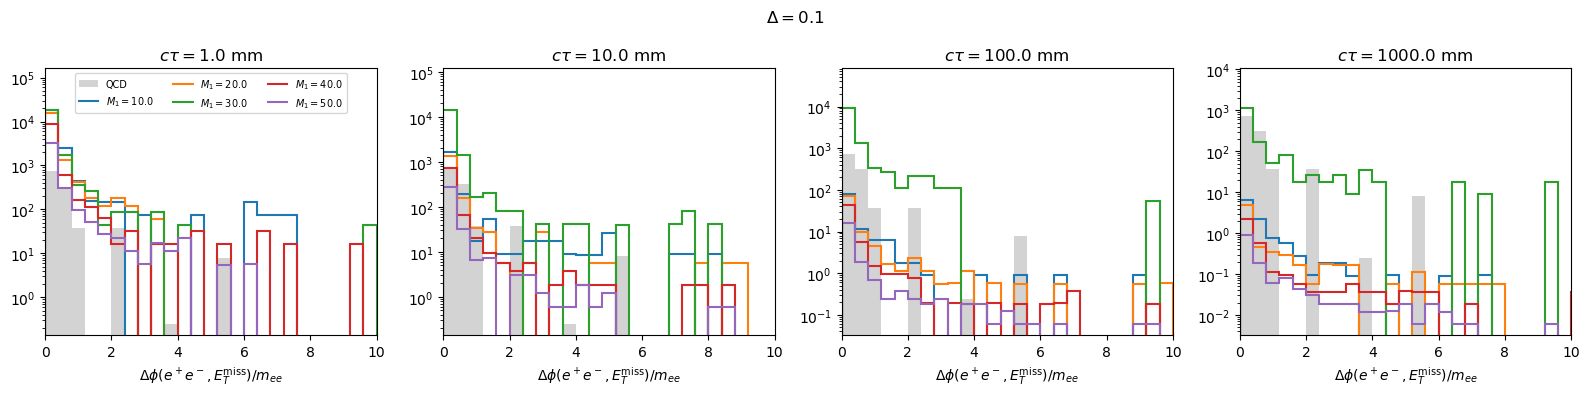

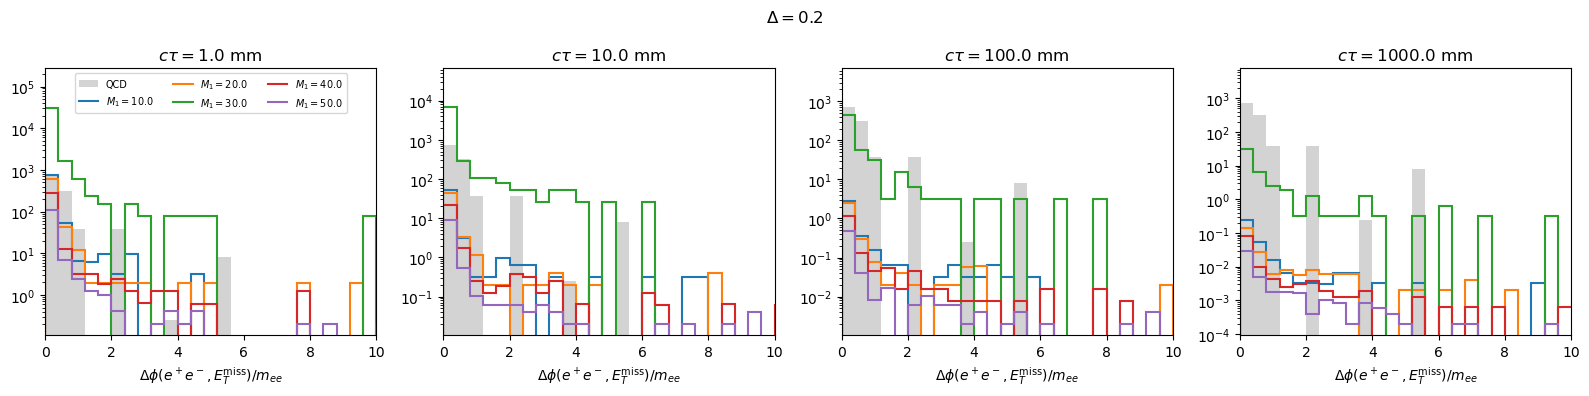

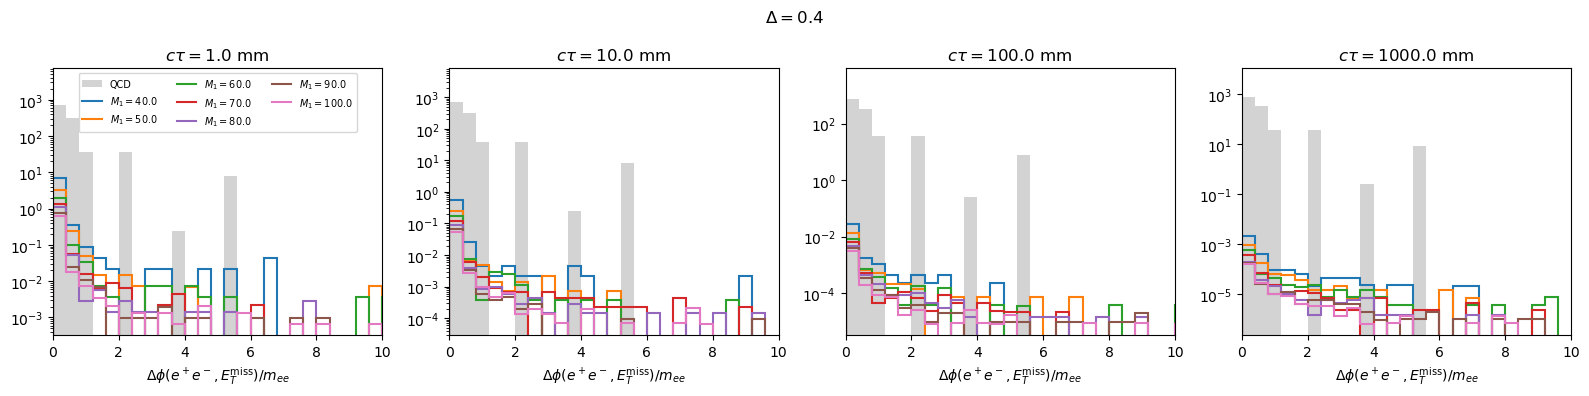

In [46]:
# vertex MET dPhi / m
plot("sel_vtx_METdPhi_over_m",[0,10],logy=True,rebin=2j,xlabel=r"$\Delta \phi(e^+e^-,E_T^\mathrm{miss})/m_{ee}$")

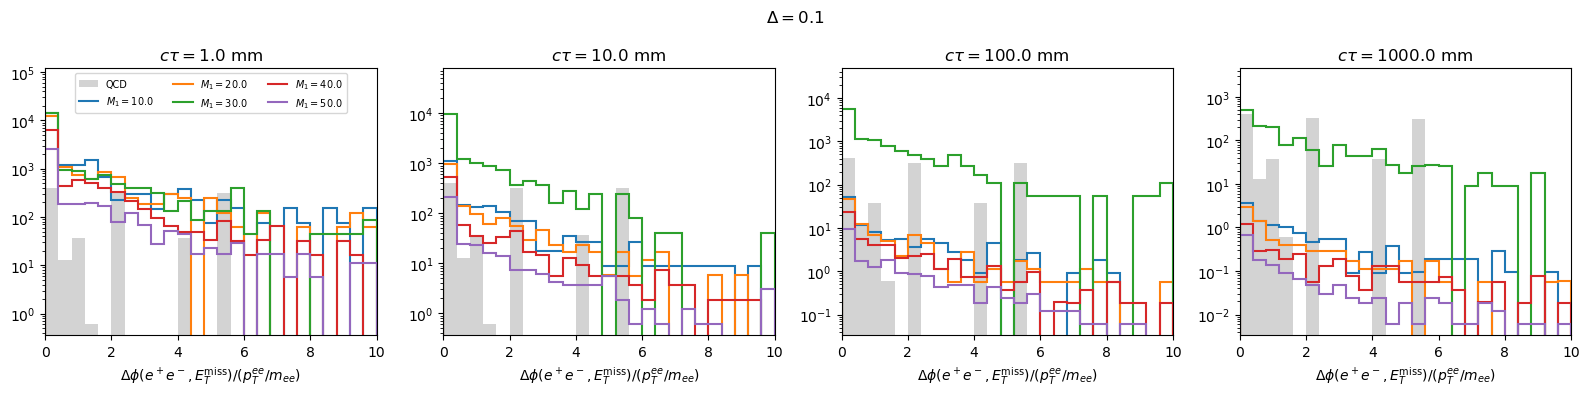

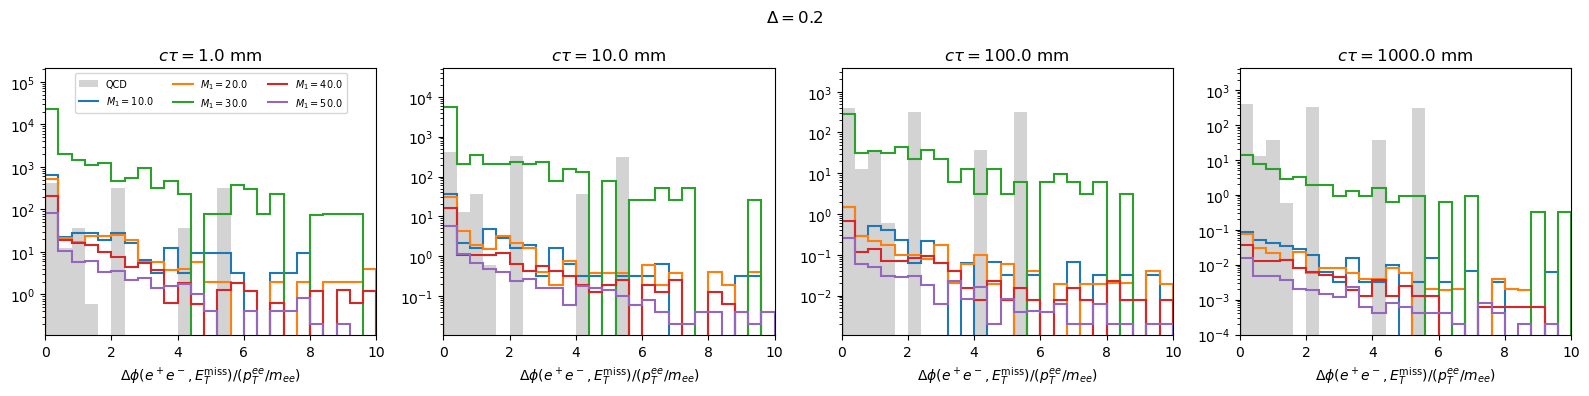

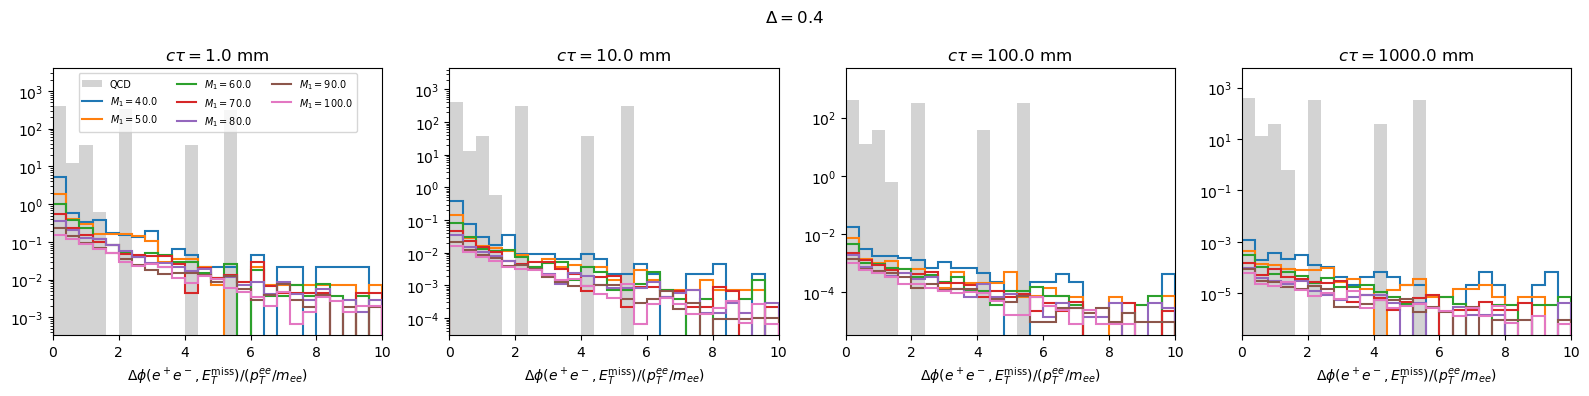

In [48]:
# vertex MET dPhi / (pT/m)
plot("sel_vtx_METdPhi_over_pTm",[0,10],logy=True,rebin=4j,xlabel=r"$\Delta \phi(e^+e^-,E_T^\mathrm{miss})/(p_T^{ee}/m_{ee})$")

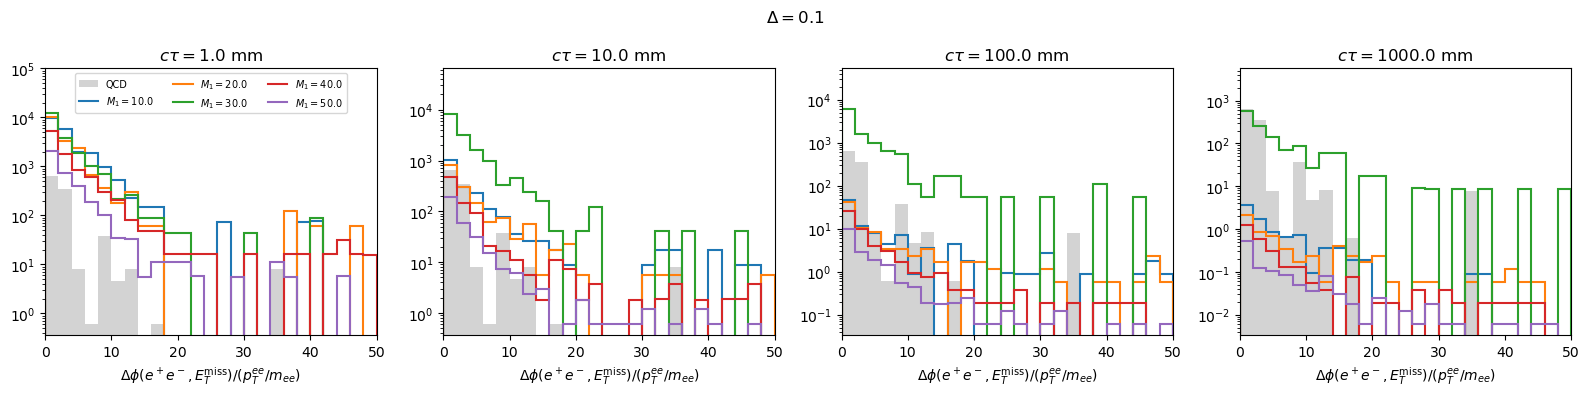

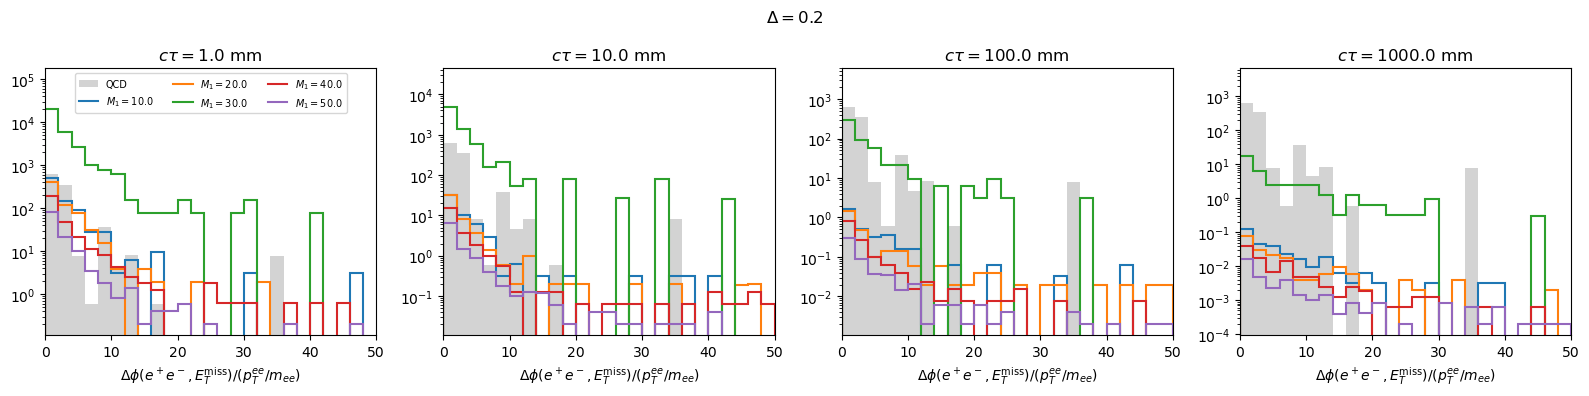

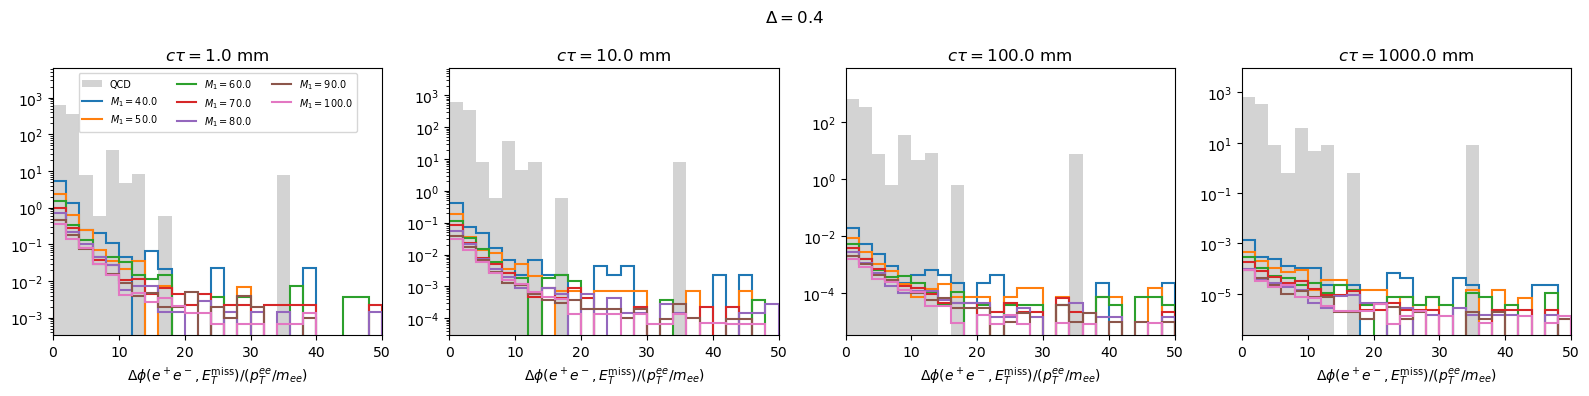

In [51]:
# vertex MET dPhi / (m/pT)
plot("sel_vtx_METdPhi_over_mpT",[0,50],logy=True,rebin=4j,xlabel=r"$\Delta \phi(e^+e^-,E_T^\mathrm{miss})/(p_T^{ee}/m_{ee})$")

# Vertex Chi2

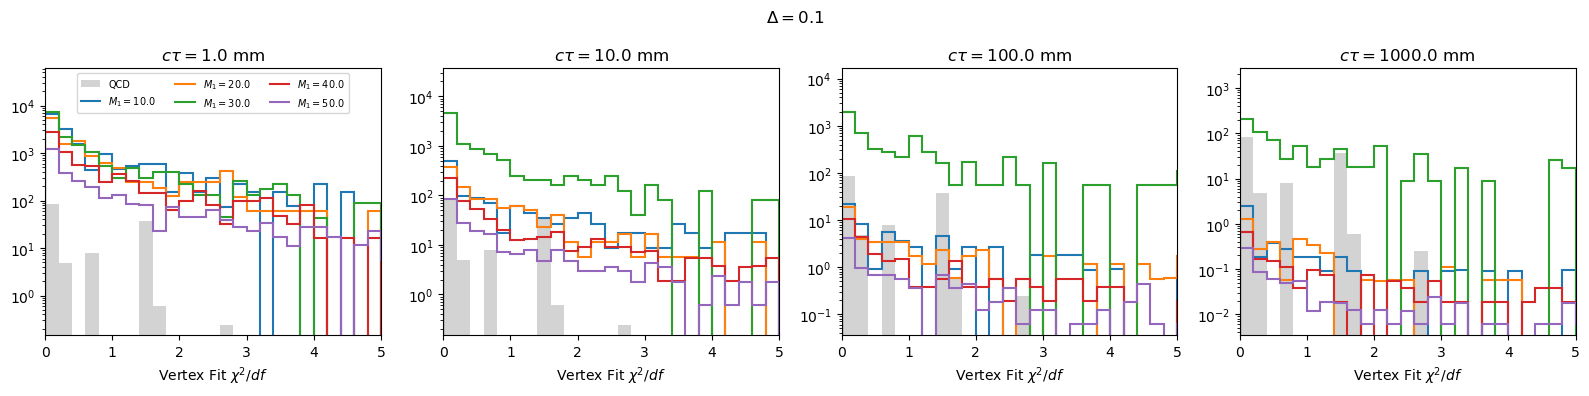

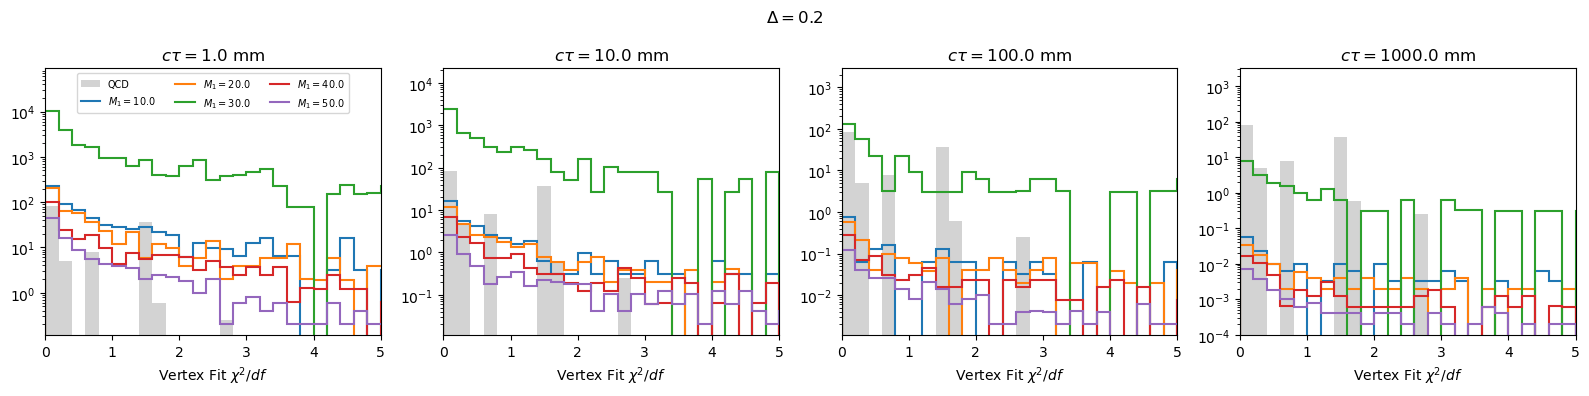

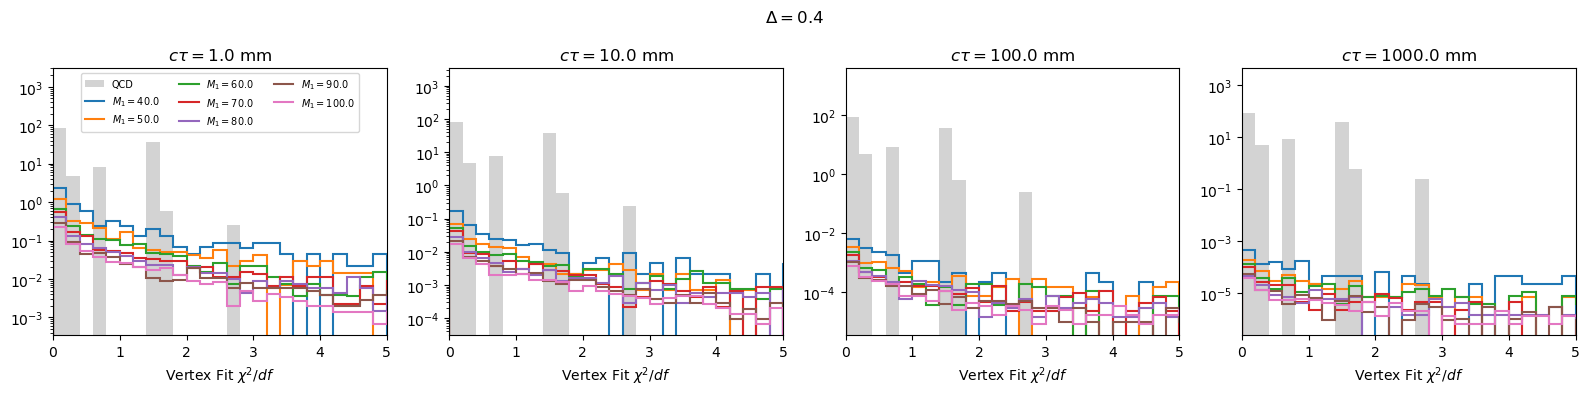

In [53]:
# vertex chi2
plot("sel_vtx_chi2",[0,5],logy=True,rebin=1j)

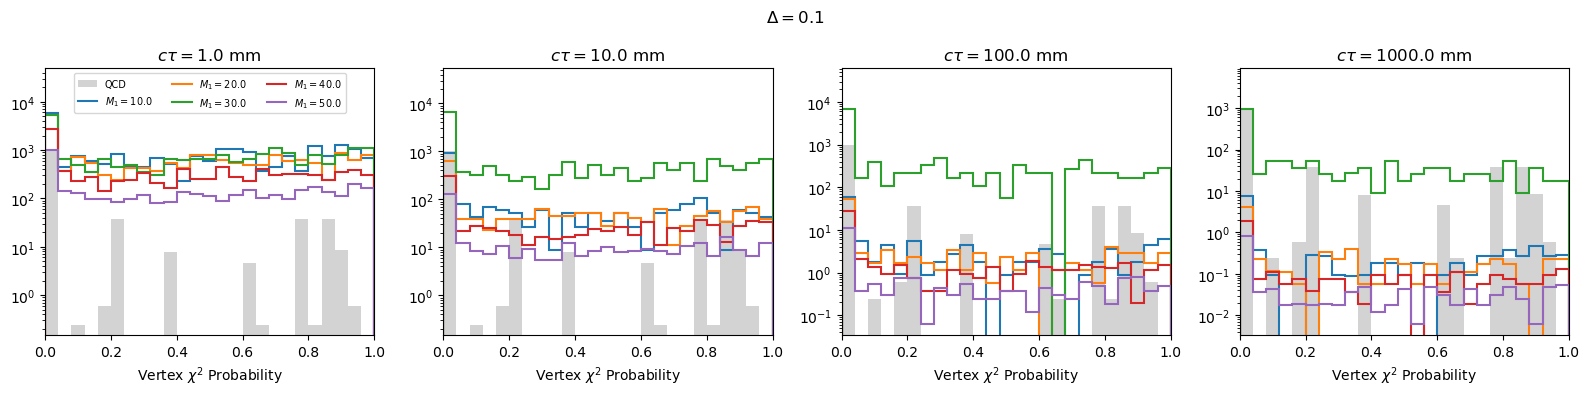

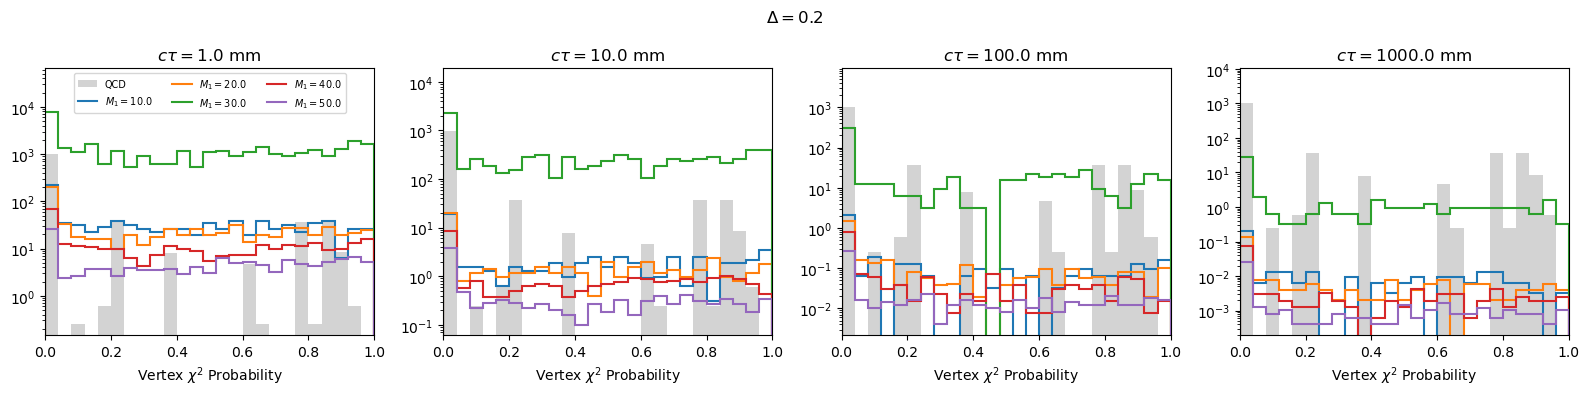

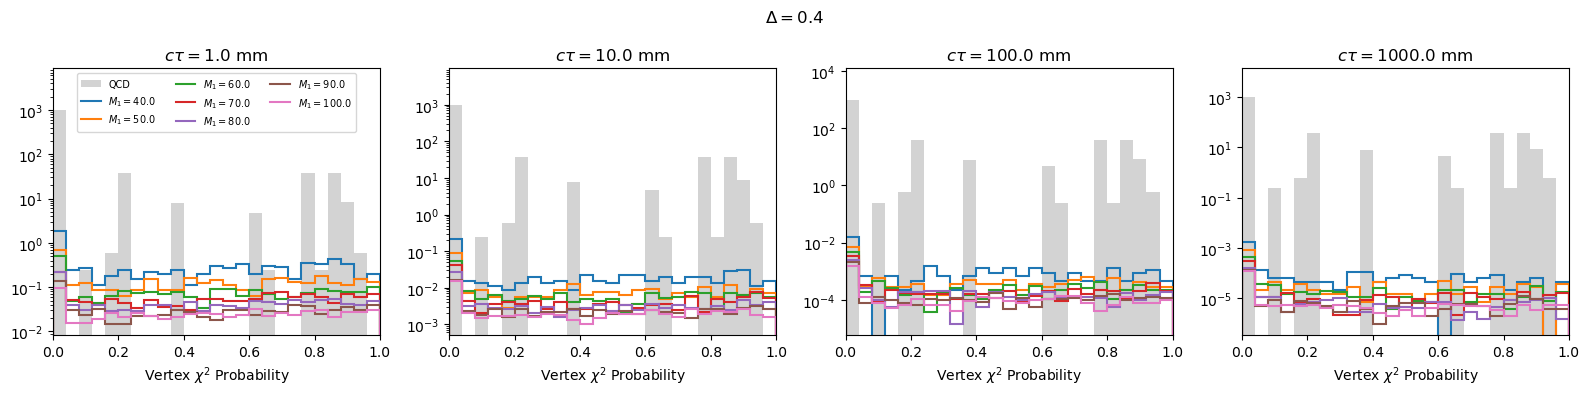

In [55]:
# vertex prob
plot("sel_vtx_prob",[0,1],logy=True,rebin=4j)

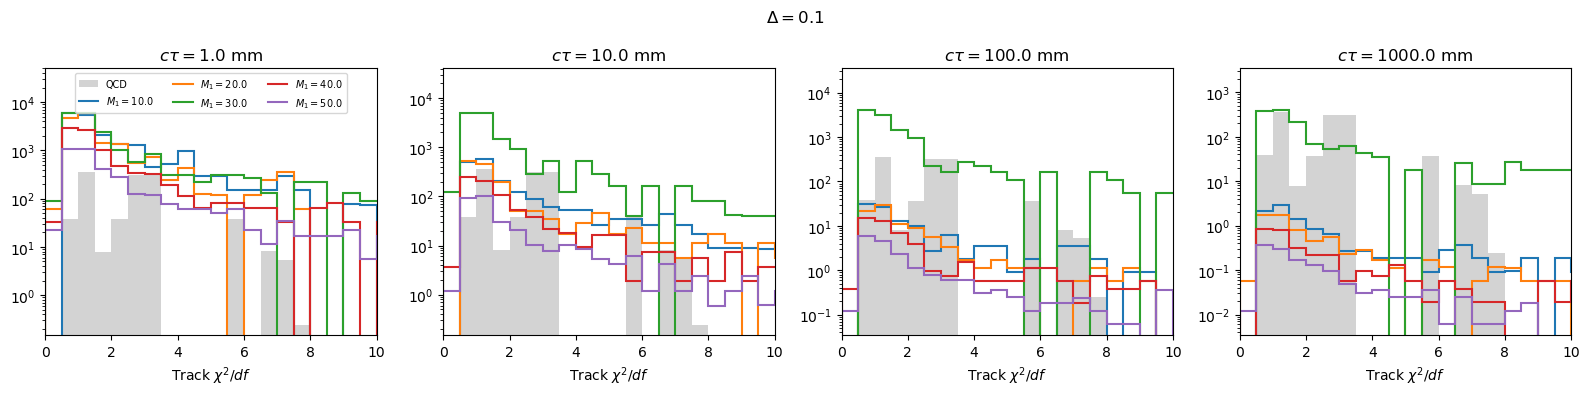

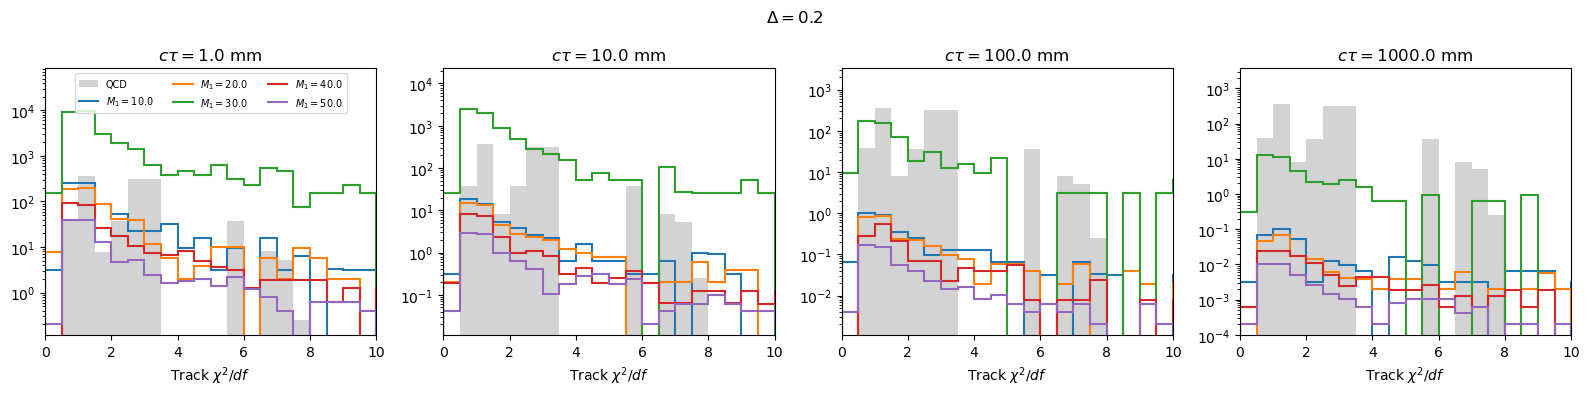

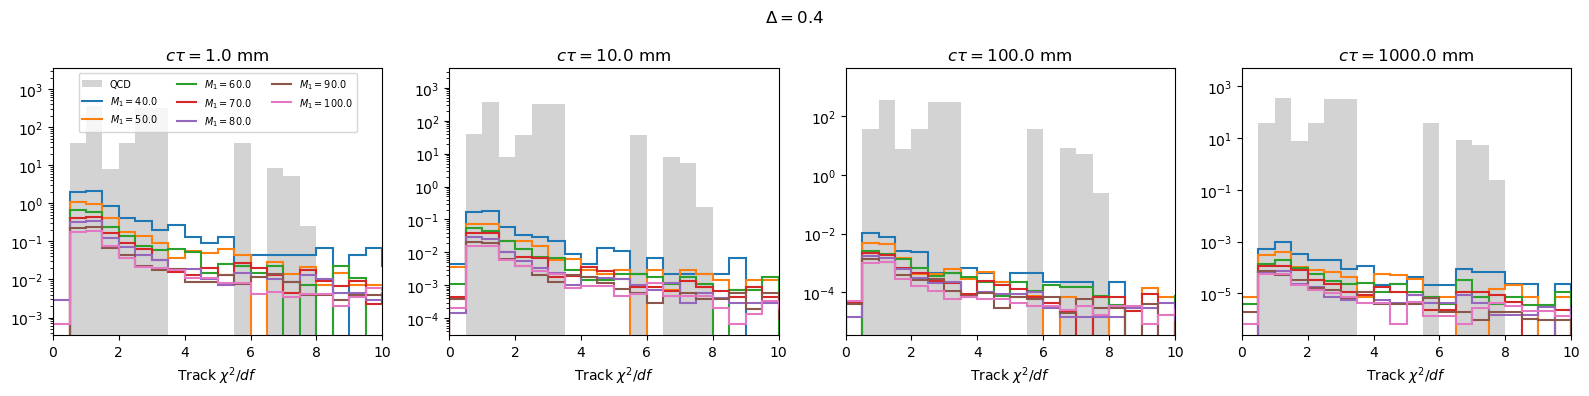

In [57]:
# vertex max(e1_chi2,e2_chi2)
plot("sel_vtx_max_chi2",[0,10],logy=True,rebin=1j)